In [13]:
.libPaths("/home/jupyter/local_lib") 
getwd()
setwd("/home/jupyter/ra_B140_B098_check/")
getwd()
library(hise) 

[1] "/home/jupyter/ra_B140_B098_check"

[1] "/home/jupyter/ra_B140_B098_check"

In [14]:
# Check R version
version <- R.version$version.string
print(version)

[1] "R version 4.3.1 (2023-06-16)"


In [15]:
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(Seurat)
quiet_library(tidyverse)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(H5weaver)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
#quiet_library(Nebulosa)
quiet_library(future)
quiet_library(future.apply)
#quiet_library(dittoSeq)
# quiet_library('tictoc')
quiet_library('scran')
quiet_library('SingleCellExperiment')
quiet_library('GSVA')
quiet_library("ComplexHeatmap")
quiet_library("pROC")
quiet_library("parallel")


In [123]:
# define the color palette to be used
npg_color <- c("#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", 
               "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF")
nejm_color <- c("#BC3C29FF", "#0072B5FF", "#E18727FF", "#20854EFF", "#7876B1FF", "#6F99ADFF", "#FFDC91FF", "#EE4C97FF")
jama_color <- c("#374E55FF", "#DF8F44FF", "#00A1D5FF", "#B24745FF", "#79AF97FF", "#6A6599FF", "#80796BFF")
jco_color <- c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF", "#7AA6DCFF", "#003C67FF", "#8F7700FF")
cluster_colors <- c("#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", 
    "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999", 
    "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")
cluster_colors_ext <- colorRampPalette(cluster_colors)(36)
options(repr.plot.width = 20, repr.plot.height = 15)

In [16]:
metadata_df=read.csv("/home/jupyter/ra_B140_B098_check/R_Notebooks/Tensor_csv_files/107S_17CT_meta.csv",header=TRUE)
metadata_df$cell_ids=paste(metadata_df$sample.sampleKitGuid,metadata_df$cell_type,sep="")

In [161]:
metadata_df%>%dim()
metadata_df%>%head(3)

[1] 1819   48

X sample.sampleKitGuid lastUpdated        
1 1 KT00001              2022-10-19 20:39:37
2 2 KT00006              2022-10-19 20:39:37
3 3 KT00012              2022-10-19 20:39:37
  sample.id                            sample.bridgingControl sample.visitName
1 f499ff83-e513-4d24-a10f-151348269fff FALSE                  Flu Year 1 Day 0
2 eb5b3a3d-002e-40a6-aa19-aa0e6a7fff8f FALSE                  Flu Year 1 Day 0
3 fb3c3406-2797-4c31-b085-37d8138099a3 FALSE                  Flu Year 1 Day 0
  sample.visitDetails             sample.drawDate sample.daysSinceFirstVisit
1 N/A - Flu-Series Timepoint Only 2019-10-01      0                         
2 N/A - Flu-Series Timepoint Only 2019-10-01      0                         
3 N/A - Flu-Series Timepoint Only 2019-10-01      0                         
  file.id                              ⋯ predicted.celltype.l2.5.1 ncells BMI  
1 fec489f9-9a74-4635-aa91-d2bf09d1faec ⋯ CD4 Naive                 1630      NA
2 9c2ef1f4-2f4a-4588-b17f-17b8d3658f4d ⋯ CD4 Naive                 3150   20.50
3 f748bb46-52aa-4392-b8a3-7a85d9603321 ⋯ CD4 Naive                 1469   33.69
  rulein_cluster disease_catergory sex    age_bin clusterID cell_type     
1 NA             healthy           Female below50 2         b_intermediate
2 C2             healthy           Female below50 2         b_intermediate
3 C1             healthy           Female below50 2         b_intermediate
  cell_ids             
1 KT00001b_intermediate
2 KT00006b_intermediate
3 KT00012b_intermediate

In [162]:
library(knitr)
kable(table(metadata_df$cell_type))



|Var1           | Freq|
|:--------------|----:|
|b_intermediate |  107|
|b_memory       |  107|
|b_naive        |  107|
|c_dc2          |  107|
|cd14_mono      |  107|
|cd16_mono      |  107|
|cd4_naive      |  107|
|cd4_tcm        |  107|
|cd4_tem        |  107|
|cd8_naive      |  107|
|cd8_tem        |  107|
|gd_t           |  107|
|mait           |  107|
|nk             |  107|
|p_dc           |  107|
|treg_memory    |  107|
|treg_naive     |  107|

In [20]:
cm_genes=read.csv("/home/jupyter/ra_B140_B098_check/csv_files/Total_genes_1701_rulein.csv",header=TRUE)
cm_genes%>%head()
cm_g=cm_genes$Geneset
cm_g%>%head()

X Geneset   
1 1 A1BG      
2 2 ABCF1     
3 3 ABHD14A   
4 4 ABHD2     
5 5 ABTB1     
6 6 AC004687.1

[1] "A1BG"       "ABCF1"      "ABHD14A"    "ABHD2"      "ABTB1"     
[6] "AC004687.1"

In [136]:
# load the pseudobulk normalized counts data
so_l2_pseudo_norm <-
    readRDS("/home/jupyter/ra_B140_B098_check/pseudo_170S_18CellTypes_named.rds")

In [137]:
so_l2_pseudo_norm[[11]]
names(so_l2_pseudo_norm)
names(so_l2_pseudo_norm)%>%length()

class: SingleCellExperiment 
dim: 7151 107 
metadata(0):
assays(1): counts
rownames(7151): A1BG AAAS ... ZYX ZZEF1
rowData names(0):
colnames: NULL
colData names(77): orig.ident nCount_RNA ... sex age_bin
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

[1] "b_intermediate" "b_memory"       "b_naive"        "cd14_mono"     
 [5] "cd16_mono"      "cd4_naive"      "cd4_tcm"        "cd4_tem"       
 [9] "cd8_naive"      "cd8_tem"        "c_dc2"          "dn_t"          
[13] "gd_t"           "mait"           "nk"             "p_dc"          
[17] "treg_memory"    "treg_naive"

[1] 18

In [138]:
all(cm_g %in% rownames(so_l2_pseudo_norm[[1]]))

[1] FALSE

In [139]:
alldata=so_l2_pseudo_norm
alldata[[1]]
names(alldata)
names(alldata)%>%length()

class: SingleCellExperiment 
dim: 4855 107 
metadata(0):
assays(1): counts
rownames(4855): A1BG AAED1 ... ZSWIM7 ZZEF1
rowData names(0):
colnames: NULL
colData names(77): orig.ident nCount_RNA ... sex age_bin
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

[1] "b_intermediate" "b_memory"       "b_naive"        "cd14_mono"     
 [5] "cd16_mono"      "cd4_naive"      "cd4_tcm"        "cd4_tem"       
 [9] "cd8_naive"      "cd8_tem"        "c_dc2"          "dn_t"          
[13] "gd_t"           "mait"           "nk"             "p_dc"          
[17] "treg_memory"    "treg_naive"

[1] 18

In [140]:
##removing the dn_t cell type
index_to_remove <- which(names(alldata) == "dn_t")
alldata1 <- alldata[-index_to_remove]

In [141]:
names(alldata1)
names(alldata1)%>%length()

[1] "b_intermediate" "b_memory"       "b_naive"        "cd14_mono"     
 [5] "cd16_mono"      "cd4_naive"      "cd4_tcm"        "cd4_tem"       
 [9] "cd8_naive"      "cd8_tem"        "c_dc2"          "gd_t"          
[13] "mait"           "nk"             "p_dc"           "treg_memory"   
[17] "treg_naive"

[1] 17

In [142]:
#saveRDS(alldata1,"/home/jupyter/ra_B140_B098_check/pseudo_170S_17CellTypes_named.rds")

In [143]:

# Step 1: Extract the Geneset column from the cm_genes data frame
geneset <- cm_genes$Geneset

# Step 2: Get the rownames from the counts assay of the alldata SingleCellExperiment object
rownames_alldata <- rownames(assay(alldata[[1]], "counts"))

# Step 3: Identify the missing genes that are present in Geneset but not in the rownames of alldata
missing_genes <- setdiff(geneset, rownames_alldata)

In [144]:
missing_genes%>%length()
missing_genes

[1] 116

[1] "ABHD2"      "AC006369.1" "AC010642.2" "AC026979.2" "AGO2"      
  [6] "ALDOA"      "ALG2"       "ANKRD36B"   "AP2A2"      "ARNTL"     
 [11] "B3GNT2"     "BNIP3"      "CA5B"       "CAMK2G"     "CBWD2"     
 [16] "CCR6"       "CD2"        "CD226"      "CDC14A"     "CDK17"     
 [21] "CDK6"       "CEBPD"      "CFAP36"     "CGRRF1"     "CNFN"      
 [26] "COG3"       "CPQ"        "CSRP1"      "DGKE"       "DGKZ"      
 [31] "DPYSL2"     "EDEM3"      "ESYT2"      "FAM45A"     "FAM78A"    
 [36] "FAM98B"     "FCF1"       "FHL3"       "FKBP11"     "FKBP5"     
 [41] "GABARAPL1"  "GIMAP5"     "GIMAP7"     "GPRIN3"     "GRAP2"     
 [46] "GZMA"       "HMCES"      "HMGCL"      "ID2"        "IL17RA"    
 [51] "IL32"       "INPP4A"     "IP6K1"      "ITPKB"      "JOSD2"     
 [56] "KLF12"      "LCP2"       "LINC00861"  "LINC02256"  "LIX1L"     
 [61] "LMF2"       "LPIN2"      "MAP3K12"    "MGAT2"      "MLXIP"     
 [66] "MMP25-AS1"  "MOGS"       "MRI1"       "MRPL10"     "MRPS28"    
 [71] "MT1X"       "MTHFS"      "MTMR6"      "MYADM"      "NMT2"      
 [76] "PAG1"       "PDE3B"      "PDE4D"      "PHACTR2"    "PILRB"     
 [81] "PITPNC1"    "PLCB1"      "PPM1M"      "PRKCH"      "RANBP9"    
 [86] "RORA"       "RPGR"       "SATB1"      "SESN1"      "SETD3"     
 [91] "SGK1"       "SGK3"       "SLC16A3"    "SLC20A1"    "SLC36A4"   
 [96] "SLC38A10"   "SLC7A6"     "SLCO3A1"    "SLFN12L"    "SMARCA4"   
[101] "SMURF2"     "SPATA13"    "SPN"        "STAT4"      "SUPT3H"    
[106] "TCEA3"      "TIMM44"     "TK2"        "TMEM204"    "TMEM245"   
[111] "TNFAIP8L2"  "TNFRSF25"   "TRIM14"     "TRIM25"     "TSPAN14"   
[116] "UTP11"

In [145]:
# Step 1: Extract the Geneset column from the cm_genes data frame
geneset <- cm_genes$Geneset

# Step 2 and Step 3: Create a function to identify missing genes for a given SingleCellExperiment object
find_missing_genes <- function(sce_object, geneset) {
  # Get the rownames from the counts assay of the SingleCellExperiment object
  rownames_alldata <- rownames(assay(sce_object, "counts"))
  
  # Identify the missing genes that are present in Geneset but not in the rownames of alldata
  missing_genes <- setdiff(geneset, rownames_alldata)
  
  return(missing_genes)
}

# Apply the find_missing_genes function to all the sce objects in alldata1
missing_genes_list <- lapply(alldata1, find_missing_genes, geneset)


In [146]:
##just checking the count of genes missing across cell types
#missing_genes_list[[1]]
missing_genes_list[[1]]%>%length()

#missing_genes_list[[2]]
missing_genes_list[[2]]%>%length()

#missing_genes_list[[3]]
missing_genes_list[[3]]%>%length()

#missing_genes_list[[4]]
missing_genes_list[[4]]%>%length()

#missing_genes_list[[5]]
missing_genes_list[[5]]%>%length()

#missing_genes_list[[6]]
missing_genes_list[[6]]%>%length()

#missing_genes_list[[7]]
missing_genes_list[[7]]%>%length()

#missing_genes_list[[8]]
missing_genes_list[[8]]%>%length()

#missing_genes_list[[9]]
missing_genes_list[[9]]%>%length()

#missing_genes_list[[10]]
missing_genes_list[[10]]%>%length()

#missing_genes_list[[11]]
#missing_genes_list[[11]]%>%length()

#missing_genes_list[[12]]
missing_genes_list[[12]]%>%length()

#missing_genes_list[[13]]
missing_genes_list[[13]]%>%length()

#missing_genes_list[[14]]
missing_genes_list[[14]]%>%length()

#missing_genes_list[[15]]
missing_genes_list[[15]]%>%length()

#missing_genes_list[[16]]
missing_genes_list[[16]]%>%length()

#missing_genes_list[[17]]
missing_genes_list[[17]]%>%length()


[1] 116

[1] 133

[1] 334

[1] 122

[1] 96

[1] 230

[1] 111

[1] 161

[1] 166

[1] 150

[1] 133

[1] 131

[1] 148

[1] 73

[1] 186

[1] 287

In [147]:
zeros_matrix1 <- matrix(0, nrow = length(missing_genes_list[[1]]), ncol = ncol(assay(alldata[[1]], "counts")))
dim(zeros_matrix1 )

zeros_matrix2 <- matrix(0, nrow = length(missing_genes_list[[2]]), ncol = ncol(assay(alldata[[2]], "counts")))
dim(zeros_matrix2 )

zeros_matrix3 <- matrix(0, nrow = length(missing_genes_list[[3]]), ncol = ncol(assay(alldata[[3]], "counts")))
dim(zeros_matrix3 )

zeros_matrix4 <- matrix(0, nrow = length(missing_genes_list[[4]]), ncol = ncol(assay(alldata[[4]], "counts")))
dim(zeros_matrix4 )

zeros_matrix5 <- matrix(0, nrow = length(missing_genes_list[[5]]), ncol = ncol(assay(alldata[[5]], "counts")))
dim(zeros_matrix5 )

zeros_matrix6 <- matrix(0, nrow = length(missing_genes_list[[6]]), ncol = ncol(assay(alldata[[6]], "counts")))
dim(zeros_matrix6 )

zeros_matrix7 <- matrix(0, nrow = length(missing_genes_list[[7]]), ncol = ncol(assay(alldata[[7]], "counts")))
dim(zeros_matrix7 )

zeros_matrix8 <- matrix(0, nrow = length(missing_genes_list[[8]]), ncol = ncol(assay(alldata[[8]], "counts")))
dim(zeros_matrix8 )

zeros_matrix9 <- matrix(0, nrow = length(missing_genes_list[[9]]), ncol = ncol(assay(alldata[[9]], "counts")))
dim(zeros_matrix9 )

zeros_matrix10 <- matrix(0, nrow = length(missing_genes_list[[10]]), ncol = ncol(assay(alldata[[10]], "counts")))
dim(zeros_matrix10 )

zeros_matrix11 <- matrix(0, nrow = length(missing_genes_list[[11]]), ncol = ncol(assay(alldata[[11]], "counts")))
dim(zeros_matrix11 )

zeros_matrix12 <- matrix(0, nrow = length(missing_genes_list[[12]]), ncol = ncol(assay(alldata[[12]], "counts")))
dim(zeros_matrix12 )

zeros_matrix13 <- matrix(0, nrow = length(missing_genes_list[[13]]), ncol = ncol(assay(alldata[[13]], "counts")))
dim(zeros_matrix13 )

zeros_matrix14 <- matrix(0, nrow = length(missing_genes_list[[14]]), ncol = ncol(assay(alldata[[14]], "counts")))
dim(zeros_matrix14 )

zeros_matrix15 <- matrix(0, nrow = length(missing_genes_list[[15]]), ncol = ncol(assay(alldata[[15]], "counts")))
dim(zeros_matrix15 )

zeros_matrix16 <- matrix(0, nrow = length(missing_genes_list[[16]]), ncol = ncol(assay(alldata[[16]], "counts")))
dim(zeros_matrix16 )

zeros_matrix17 <- matrix(0, nrow = length(missing_genes_list[[17]]), ncol = ncol(assay(alldata[[17]], "counts")))
dim(zeros_matrix17 )

[1] 116 107

[1] 133 107

[1] 334 107

[1] 122 107

[1]  96 107

[1] 230 107

[1] 111 107

[1] 161 107

[1] 166 107

[1] 150 107

[1]  34 107

[1] 133 107

[1] 131 107

[1] 148 107

[1]  73 107

[1] 186 107

[1] 287 107

In [148]:
zeros_matrix_list=list(zeros_matrix1,zeros_matrix2,zeros_matrix3,zeros_matrix4,zeros_matrix5,zeros_matrix6,zeros_matrix7,zeros_matrix8,zeros_matrix9,zeros_matrix10,
                       zeros_matrix11,zeros_matrix12,zeros_matrix13,zeros_matrix14,zeros_matrix15,zeros_matrix16,zeros_matrix17)

In [149]:
zeros_matrix_list[[2]]%>%dim()

[1] 133 107

In [150]:
# Step: Create a function to set rownames for a given zero matrix and missing_genes
set_row_names <- function(zero_matrix, missing_genes) {
  # Set the rownames of the zero matrix to the missing genes
  rownames(zero_matrix) <- missing_genes
  
  return(zero_matrix)
}

# Apply the set_row_names function to all the zero matrices in zeros_matrix_list
zeros_matrix_list_with_rownames <- lapply(seq_along(zeros_matrix_list), function(i) {
  set_row_names(zeros_matrix_list[[i]], missing_genes_list[[i]])
})

In [151]:
zeros_matrix_list_with_rownames[[1]]%>%head(3)
zeros_matrix_list_with_rownames[[1]]%>%dim()

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
ABHD2      0    0    0    0    0    0    0    0    0    0     ⋯     0     0    
AC006369.1 0    0    0    0    0    0    0    0    0    0     ⋯     0     0    
AC010642.2 0    0    0    0    0    0    0    0    0    0     ⋯     0     0    
           [,14] [,15] [,16] [,17] [,18] [,19] [,20] [,21]
ABHD2      0     0     0     0     0     0     0     0    
AC006369.1 0     0     0     0     0     0     0     0    
AC010642.2 0     0     0     0     0     0     0     0

[1] 116 107

In [152]:
# Step: Create a function to bind the zero matrix with the counts assay for a given SingleCellExperiment object
bind_matrices <- function(sce_object, zero_matrix) {
  # Bind the zero matrix with the counts assay of the SingleCellExperiment object
  bound_matrix <- rbind(assay(sce_object, "counts"), zero_matrix)

  return(bound_matrix)
}

# Use Map() to apply the bind_matrices function to each 'sce_object' and corresponding zero matrix
bound_matrices_list <- Map(bind_matrices, alldata1, zeros_matrix_list_with_rownames)

In [153]:
alldata1[[1]]%>%dim()
bound_matrices_list[[1]]%>%dim() ## checking if they were binded correctly and they did 

[1] 4855  107

[1] 4971  107

In [154]:
x1=SingleCellExperiment(list(counts=bound_matrices_list[[1]]),  colData=alldata1[[1]]@colData)

x2=SingleCellExperiment(list(counts=bound_matrices_list[[2]]),  colData=alldata1[[2]]@colData)
x3=SingleCellExperiment(list(counts=bound_matrices_list[[3]]),  colData=alldata1[[3]]@colData)
x4=SingleCellExperiment(list(counts=bound_matrices_list[[4]]),  colData=alldata1[[4]]@colData)
x5=SingleCellExperiment(list(counts=bound_matrices_list[[5]]),  colData=alldata1[[5]]@colData)
x6=SingleCellExperiment(list(counts=bound_matrices_list[[6]]),  colData=alldata1[[6]]@colData)
x7=SingleCellExperiment(list(counts=bound_matrices_list[[7]]),  colData=alldata1[[7]]@colData)
x8=SingleCellExperiment(list(counts=bound_matrices_list[[8]]),  colData=alldata1[[8]]@colData)
x9=SingleCellExperiment(list(counts=bound_matrices_list[[9]]),  colData=alldata1[[9]]@colData)
x10=SingleCellExperiment(list(counts=bound_matrices_list[[10]]),  colData=alldata1[[10]]@colData)
x11=SingleCellExperiment(list(counts=bound_matrices_list[[11]]),  colData=alldata1[[11]]@colData)

x12=SingleCellExperiment(list(counts=bound_matrices_list[[12]]),  colData=alldata1[[12]]@colData)

x13=SingleCellExperiment(list(counts=bound_matrices_list[[13]]),  colData=alldata1[[13]]@colData)
x14=SingleCellExperiment(list(counts=bound_matrices_list[[14]]),  colData=alldata1[[14]]@colData)
x15=SingleCellExperiment(list(counts=bound_matrices_list[[15]]),  colData=alldata1[[15]]@colData)
x16=SingleCellExperiment(list(counts=bound_matrices_list[[16]]),  colData=alldata1[[16]]@colData)
x17=SingleCellExperiment(list(counts=bound_matrices_list[[17]]),  colData=alldata1[[17]]@colData)

In [155]:
x9
x8


class: SingleCellExperiment 
dim: 4473 107 
metadata(0):
assays(1): counts
rownames(4473): A1BG AAK1 ... ZNF26 ZNRF2
rowData names(0):
colnames: NULL
colData names(77): orig.ident nCount_RNA ... sex age_bin
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

class: SingleCellExperiment 
dim: 4435 107 
metadata(0):
assays(1): counts
rownames(4435): A1BG AAED1 ... ZNF397 ZNF43
rowData names(0):
colnames: NULL
colData names(77): orig.ident nCount_RNA ... sex age_bin
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [156]:
alldata_new=list(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,
                 x11,x12,x13,x14,x15,x16,x17)

In [157]:
names(alldata_new)=names(alldata1)
names(alldata_new)

[1] "b_intermediate" "b_memory"       "b_naive"        "cd14_mono"     
 [5] "cd16_mono"      "cd4_naive"      "cd4_tcm"        "cd4_tem"       
 [9] "cd8_naive"      "cd8_tem"        "c_dc2"          "gd_t"          
[13] "mait"           "nk"             "p_dc"           "treg_memory"   
[17] "treg_naive"

In [188]:
runDEseq2 <- function(pseudo, design){
    # load library
    require('SummarizedExperiment')
    require("DESeq2")
    se <- SummarizedExperiment(assays=list(counts=counts(pseudo)),
                         colData= as.data.frame(colData(pseudo)))
    se$sizeFactor <- NULL
    dds <- DESeqDataSet(se, design = as.formula(design))
    dds <- DESeq(dds)
    return(dds)
}

In [189]:
addNormcounts <- function(pseudo, dds, method=c("vst", 'rlog', 'pseudocounts'),
                          assay_name='normalized_counts'){
    estimateSizeFactors(dds)
    
    if(method=="vst"){
        norm_dds <- vst(dds, blind=FALSE)
    } else if (method=="rlog") {
        norm_dds <- rlog(dds, blind=FALSE)
    } else if (method=="pseudocounts") {
        norm_dds <- normTransform(dds)
    } else {stop('method should be one of vst/rlog/pseudocounts.')}
    norm_counts <- assay(norm_dds)
    colnames(norm_counts) <- NULL
    assay(pseudo, assay_name,withDimnames=FALSE) <- norm_counts
    return(pseudo)
}

In [45]:
# Create an empty list to store the results
desq_results <- list()

# Loop over each SCE object in the list
for (x in seq_along(alldata_new)) {
  # Perform runDESeq2
  deseq_result <- runDEseq2(alldata_new[[x]], ~ cohort)
  
  # Perform addNormcounts
  deseq_result_norm <- addNormcounts(alldata_new[[x]], deseq_result, method = 'vst',
                                             assay_name = 'normalized_counts')
  
  # Store the results in the list
  desq_results[[x]] <- deseq_result_norm
}


Loading required package: DESeq2

converting counts to integer mode

Warning message in DESeqDataSet(se, design = as.formula(design)):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 9 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='

In [46]:
alldata_new[[1]]
desq_results[[1]]

class: SingleCellExperiment 
dim: 4971 107 
metadata(0):
assays(1): counts
rownames(4971): A1BG AAED1 ... TSPAN14 UTP11
rowData names(0):
colnames: NULL
colData names(77): orig.ident nCount_RNA ... sex age_bin
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

class: SingleCellExperiment 
dim: 4971 107 
metadata(0):
assays(2): counts normalized_counts
rownames(4971): A1BG AAED1 ... TSPAN14 UTP11
rowData names(0):
colnames: NULL
colData names(77): orig.ident nCount_RNA ... sex age_bin
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [52]:
assay(desq_results[[1]],"normalized_counts") %>%dim()

[1] 4971  107

In [53]:
colData(desq_results[[1]])$sample.sampleKitGuid
col_names=colData(desq_results[[1]])$sample.sampleKitGuid
colnames(desq_results[[1]])=col_names

[1] "KT00001" "KT00006" "KT00012" "KT00015" "KT00016" "KT00030" "KT00039"
  [8] "KT00042" "KT00046" "KT00048" "KT00050" "KT00052" "KT00056" "KT00057"
 [15] "KT00058" "KT00060" "KT00063" "KT00064" "KT00065" "KT00067" "KT00068"
 [22] "KT00069" "KT00070" "KT00073" "KT00074" "KT00075" "KT00076" "KT00077"
 [29] "KT00081" "KT00084" "KT00086" "KT00087" "KT00088" "KT00090" "KT00092"
 [36] "KT00095" "KT00107" "KT00108" "KT00114" "KT00118" "KT00120" "KT00142"
 [43] "KT00160" "KT00164" "KT00166" "KT00211" "KT00221" "KT00257" "KT00264"
 [50] "KT00268" "KT00271" "KT00275" "KT00285" "KT00288" "KT00322" "KT00328"
 [57] "KT00334" "KT00342" "KT00346" "KT00353" "KT00377" "KT00387" "KT00388"
 [64] "KT00393" "KT00420" "KT00436" "KT00443" "KT00453" "KT00461" "KT00463"
 [71] "KT00464" "KT00465" "KT00468" "KT00473" "KT00477" "KT00480" "KT00496"
 [78] "KT00501" "KT00516" "KT00520" "KT00526" "KT00529" "KT00530" "KT00532"
 [85] "KT00533" "KT00541" "KT00545" "KT00552" "KT00557" "KT00562" "KT00564"
 [92] "KT00566" "KT00569" "KT00599" "KT00602" "KT00623" "KT00625" "KT02177"
 [99] "KT01982" "KT02268" "KT02318" "KT02346" "KT02452" "KT03898" "KT03917"
[106] "KT03921" "KT03928"

In [54]:
count_mat=assay(desq_results[[1]],'counts')

In [55]:
if (length(col_names) == ncol(count_mat)) {
  # Lengths match
  print("Lengths match.")
} else {
  # Lengths do not match
  print("Lengths do not match.")
}

[1] "Lengths match."


In [56]:
####Setting the colnames in all sce objects in p
for (x in seq_along(desq_results)) {
  col_names <- colData(desq_results[[x]])$sample.sampleKitGuid
  colnames(desq_results[[x]]) <- col_names
}

In [61]:
desq_results[[11]]

class: SingleCellExperiment 
dim: 7185 107 
metadata(0):
assays(2): counts normalized_counts
rownames(7185): A1BG AAAS ... TMEM204 TNFRSF25
rowData names(0):
colnames(107): KT00001 KT00006 ... KT03921 KT03928
colData names(77): orig.ident nCount_RNA ... sex age_bin
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [59]:
names(desq_results)=names(alldata1)
names(desq_results)

[1] "b_intermediate" "b_memory"       "b_naive"        "cd14_mono"     
 [5] "cd16_mono"      "cd4_naive"      "cd4_tcm"        "cd4_tem"       
 [9] "cd8_naive"      "cd8_tem"        "c_dc2"          "gd_t"          
[13] "mait"           "nk"             "p_dc"           "treg_memory"   
[17] "treg_naive"

In [60]:
saveRDS(desq_results,"/home/jupyter/ra_B140_B098_check/zi_107S_17CT_afterdeseq2.rds")

In [62]:
 #########################TENSOR ANALYSIS START##############

In [40]:
metadata_df=read.csv("/home/jupyter/ra_B140_B098_check/R_Notebooks/Tensor_csv_files/107S_17CT_meta.csv",header=TRUE)
metadata_df$cell_ids=paste(metadata_df$sample.sampleKitGuid,metadata_df$cell_type,sep="")

In [41]:
metadata_df%>%colnames()%>%sort()

[1] "age"                        "age_bin"                   
 [3] "BMI"                        "category"                  
 [5] "cell_counts"                "cell_ids"                  
 [7] "cell_type"                  "clusterID"                 
 [9] "cohort"                     "cohort.cohortGuid"         
[11] "disease_catergory"          "file.batchID"              
[13] "file.id"                    "file.name"                 
[15] "ident"                      "lastUpdated"               
[17] "ncells"                     "predicted.celltype.l2.5.1" 
[19] "rulein_cluster"             "sample.bridgingControl"    
[21] "sample.daysSinceFirstVisit" "sample.drawDate"           
[23] "sample.id"                  "sample.sampleKitGuid"      
[25] "sample.sampleKitGuid.1"     "sample.visitDetails"       
[27] "sample.visitName"           "Serum_CCP3Final"           
[29] "Serum_CCP3Outcome"          "Serum_RFIgAfinal"          
[31] "Serum_RFIgAOutcome"         "Serum_RFIgMfinal"          
[33] "Serum_RFIgMOutcome"         "sex"                       
[35] "sizeFactor"                 "Sp_CCPIgA_FinalLevel"      
[37] "SP_CCPIgG_FinalLevel"       "SP_RFIgA_FinalLevel"       
[39] "SP_RFIgM_FinalLevel"        "SputumCollected"           
[41] "subject.biologicalSex"      "subject.birthYear"         
[43] "subject.ethnicity"          "subject.id"                
[45] "subject.partnerCode"        "subject.race"              
[47] "subject.subjectGuid"        "X"

In [158]:
# load the pseudobulk normalized counts data
so_l2_pseudo_norm <-
    readRDS("/home/jupyter/ra_B140_B098_check/zi_107S_17CT_afterdeseq2.rds")

In [159]:
so_l2_pseudo_norm

$b_intermediate
class: SingleCellExperiment 
dim: 4971 107 
metadata(0):
assays(2): counts normalized_counts
rownames(4971): A1BG AAED1 ... TSPAN14 UTP11
rowData names(0):
colnames(107): KT00001 KT00006 ... KT03921 KT03928
colData names(77): orig.ident nCount_RNA ... sex age_bin
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

$b_memory
class: SingleCellExperiment 
dim: 4776 107 
metadata(0):
assays(2): counts normalized_counts
rownames(4776): A1BG AAED1 ... UTP11 ZDHHC17
rowData names(0):
colnames(107): KT00001 KT00006 ... KT03921 KT03928
colData names(77): orig.ident nCount_RNA ... sex age_bin
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

$b_naive
class: SingleCellExperiment 
dim: 4046 107 
metadata(0):
assays(2): counts normalized_counts
rownames(4046): A1BG AAMP ... ZNF276 ZNF639
rowData names(0):
colnames(107): KT00001 KT00006 ... KT03921 KT03928
colData names(77): orig.ident nCount_RNA ... sex age_bin
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

$cd14_mon

In [160]:
so_l2_pseudo_norm[[1]]
names(so_l2_pseudo_norm)
names(so_l2_pseudo_norm)%>%length()

class: SingleCellExperiment 
dim: 4971 107 
metadata(0):
assays(2): counts normalized_counts
rownames(4971): A1BG AAED1 ... TSPAN14 UTP11
rowData names(0):
colnames(107): KT00001 KT00006 ... KT03921 KT03928
colData names(77): orig.ident nCount_RNA ... sex age_bin
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

[1] "b_intermediate" "b_memory"       "b_naive"        "cd14_mono"     
 [5] "cd16_mono"      "cd4_naive"      "cd4_tcm"        "cd4_tem"       
 [9] "cd8_naive"      "cd8_tem"        "c_dc2"          "gd_t"          
[13] "mait"           "nk"             "p_dc"           "treg_memory"   
[17] "treg_naive"

[1] 17

In [161]:

x1=so_l2_pseudo_norm[[1]]##b_int
co1=assay(x1,'counts')
col_names1=metadata_df[1:107,]$cell_ids
count_mat1=co1
colnames(co1)=col_names1


x2=so_l2_pseudo_norm[[2]]##b_mem
co2=assay(x2,'counts')
col_names2=metadata_df[108:214,]$cell_ids
count_mat2=co2
colnames(co2)=col_names2

x3=so_l2_pseudo_norm[[3]] #b_naive
co3=assay(x3,'counts')
col_names3=metadata_df[215:321,]$cell_ids
count_mat3=co3
colnames(co3)=col_names3

x4=so_l2_pseudo_norm[[4]]#cd14mono
co4=assay(x4,'counts')
col_names4=metadata_df[322:428,]$cell_ids
count_mat4=co4
colnames(co4)=col_names4

x5=so_l2_pseudo_norm[[5]]#cd16mono
co5=assay(x5,'counts')
col_names5=metadata_df[429:535,]$cell_ids
count_mat5=co5
colnames(co5)=col_names5

x6=so_l2_pseudo_norm[[6]] ##cd4naive
co6=assay(x6,'counts')
col_names6=metadata_df[536:642,]$cell_ids
count_mat6=co6
colnames(co6)=col_names6

x7=so_l2_pseudo_norm[[7]]###cd4_tcm
co7=assay(x7,'counts')
col_names7=metadata_df[643:749,]$cell_ids
count_mat7=co7
colnames(co7)=col_names7

x8=so_l2_pseudo_norm[[8]]##cd4_tem
co8=assay(x8,'counts')
col_names8=metadata_df[750:856,]$cell_ids
count_mat8=co8
colnames(co8)=col_names8

x9=so_l2_pseudo_norm[[9]]##cd8_naive
co9=assay(x9,'counts')
col_names9=metadata_df[857:963,]$cell_ids
count_mat9=co9
colnames(co9)=col_names9

x10=so_l2_pseudo_norm[[10]]##cd8_tem
co10=assay(x10,'counts')
col_names10=metadata_df[964:1070,]$cell_ids
count_mat10=co10
colnames(co10)=col_names10

x11=so_l2_pseudo_norm[[11]]##cdc2
co11=assay(x11,'counts')
col_names11=metadata_df[1071:1177,]$cell_ids
count_mat11=co11
colnames(co11)=col_names11


x12=so_l2_pseudo_norm[[12]]##gdt
co12=assay(x12,'counts')
col_names12=metadata_df[1178:1284,]$cell_ids
count_mat12=co12
colnames(co12)=col_names12

x13=so_l2_pseudo_norm[[13]]##mait
co13=assay(x13,'counts')
col_names13=metadata_df[1285:1391,]$cell_ids
count_mat13=co13
colnames(co13)=col_names13

x14=so_l2_pseudo_norm[[14]]##nk
co14=assay(x14,'counts')
col_names14=metadata_df[1392:1498,]$cell_ids
count_mat14=co14
colnames(co14)=col_names14

x15=so_l2_pseudo_norm[[15]]##pdc
co15=assay(x15,'counts')
col_names15=metadata_df[1499:1605,]$cell_ids
count_mat15=co15
colnames(co15)=col_names15

x16=so_l2_pseudo_norm[[16]]##treg_mem
co16=assay(x16,'counts')
col_names16=metadata_df[1606:1712,]$cell_ids
count_mat16=co16
colnames(co16)=col_names16

x17=so_l2_pseudo_norm[[17]]
co17=assay(x17,'counts')
col_names17=metadata_df[1713:1819,]$cell_ids
count_mat17=co17
colnames(co17)=col_names17

In [162]:
common_rows <- Reduce(intersect, list(rownames(co1), rownames(co2),rownames(co3),rownames(co4),rownames(co5),rownames(co6),rownames(co7),rownames(co8),rownames(co9),rownames(co10),
                                      rownames(co11),rownames(co12),rownames(co13),rownames(co14),rownames(co15),rownames(co16),rownames(co17)))

In [163]:
common_rows%>%length()
all(cm_g %in%common_rows)

[1] 3362

[1] TRUE

In [164]:
# Step: Create a function to check if geneset is present in row names for a given SingleCellExperiment object
geneset_present<- function(sce_object, geneset) {
  all_genes_present <- all(geneset %in% rownames(assay(sce_object, "counts")))
  return(all_genes_present)
}

# Use sapply() to apply the geneset_present function to all the sce objects in 'zi'
geneset_present_list <- sapply(so_l2_pseudo_norm, geneset_present, geneset = cm_g)

geneset_present_list

b_intermediate       b_memory        b_naive      cd14_mono      cd16_mono 
          TRUE           TRUE           TRUE           TRUE           TRUE 
     cd4_naive        cd4_tcm        cd4_tem      cd8_naive        cd8_tem 
          TRUE           TRUE           TRUE           TRUE           TRUE 
         c_dc2           gd_t           mait             nk           p_dc 
          TRUE           TRUE           TRUE           TRUE           TRUE 
   treg_memory     treg_naive 
          TRUE           TRUE

In [165]:
co_s1 <- co1[common_rows, ]
co_s2 <- co2[common_rows, ]
co_s3 <- co3[common_rows, ]
co_s4 <- co4[common_rows, ]
co_s5 <- co5[common_rows, ]
co_s6 <- co6[common_rows, ]
co_s7 <- co7[common_rows, ]
co_s8 <- co8[common_rows, ]
co_s9 <- co9[common_rows, ]
co_s10 <- co10[common_rows, ]

co11_s <- co11[common_rows, ]
co12_s <- co12[common_rows, ]
co13_s <- co13[common_rows, ]
co14_s <- co14[common_rows, ]
co15_s <- co15[common_rows, ]
co16_s <- co16[common_rows, ]
co17_s <- co17[common_rows, ]

In [166]:
merged_matrix=cbind(co_s1,co_s2,co_s3,co_s4,co_s5,co_s6,co_s7,co_s8,co_s9,co_s10,
                    co11_s,co12_s,co13_s,co14_s,co15_s,co16_s,co17_s)

In [167]:
metadata_df%>%colnames()
metadata_df%>%dim()
metadata_df%>%head(3)

[1] "X"                          "sample.sampleKitGuid"      
 [3] "lastUpdated"                "sample.id"                 
 [5] "sample.bridgingControl"     "sample.visitName"          
 [7] "sample.visitDetails"        "sample.drawDate"           
 [9] "sample.daysSinceFirstVisit" "file.id"                   
[11] "file.name"                  "file.batchID"              
[13] "subject.id"                 "subject.biologicalSex"     
[15] "subject.birthYear"          "subject.ethnicity"         
[17] "subject.partnerCode"        "subject.race"              
[19] "subject.subjectGuid"        "cohort.cohortGuid"         
[21] "category"                   "Serum_CCP3Final"           
[23] "Serum_CCP3Outcome"          "Serum_RFIgAfinal"          
[25] "Serum_RFIgAOutcome"         "Serum_RFIgMfinal"          
[27] "Serum_RFIgMOutcome"         "SputumCollected"           
[29] "SP_RFIgA_FinalLevel"        "SP_RFIgM_FinalLevel"       
[31] "Sp_CCPIgA_FinalLevel"       "SP_CCPIgG_FinalLevel"      
[33] "cohort"                     "cell_counts"               
[35] "age"                        "ident"                     
[37] "sizeFactor"                 "sample.sampleKitGuid.1"    
[39] "predicted.celltype.l2.5.1"  "ncells"                    
[41] "BMI"                        "rulein_cluster"            
[43] "disease_catergory"          "sex"                       
[45] "age_bin"                    "clusterID"                 
[47] "cell_type"                  "cell_ids"

[1] 1819   48

X sample.sampleKitGuid lastUpdated        
1 1 KT00001              2022-10-19 20:39:37
2 2 KT00006              2022-10-19 20:39:37
3 3 KT00012              2022-10-19 20:39:37
  sample.id                            sample.bridgingControl sample.visitName
1 f499ff83-e513-4d24-a10f-151348269fff FALSE                  Flu Year 1 Day 0
2 eb5b3a3d-002e-40a6-aa19-aa0e6a7fff8f FALSE                  Flu Year 1 Day 0
3 fb3c3406-2797-4c31-b085-37d8138099a3 FALSE                  Flu Year 1 Day 0
  sample.visitDetails             sample.drawDate sample.daysSinceFirstVisit
1 N/A - Flu-Series Timepoint Only 2019-10-01      0                         
2 N/A - Flu-Series Timepoint Only 2019-10-01      0                         
3 N/A - Flu-Series Timepoint Only 2019-10-01      0                         
  file.id                              ⋯ predicted.celltype.l2.5.1 ncells BMI  
1 fec489f9-9a74-4635-aa91-d2bf09d1faec ⋯ CD4 Naive                 1630      NA
2 9c2ef1f4-2f4a-4588-b17f-17b8d3658f4d ⋯ CD4 Naive                 3150   20.50
3 f748bb46-52aa-4392-b8a3-7a85d9603321 ⋯ CD4 Naive                 1469   33.69
  rulein_cluster disease_catergory sex    age_bin clusterID cell_type     
1 NA             healthy           Female below50 2         b_intermediate
2 C2             healthy           Female below50 2         b_intermediate
3 C1             healthy           Female below50 2         b_intermediate
  cell_ids             
1 KT00001b_intermediate
2 KT00006b_intermediate
3 KT00012b_intermediate

In [168]:
tensor_meta= metadata_df[, c("sample.sampleKitGuid", "cell_type","disease_catergory","subject.biologicalSex","age","cohort","file.batchID")]
tensor_meta=tensor_meta[c(1:1819),]
dim(tensor_meta)
head(tensor_meta)
#colnames(tensor_meta)
#rownames(tensor_meta)

col_names=colnames(merged_matrix)
rownames(tensor_meta)=col_names

head(tensor_meta)

[1] 1819    7

sample.sampleKitGuid cell_type      disease_catergory subject.biologicalSex
1 KT00001              b_intermediate healthy           Female               
2 KT00006              b_intermediate healthy           Female               
3 KT00012              b_intermediate healthy           Female               
4 KT00015              b_intermediate healthy           Male                 
5 KT00016              b_intermediate healthy           Female               
6 KT00030              b_intermediate healthy           Female               
  age cohort  file.batchID
1 32  healthy B001        
2 27  healthy B002        
3 34  healthy B002        
4 59  healthy B002        
5 57  healthy B002        
6 31  healthy B078

sample.sampleKitGuid cell_type      disease_catergory
KT00001b_intermediate KT00001              b_intermediate healthy          
KT00006b_intermediate KT00006              b_intermediate healthy          
KT00012b_intermediate KT00012              b_intermediate healthy          
KT00015b_intermediate KT00015              b_intermediate healthy          
KT00016b_intermediate KT00016              b_intermediate healthy          
KT00030b_intermediate KT00030              b_intermediate healthy          
                      subject.biologicalSex age cohort  file.batchID
KT00001b_intermediate Female                32  healthy B001        
KT00006b_intermediate Female                27  healthy B002        
KT00012b_intermediate Female                34  healthy B002        
KT00015b_intermediate Male                  59  healthy B002        
KT00016b_intermediate Female                57  healthy B002        
KT00030b_intermediate Female                31  healthy B078

In [169]:
df <- data.frame(row_names = rownames(merged_matrix))
colnames(df) <- c("Gene")
#head(df)
df1 <- data.frame(row_names = rownames(merged_matrix))
colnames(df1) <- c("Gene1")
#head(df1)
DD=cbind(df,df1)
#head(DD)
DD%>%dim()

[1] 3362    2

In [170]:
# Change column names
colnames(tensor_meta)[colnames(tensor_meta) == "sample.sampleKitGuid"] <- "donors"
colnames(tensor_meta)[colnames(tensor_meta) == "cell_type"] <- "ctypes"

ncol(merged_matrix)
nrow(tensor_meta)

[1] 1819

[1] 1819

In [171]:
tensor_meta%>%head(3)

donors  ctypes         disease_catergory
KT00001b_intermediate KT00001 b_intermediate healthy          
KT00006b_intermediate KT00006 b_intermediate healthy          
KT00012b_intermediate KT00012 b_intermediate healthy          
                      subject.biologicalSex age cohort  file.batchID
KT00001b_intermediate Female                32  healthy B001        
KT00006b_intermediate Female                27  healthy B002        
KT00012b_intermediate Female                34  healthy B002

In [172]:
library(scITD)

In [173]:
param_list <- initialize_params(ctypes_use = c('b_intermediate','b_memory','b_naive','cd14_mono','cd16_mono','cd4_naive','cd4_tcm',
                                               'cd4_tem','cd8_naive','cd8_tem','c_dc2','gd_t','mait','nk','p_dc','treg_memory','treg_naive'),
                                ncores = 30, rand_seed = 10)

In [174]:
t1_container <- make_new_container(count_data=merged_matrix, 
                                     meta_data=tensor_meta,
                                     gn_convert =DD,
                                  params=param_list)

In [175]:
t1_container<- form_tensor(t1_container, donor_min_cells=0,
                              norm_method='trim', scale_factor=10000,
                              vargenes_method='norm_var_pvals', vargenes_thresh=.1,
                               var_scale_power = 2,custom_genes=cm_g)

parsing data matrix by cell/tissue type...

cleaning data...

Keeping 107 donors. All donors have at least 0 cells in each cell type included.

collapsing count matrices from cells to donors (aka pseudobulk operation)...

normalizing data...

calculating gene overdispersion factors...

reducing tensor to selected genes...

scaling variance...

forming tensor...

Complete!



In [176]:
t1_container[['all_vargenes']]%>%head()
t1_container[['all_vargenes']]%>%length()

[1] "A1BG"       "ABCF1"      "ABHD14A"    "ABHD2"      "ABTB1"     
[6] "AC004687.1"

[1] 1701

In [325]:
set.seed(1238)
t1_container<- run_tucker_ica(t1_container, ranks=c(8,10),
                                 tucker_type = 'regular', rotation_type = 'hybrid')

In [326]:
library(Cairo)
t1_container<- get_meta_associations(t1_container, vars_test=c('subject.biologicalSex','age','cohort','disease_catergory','file.batchID'), stat_use='pval')

# plot donor scores
t1_container <- plot_donor_matrix(t1_container, meta_vars=c('subject.biologicalSex','cohort','disease_catergory','file.batchID'),
                                    show_donor_ids = TRUE,
                                    add_meta_associations='pval')

In [327]:
t1_container$exp_var
sum(t1_container$exp_var)
t1_container$exp_var%>%length()

[1] 37.0666297  6.6229659  4.5509959  4.3032004  3.9653664  3.7031861  3.4936935
[8]  0.7874506

[1] 64.49349

[1] 8

In [328]:
kable(table(tensor_meta$disease_catergory))
9*17



|Var1        | Freq|
|:-----------|----:|
|at_risk     |  782|
|healthy     |  884|
|Healthy_new |  153|

[1] 153

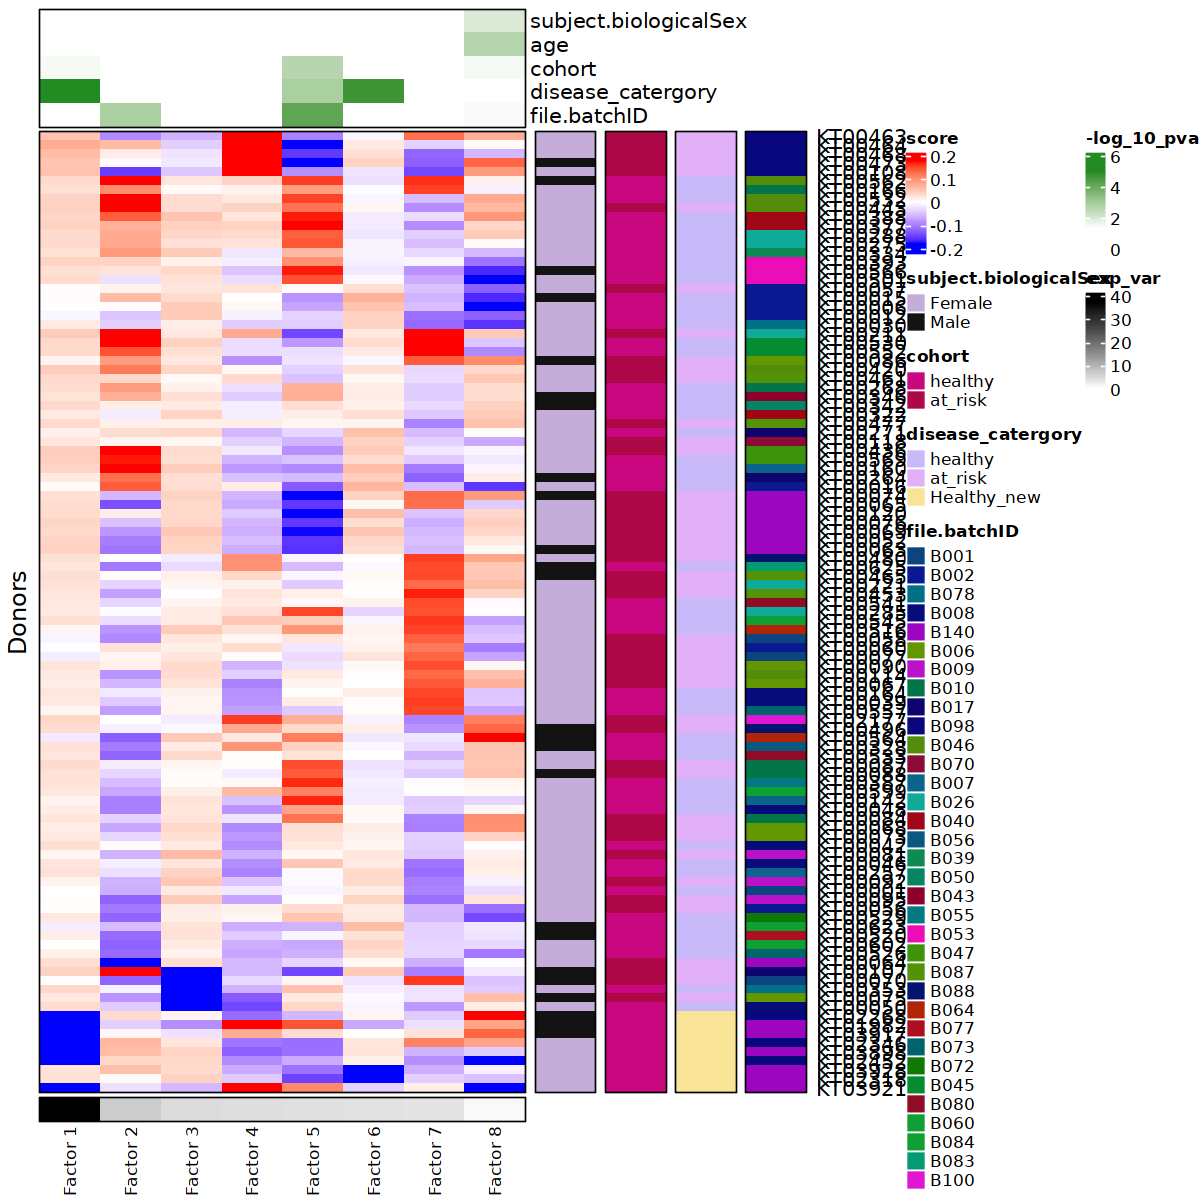

In [428]:
set.seed(1230)
options(repr.plot.width = 10, repr.plot.height = 10)
myfig2 <- (t1_container$plots$donor_matrix)
myfig2

In [429]:
t1_container <- get_lm_pvals(t1_container)

In [430]:
# generate the loadings plots
t1_container <- get_all_lds_factor_plots(t1_container, 
                                           use_sig_only=TRUE,
                                           nonsig_to_zero=TRUE,
                                           sig_thresh=0.01,
                                           display_genes=FALSE,
                                           gene_callouts = TRUE,
                                           callout_n_gene_per_ctype=3,
                                           show_var_explained = TRUE)

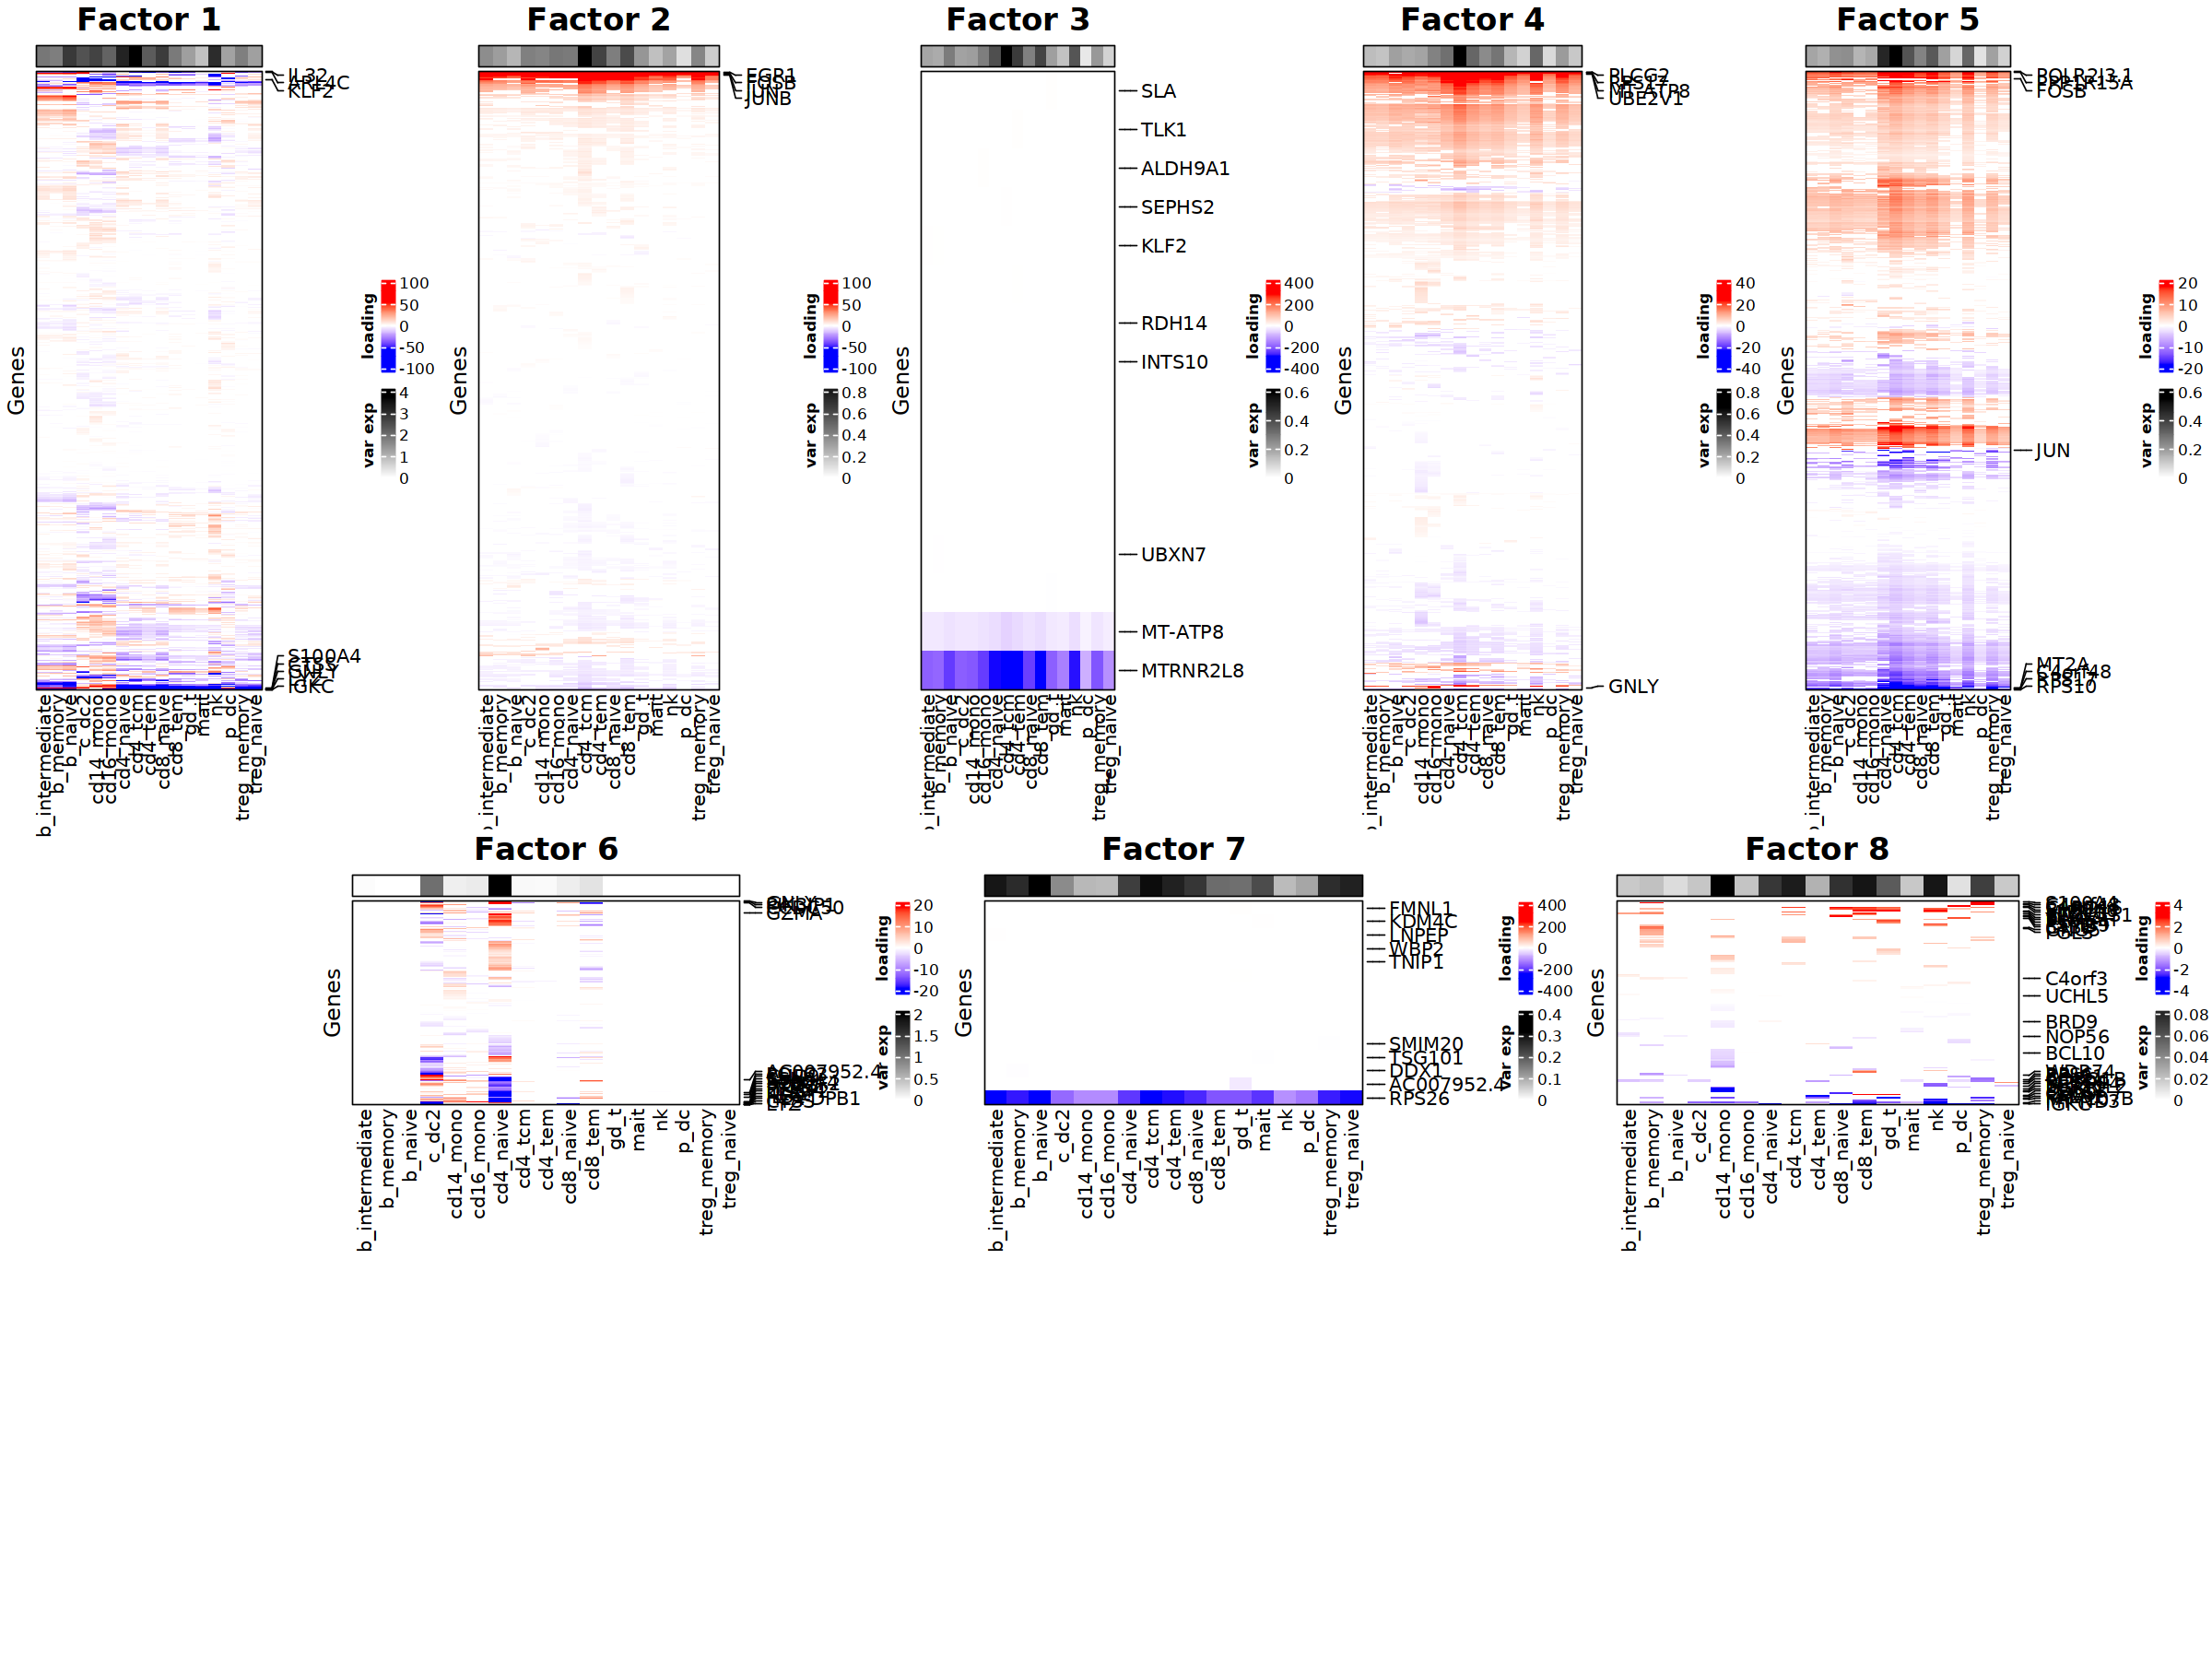

In [431]:
# arrange the plots into a figure and show the figure
options(repr.plot.width = 20, repr.plot.height = 15)
myfig3<- render_multi_plots(t1_container,data_type='loadings', max_cols = 5)
#myfig
#myfig1
myfig3

In [432]:
ldngs1 <-t1_container$tucker_results[[2]]
ldngs1
#write.csv(ldngs1,"/home/jupyter//ra_B140_B098_check/R_Notebooks/Tensor_csv_files/107S_F8_ldngs_genes.csv")
#write.csv(ldngs1,"/home/jupyter//ra_B140_B098_check/R_Notebooks/Tensor_csv_files/107S_F8_ldngs_genes_NEW.csv")

b_intermediate:A1BG b_intermediate:ABCF1 b_intermediate:ABHD14A
[1,] -0.4672808          -2.11429945          -1.42051435           
[2,] -1.0566323          -1.81879471           0.03813222           
[3,]  0.1042558          -0.23791743           0.62147387           
[4,]  2.3700423           4.71948409          -0.52674474           
[5,] -7.0560462          -2.27249530          -2.66609253           
[6,] -0.3334024          -0.61610163          -0.31997923           
[7,]  1.1547018          -0.02467761          -0.05593928           
[8,] -1.3638494           0.06681107           0.35857828           
     b_intermediate:ABHD2 b_intermediate:ABTB1 b_intermediate:AC004687.1
[1,] -1.0428336           -0.31714913          18.0420205               
[2,]  0.0025370            1.96813282          -0.1104015               
[3,] -0.2377866            0.26078358           1.2658720               
[4,]  0.7944093           -1.35161614          -3.8143776               
[5,]  1.6325143            0.23107407           7.4983534               
[6,]  0.2984535            0.07329956           0.5352029               
[7,] -0.2988997           -0.52904397           1.7059046               
[8,]  0.4121360            0.09972871          -0.1716659               
     b_intermediate:AC006369.1 b_intermediate:AC007952.4
[1,]  0.29367156               -26.1319217              
[2,]  1.84379235                46.3840145              
[3,] -0.06464816                -0.9490768              
[4,]  2.24417477               -16.4465729              
[5,] -2.38901308                19.0162878              
[6,] -0.75564752                -3.0817856              
[7,] -1.96342579               -25.3737783              
[8,]  0.70967052                -8.4190871              
     b_intermediate:AC010642.2 b_intermediate:AC016831.7 ⋯ treg_naive:ZNF720
[1,] -0.42496466                9.8317758                ⋯  0.17549489      
[2,] -0.40363072                7.2022279                ⋯  0.08604023      
[3,]  0.05828625                0.4003816                ⋯  0.10716794      
[4,]  0.83726703                0.2342378                ⋯ -0.97000129      
[5,] -1.32927567               11.4387697                ⋯  1.46937897      
[6,] -0.21016665                0.1481553                ⋯  0.10768841      
[7,]  0.54223395                0.4378286                ⋯ -0.18868760      
[8,] -0.05936177               -0.9269563                ⋯ -0.16668295      
     treg_naive:ZNF75A treg_naive:ZNF791 treg_naive:ZNF800 treg_naive:ZNF91
[1,]  3.8114892         0.40151087        1.41093926        7.4514021      
[2,]  0.2806779         0.65663722        0.80841478        1.8136378      
[3,] -0.1316753        -0.08576632        0.08220764        0.5247847      
[4,] -1.5175037        -0.09234661       -1.09220523       -2.5987070      
[5,]  2.9744572         2.70860057        2.43338013        6.1957923      
[6,]  0.2484650         0.18787594        0.18605699        0.5591767      
[7,]  1.1303817         0.55766371        0.43094712       -0.3147409      
[8,] -0.4994072        -0.47711107       -0.30212439       -1.4567075      
     treg_naive:ZNHIT1 treg_naive:ZNHIT3 treg_naive:ZNRF2 treg_naive:ZRANB2
[1,] -4.4003458         0.60448021       -0.79522021       3.2347312       
[2,] -2.5189399        -1.12832673        0.05309349      -0.8676992       
[3,] -0.8100307         0.06391014        0.36958596      -0.1917642       
[4,]  3.4016507        -0.41021630       -1.28685408       2.2303833       
[5,] -3.4226982        -1.72014793        1.21454282       1.2126809       
[6,] -0.1824726        -0.06996082        0.05200073       0.2191699       
[7,] -0.8892420        -0.24889264        0.78561051      -0.5118166       
[8,]  0.4979485         0.01797059       -0.20696613      -0.9640254       
     treg_naive:ZSCAN16-AS1
[1,] -0.5315350            
[2,] -2.2518771            
[3,] -1.7025747            
[4,]  9.6270878            
[5,] -3.95044

In [433]:
ldngs4 <-t1_container$tucker_results[[1]]
ldngs4%>%head()
ldngs4%>%dim()

[,1]          [,2]         [,3]       [,4]          [,5]       
KT00001  0.0003110427 -0.061247145 0.01980800 -0.0171669728 -0.00808521
KT00006 -0.0006527717 -0.002434971 0.04695186  0.0071789524 -0.06947834
KT00012 -0.0067342228 -0.044302310 0.04896034 -0.0109348305 -0.03405067
KT00015 -0.0028253829  0.062966140 0.03389436 -0.0007006534 -0.08322836
KT00016  0.0048733796  0.142003653 0.03188161  0.0172904480 -0.12588241
KT00030  0.0183425919 -0.036579963 0.01547674 -0.0376877765 -0.03744410
        [,6]       [,7]        [,8]       
KT00001 0.01761785 -0.09604690 -0.02586019
KT00006 0.05597506 -0.04951755 -0.20305851
KT00012 0.04171655 -0.11018501 -0.12135606
KT00015 0.07065691 -0.05772189 -0.16206596
KT00016 0.06802886 -0.04915351 -0.15399664
KT00030 0.04172002 -0.11627499 -0.15533046

[1] 107   8

In [293]:
#write.csv(ldngs4,"/home/jupyter/ra_B140_B098_check/R_Notebooks/Tensor_csv_files/107S_F8_tuc1_res.csv")
#write.csv(ldngs4,"/home/jupyter/ra_B140_B098_check/R_Notebooks/Tensor_csv_files/107S_F8_tuc1_res_NEW.csv")

In [335]:
x1=as.data.frame(ldngs4,header=TRUE)
x1%>%head()
x1%>%dim()

V1            V2           V3         V4            V5         
KT00001  0.0003110427 -0.061247145 0.01980800 -0.0171669728 -0.00808521
KT00006 -0.0006527717 -0.002434971 0.04695186  0.0071789524 -0.06947834
KT00012 -0.0067342228 -0.044302310 0.04896034 -0.0109348305 -0.03405067
KT00015 -0.0028253829  0.062966140 0.03389436 -0.0007006534 -0.08322836
KT00016  0.0048733796  0.142003653 0.03188161  0.0172904480 -0.12588241
KT00030  0.0183425919 -0.036579963 0.01547674 -0.0376877765 -0.03744410
        V6         V7          V8         
KT00001 0.01761785 -0.09604690 -0.02586019
KT00006 0.05597506 -0.04951755 -0.20305851
KT00012 0.04171655 -0.11018501 -0.12135606
KT00015 0.07065691 -0.05772189 -0.16206596
KT00016 0.06802886 -0.04915351 -0.15399664
KT00030 0.04172002 -0.11627499 -0.15533046

[1] 107   8

In [336]:
colnames(x1)=c("Factor1","Factor2","Factor3","Factor4","Factor5","Factor6","Factor7","Factor8")

In [337]:
x2=read.csv("/home/jupyter/ra_B140_B098_check/R_Notebooks/Tensor_csv_files/Trail_meta_107S_1ct.csv",header=TRUE)
x2%>%head(3)
x2%>%colnames()

X.1 X sample.sampleKitGuid lastUpdated   
1 1   1 KT00001              10/19/22 20:39
2 2   2 KT00006              10/19/22 20:39
3 3   3 KT00012              10/19/22 20:39
  sample.id                            sample.bridgingControl sample.visitName
1 f499ff83-e513-4d24-a10f-151348269fff FALSE                  Flu Year 1 Day 0
2 eb5b3a3d-002e-40a6-aa19-aa0e6a7fff8f FALSE                  Flu Year 1 Day 0
3 fb3c3406-2797-4c31-b085-37d8138099a3 FALSE                  Flu Year 1 Day 0
  sample.visitDetails             sample.drawDate sample.daysSinceFirstVisit ⋯
1 N/A - Flu-Series Timepoint Only 10/1/19         0                          ⋯
2 N/A - Flu-Series Timepoint Only 10/1/19         0                          ⋯
3 N/A - Flu-Series Timepoint Only 10/1/19         0                          ⋯
  sample.sampleKitGuid.1 predicted.celltype.l2.5.1 ncells BMI   rulein_cluster
1 KT00001                CD4 Naive                 1630      NA NA            
2 KT00006                CD4 Naive                 3150   20.50 C2            
3 KT00012                CD4 Naive                 1469   33.69 C1            
  disease_catergory sex    age_bin clusterID cell_type     
1 healthy           Female below50 2         b_intermediate
2 healthy           Female below50 2         b_intermediate
3 healthy           Female below50 2         b_intermediate

[1] "X.1"                        "X"                         
 [3] "sample.sampleKitGuid"       "lastUpdated"               
 [5] "sample.id"                  "sample.bridgingControl"    
 [7] "sample.visitName"           "sample.visitDetails"       
 [9] "sample.drawDate"            "sample.daysSinceFirstVisit"
[11] "file.id"                    "file.name"                 
[13] "file.batchID"               "subject.id"                
[15] "subject.biologicalSex"      "subject.birthYear"         
[17] "subject.ethnicity"          "subject.partnerCode"       
[19] "subject.race"               "subject.subjectGuid"       
[21] "cohort.cohortGuid"          "category"                  
[23] "Serum_CCP3Final"            "Serum_CCP3Outcome"         
[25] "Serum_RFIgAfinal"           "Serum_RFIgAOutcome"        
[27] "Serum_RFIgMfinal"           "Serum_RFIgMOutcome"        
[29] "SputumCollected"            "SP_RFIgA_FinalLevel"       
[31] "SP_RFIgM_FinalLevel"        "Sp_CCPIgA_FinalLevel"      
[33] "SP_CCPIgG_FinalLevel"       "cohort"                    
[35] "cell_counts"                "age"                       
[37] "ident"                      "sizeFactor"                
[39] "sample.sampleKitGuid.1"     "predicted.celltype.l2.5.1" 
[41] "ncells"                     "BMI"                       
[43] "rulein_cluster"             "disease_catergory"         
[45] "sex"                        "age_bin"                   
[47] "clusterID"                  "cell_type"

In [338]:
x2_sub=x2[1:107,c('sample.sampleKitGuid','sex','age','cohort','disease_catergory','file.batchID')]
x2_sub%>%head()

sample.sampleKitGuid sex    age cohort  disease_catergory file.batchID
1 KT00001              Female 32  healthy healthy           B001        
2 KT00006              Female 27  healthy healthy           B002        
3 KT00012              Female 34  healthy healthy           B002        
4 KT00015              Male   59  healthy healthy           B002        
5 KT00016              Female 57  healthy healthy           B002        
6 KT00030              Female 31  healthy healthy           B078

In [339]:
x3=cbind(x1,x2_sub)
x3%>%head()

Factor1       Factor2      Factor3    Factor4       Factor5    
KT00001  0.0003110427 -0.061247145 0.01980800 -0.0171669728 -0.00808521
KT00006 -0.0006527717 -0.002434971 0.04695186  0.0071789524 -0.06947834
KT00012 -0.0067342228 -0.044302310 0.04896034 -0.0109348305 -0.03405067
KT00015 -0.0028253829  0.062966140 0.03389436 -0.0007006534 -0.08322836
KT00016  0.0048733796  0.142003653 0.03188161  0.0172904480 -0.12588241
KT00030  0.0183425919 -0.036579963 0.01547674 -0.0376877765 -0.03744410
        Factor6    Factor7     Factor8     sample.sampleKitGuid sex    age
KT00001 0.01761785 -0.09604690 -0.02586019 KT00001              Female 32 
KT00006 0.05597506 -0.04951755 -0.20305851 KT00006              Female 27 
KT00012 0.04171655 -0.11018501 -0.12135606 KT00012              Female 34 
KT00015 0.07065691 -0.05772189 -0.16206596 KT00015              Male   59 
KT00016 0.06802886 -0.04915351 -0.15399664 KT00016              Female 57 
KT00030 0.04172002 -0.11627499 -0.15533046 KT00030              Female 31 
        cohort  disease_catergory file.batchID
KT00001 healthy healthy           B001        
KT00006 healthy healthy           B002        
KT00012 healthy healthy           B002        
KT00015 healthy healthy           B002        
KT00016 healthy healthy           B002        
KT00030 healthy healthy           B078

In [340]:
x4 <- x3[,c(1,9,10,11,12,13,14)]
x4$Factor="Factor1"
names(x4)[names(x4) == "Factor1"] <- "Fc_val"
head(x4)
colnames(x4)
dim(x4)

Fc_val        sample.sampleKitGuid sex    age cohort  disease_catergory
KT00001  0.0003110427 KT00001              Female 32  healthy healthy          
KT00006 -0.0006527717 KT00006              Female 27  healthy healthy          
KT00012 -0.0067342228 KT00012              Female 34  healthy healthy          
KT00015 -0.0028253829 KT00015              Male   59  healthy healthy          
KT00016  0.0048733796 KT00016              Female 57  healthy healthy          
KT00030  0.0183425919 KT00030              Female 31  healthy healthy          
        file.batchID Factor 
KT00001 B001         Factor1
KT00006 B002         Factor1
KT00012 B002         Factor1
KT00015 B002         Factor1
KT00016 B002         Factor1
KT00030 B078         Factor1

[1] "Fc_val"               "sample.sampleKitGuid" "sex"                 
[4] "age"                  "cohort"               "disease_catergory"   
[7] "file.batchID"         "Factor"

[1] 107   8

In [341]:
x5 <- x3[,c(2,9,10,11,12,13,14)]
x5$Factor="Factor2"
names(x5)[names(x5) == "Factor2"] <- "Fc_val"
head(x5)
colnames(x5)

Fc_val       sample.sampleKitGuid sex    age cohort  disease_catergory
KT00001 -0.061247145 KT00001              Female 32  healthy healthy          
KT00006 -0.002434971 KT00006              Female 27  healthy healthy          
KT00012 -0.044302310 KT00012              Female 34  healthy healthy          
KT00015  0.062966140 KT00015              Male   59  healthy healthy          
KT00016  0.142003653 KT00016              Female 57  healthy healthy          
KT00030 -0.036579963 KT00030              Female 31  healthy healthy          
        file.batchID Factor 
KT00001 B001         Factor2
KT00006 B002         Factor2
KT00012 B002         Factor2
KT00015 B002         Factor2
KT00016 B002         Factor2
KT00030 B078         Factor2

[1] "Fc_val"               "sample.sampleKitGuid" "sex"                 
[4] "age"                  "cohort"               "disease_catergory"   
[7] "file.batchID"         "Factor"

In [342]:
x6 <- x3[,c(3,9,10,11,12,13,14)]
x6$Factor="Factor3"
names(x6)[names(x6) == "Factor3"] <- "Fc_val"
head(x6)
colnames(x6)

Fc_val     sample.sampleKitGuid sex    age cohort  disease_catergory
KT00001 0.01980800 KT00001              Female 32  healthy healthy          
KT00006 0.04695186 KT00006              Female 27  healthy healthy          
KT00012 0.04896034 KT00012              Female 34  healthy healthy          
KT00015 0.03389436 KT00015              Male   59  healthy healthy          
KT00016 0.03188161 KT00016              Female 57  healthy healthy          
KT00030 0.01547674 KT00030              Female 31  healthy healthy          
        file.batchID Factor 
KT00001 B001         Factor3
KT00006 B002         Factor3
KT00012 B002         Factor3
KT00015 B002         Factor3
KT00016 B002         Factor3
KT00030 B078         Factor3

[1] "Fc_val"               "sample.sampleKitGuid" "sex"                 
[4] "age"                  "cohort"               "disease_catergory"   
[7] "file.batchID"         "Factor"

In [343]:
x7 <- x3[,c(4,9,10,11,12,13,14)]
x7$Factor="Factor4"
names(x7)[names(x7) == "Factor4"] <- "Fc_val"
head(x7)
colnames(x7)

Fc_val        sample.sampleKitGuid sex    age cohort  disease_catergory
KT00001 -0.0171669728 KT00001              Female 32  healthy healthy          
KT00006  0.0071789524 KT00006              Female 27  healthy healthy          
KT00012 -0.0109348305 KT00012              Female 34  healthy healthy          
KT00015 -0.0007006534 KT00015              Male   59  healthy healthy          
KT00016  0.0172904480 KT00016              Female 57  healthy healthy          
KT00030 -0.0376877765 KT00030              Female 31  healthy healthy          
        file.batchID Factor 
KT00001 B001         Factor4
KT00006 B002         Factor4
KT00012 B002         Factor4
KT00015 B002         Factor4
KT00016 B002         Factor4
KT00030 B078         Factor4

[1] "Fc_val"               "sample.sampleKitGuid" "sex"                 
[4] "age"                  "cohort"               "disease_catergory"   
[7] "file.batchID"         "Factor"

In [344]:
x8 <- x3[,c(5,9,10,11,12,13,14)]
x8$Factor="Factor5"
names(x8)[names(x8) == "Factor5"] <- "Fc_val"
head(x8)
colnames(x8)

Fc_val      sample.sampleKitGuid sex    age cohort  disease_catergory
KT00001 -0.00808521 KT00001              Female 32  healthy healthy          
KT00006 -0.06947834 KT00006              Female 27  healthy healthy          
KT00012 -0.03405067 KT00012              Female 34  healthy healthy          
KT00015 -0.08322836 KT00015              Male   59  healthy healthy          
KT00016 -0.12588241 KT00016              Female 57  healthy healthy          
KT00030 -0.03744410 KT00030              Female 31  healthy healthy          
        file.batchID Factor 
KT00001 B001         Factor5
KT00006 B002         Factor5
KT00012 B002         Factor5
KT00015 B002         Factor5
KT00016 B002         Factor5
KT00030 B078         Factor5

[1] "Fc_val"               "sample.sampleKitGuid" "sex"                 
[4] "age"                  "cohort"               "disease_catergory"   
[7] "file.batchID"         "Factor"

In [345]:
x9 <- x3[,c(6,9,10,11,12,13,14)]
x9$Factor="Factor6"
names(x9)[names(x9) == "Factor6"] <- "Fc_val"
head(x9)
colnames(x9)

Fc_val     sample.sampleKitGuid sex    age cohort  disease_catergory
KT00001 0.01761785 KT00001              Female 32  healthy healthy          
KT00006 0.05597506 KT00006              Female 27  healthy healthy          
KT00012 0.04171655 KT00012              Female 34  healthy healthy          
KT00015 0.07065691 KT00015              Male   59  healthy healthy          
KT00016 0.06802886 KT00016              Female 57  healthy healthy          
KT00030 0.04172002 KT00030              Female 31  healthy healthy          
        file.batchID Factor 
KT00001 B001         Factor6
KT00006 B002         Factor6
KT00012 B002         Factor6
KT00015 B002         Factor6
KT00016 B002         Factor6
KT00030 B078         Factor6

[1] "Fc_val"               "sample.sampleKitGuid" "sex"                 
[4] "age"                  "cohort"               "disease_catergory"   
[7] "file.batchID"         "Factor"

In [346]:
x10 <- x3[,c(7,9,10,11,12,13,14)]
x10$Factor="Factor7"
names(x10)[names(x10) == "Factor7"] <- "Fc_val"
head(x10)
colnames(x10)

Fc_val      sample.sampleKitGuid sex    age cohort  disease_catergory
KT00001 -0.09604690 KT00001              Female 32  healthy healthy          
KT00006 -0.04951755 KT00006              Female 27  healthy healthy          
KT00012 -0.11018501 KT00012              Female 34  healthy healthy          
KT00015 -0.05772189 KT00015              Male   59  healthy healthy          
KT00016 -0.04915351 KT00016              Female 57  healthy healthy          
KT00030 -0.11627499 KT00030              Female 31  healthy healthy          
        file.batchID Factor 
KT00001 B001         Factor7
KT00006 B002         Factor7
KT00012 B002         Factor7
KT00015 B002         Factor7
KT00016 B002         Factor7
KT00030 B078         Factor7

[1] "Fc_val"               "sample.sampleKitGuid" "sex"                 
[4] "age"                  "cohort"               "disease_catergory"   
[7] "file.batchID"         "Factor"

In [347]:
x11 <- x3[,c(8,9,10,11,12,13,14)]
x11$Factor="Factor8"
names(x11)[names(x11) == "Factor8"] <- "Fc_val"
head(x11)
colnames(x11)

Fc_val      sample.sampleKitGuid sex    age cohort  disease_catergory
KT00001 -0.02586019 KT00001              Female 32  healthy healthy          
KT00006 -0.20305851 KT00006              Female 27  healthy healthy          
KT00012 -0.12135606 KT00012              Female 34  healthy healthy          
KT00015 -0.16206596 KT00015              Male   59  healthy healthy          
KT00016 -0.15399664 KT00016              Female 57  healthy healthy          
KT00030 -0.15533046 KT00030              Female 31  healthy healthy          
        file.batchID Factor 
KT00001 B001         Factor8
KT00006 B002         Factor8
KT00012 B002         Factor8
KT00015 B002         Factor8
KT00016 B002         Factor8
KT00030 B078         Factor8

[1] "Fc_val"               "sample.sampleKitGuid" "sex"                 
[4] "age"                  "cohort"               "disease_catergory"   
[7] "file.batchID"         "Factor"

In [348]:
factor_values=rbind(x4,x5,x6,x7,x8,x9,x10,x11)

In [349]:
factor_values%>%head(3)
factor_values%>%dim()

Fc_val        sample.sampleKitGuid sex    age cohort  disease_catergory
KT00001  0.0003110427 KT00001              Female 32  healthy healthy          
KT00006 -0.0006527717 KT00006              Female 27  healthy healthy          
KT00012 -0.0067342228 KT00012              Female 34  healthy healthy          
        file.batchID Factor 
KT00001 B001         Factor1
KT00006 B002         Factor1
KT00012 B002         Factor1

[1] 856   8

In [232]:
factor_values%>%filter(Factor=='Factor1')%>%arrange(desc(Fc_val))

Fc_val        sample.sampleKitGuid sex    age cohort  disease_catergory
KT00464 0.07616446    KT00464              Female 33  at_risk at_risk          
KT00468 0.06118409    KT00468              Female 52  at_risk at_risk          
KT00108 0.05699768    KT00108              Female 52  at_risk at_risk          
KT00463 0.05559257    KT00463              Female 33  at_risk at_risk          
KT00473 0.05364848    KT00473              Male   76  at_risk at_risk          
KT00211 0.04867508    KT00211              Female 64  at_risk at_risk          
KT00420 0.04707077    KT00420              Female 28  at_risk at_risk          
KT00436 0.04648203    KT00436              Female 66  at_risk at_risk          
KT00569 0.04525506    KT00569              Female 63  healthy healthy          
KT00443 0.04286602    KT00443              Female 46  at_risk at_risk          
KT00377 0.04237662    KT00377              Female 56  healthy healthy          
KT00063 0.04179207    KT00063              Male   39  at_risk at_risk          
KT00393 0.04129924    KT00393              Female 56  healthy healthy          
KT00107 0.04126520    KT00107              Male   58  at_risk at_risk          
KT00532 0.04053835    KT00532              Female 35  healthy healthy          
KT00052 0.03980502    KT00052              Female 56  at_risk at_risk          
KT00076 0.03923544    KT00076              Female 76  at_risk at_risk          
KT00388 0.03869473    KT00388              Female 62  healthy healthy          
KT00160 0.03866878    KT00160              Female 60  healthy healthy          
KT02177 0.03770871    KT02177              Female 64  at_risk at_risk          
KT00353 0.03701390    KT00353              Female 56  healthy healthy          
KT00461 0.03525763    KT00461              Female 72  at_risk at_risk          
KT00530 0.03506478    KT00530              Female 55  healthy healthy          
KT00342 0.03491874    KT00342              Male   55  healthy healthy          
KT00275 0.03475689    KT00275              Female 61  healthy healthy          
KT00562 0.03434915    KT00562              Male   61  healthy healthy          
KT00477 0.03421659    KT00477              Female 63  at_risk at_risk          
KT00501 0.03411481    KT00501              Female 63  healthy healthy          
KT00050 0.03403368    KT00050              Female 28  healthy healthy          
KT00552 0.03379835    KT00552              Female 62  healthy healthy          
⋮       ⋮             ⋮                    ⋮      ⋮   ⋮       ⋮                
KT00526  0.0142731180 KT00526              Female 60  healthy healthy          
KT00271  0.0136141600 KT00271              Female 36  healthy healthy          
KT00092  0.0115727466 KT00092              Female 33  at_risk at_risk          
KT00086  0.0107017417 KT00086              Male   76  at_risk at_risk          
KT00142  0.0102045059 KT00142              Female 30  healthy healthy          
KT00081  0.0094999505 KT00081              Female 51  at_risk at_risk          
KT00557  0.0091770711 KT00557              Female 56  healthy healthy          
KT00516  0.0080784378 KT00516              Female 62  healthy healthy          
KT00016  0.0048733796 KT00016              Female 57  healthy healthy          
KT00095  0.0030786415 KT00095              Female 50  at_risk at_risk          
KT00070  0.0029835149 KT00070              Male   76  at_risk at_risk          
KT00057  0.0024921860 KT00057              Female 21  at_risk at_risk          
KT00056  0.0010057314 KT00056              Female 42  at_risk at_risk          
KT00602  0.0004016492 KT00602              Female 59  healthy healthy          
KT00001  0.0003110427 KT00001              Female 32  healthy healthy          
KT00006 -0.0006527717 KT00006              Female 27  healthy healthy          
KT00060 -0.0015097160 KT00060              Female 40  at_risk at_risk          
KT00015 -0.0028253829 KT00015              Male   59  healthy healthy          
KT00012 

In [350]:
# run glm pretreatment vs healthy 
glm_test <- function(data, formula){
    glm_res <- broom::tidy(stats::glm(as.formula(formula), data=data)) 
    return(glm_res)
}

In [234]:
factor_values

Fc_val        sample.sampleKitGuid sex    age cohort 
KT00001   0.0003110427 KT00001              Female 32  healthy
KT00006  -0.0006527717 KT00006              Female 27  healthy
KT00012  -0.0067342228 KT00012              Female 34  healthy
KT00015  -0.0028253829 KT00015              Male   59  healthy
KT00016   0.0048733796 KT00016              Female 57  healthy
KT00030   0.0183425919 KT00030              Female 31  healthy
KT00039   0.0198155134 KT00039              Female 35  healthy
KT00042   0.0305528909 KT00042              Female 34  healthy
KT00046   0.0248937359 KT00046              Female 28  healthy
KT00048   0.0168089759 KT00048              Female 35  healthy
KT00050   0.0340336819 KT00050              Female 28  healthy
KT00052   0.0398050156 KT00052              Female 56  at_risk
KT00056   0.0010057314 KT00056              Female 42  at_risk
KT00057   0.0024921860 KT00057              Female 21  at_risk
KT00058  -0.0075367765 KT00058              Female 78  at_risk
KT00060  -0.0015097160 KT00060              Female 40  at_risk
KT00063   0.0417920744 KT00063              Male   39  at_risk
KT00064   0.0312906345 KT00064              Female 58  at_risk
KT00065   0.0323086548 KT00065              Female 61  at_risk
KT00067   0.0157944339 KT00067              Female 74  at_risk
KT00068   0.0167057987 KT00068              Female 55  at_risk
KT00069   0.0335803026 KT00069              Female 66  at_risk
KT00070   0.0029835149 KT00070              Male   76  at_risk
KT00073   0.0204948665 KT00073              Female 71  at_risk
KT00074   0.0286168869 KT00074              Male   74  at_risk
KT00075   0.0213206768 KT00075              Male   66  at_risk
KT00076   0.0392354381 KT00076              Female 76  at_risk
KT00077  -0.0125098714 KT00077              Female 32  at_risk
KT00081   0.0094999505 KT00081              Female 51  at_risk
KT00084   0.0243225785 KT00084              Female 65  at_risk
⋮        ⋮             ⋮                    ⋮      ⋮   ⋮      
KT005017 -0.194134143  KT00501              Female 63  healthy
KT005167 -0.051265221  KT00516              Female 62  healthy
KT005207 -0.020468915  KT00520              Male   56  healthy
KT005267 -0.103463806  KT00526              Female 60  healthy
KT005297 -0.139981297  KT00529              Female 31  healthy
KT005307 -0.044812377  KT00530              Female 55  healthy
KT005327  0.078416673  KT00532              Female 35  healthy
KT005337  0.052872200  KT00533              Female 61  healthy
KT005417 -0.004148161  KT00541              Female 61  healthy
KT005457 -0.072039015  KT00545              Female 55  healthy
KT005527 -0.091258345  KT00552              Female 62  healthy
KT005577 -0.070454983  KT00557              Female 56  healthy
KT005627  0.014176914  KT00562              Male   61  healthy
KT005647  0.206267852  KT00564              Male   65  healthy
KT005667 -0.162047444  KT00566              Male   60  healthy
KT005697 -0.015509938  KT00569              Female 63  healthy
KT005997  0.004821651  KT00599              Female 63  healthy
KT006027 -0.029595978  KT00602              Female 59  healthy
KT006237 -0.017873295  KT00623              Male   60  healthy
KT006257  0.050853665  KT00625              Male   64  healthy
KT021777  0.115345312  KT02177              Female 64  at_risk
KT019827  0.084922300  KT01982              Male   59  healthy
KT022687  0.416414707  KT02268              Male   62  healthy
KT023187 -0.046754495  KT02318              Female 61  healthy
KT023467  0.083503552  KT02346              Female 58  healthy
KT024527 -0.183133607  KT02452              Female 58  healthy
KT038987 -0.038279363  KT03898              Female 61  healthy
KT039177  0.134837497  KT03917              Female 64  healthy
KT039217 -0.441443409  KT03921              Male   30  healthy
KT039287 -0.011113601  KT03928              Female 27  healthy
         disease_catergory file.batchID Factor 
KT00001  healthy           B001         Factor1
KT00006

In [351]:
stats_glm <- factor_values %>%
     mutate(disease_category=factor(cohort, levels = c('healthy', 'at_risk')),Factor=factor(Factor)) %>%
    group_by(Factor) %>% 
    group_modify(~glm_test(.x, formula='Fc_val ~ disease_category + age +sex')) 

In [352]:
factor_values%>% head()

Fc_val        sample.sampleKitGuid sex    age cohort  disease_catergory
KT00001  0.0003110427 KT00001              Female 32  healthy healthy          
KT00006 -0.0006527717 KT00006              Female 27  healthy healthy          
KT00012 -0.0067342228 KT00012              Female 34  healthy healthy          
KT00015 -0.0028253829 KT00015              Male   59  healthy healthy          
KT00016  0.0048733796 KT00016              Female 57  healthy healthy          
KT00030  0.0183425919 KT00030              Female 31  healthy healthy          
        file.batchID Factor 
KT00001 B001         Factor1
KT00006 B002         Factor1
KT00012 B002         Factor1
KT00015 B002         Factor1
KT00016 B002         Factor1
KT00030 B078         Factor1

In [353]:
library(knitr)
kable(table(distinct(factor_values, sample.sampleKitGuid, .keep_all = TRUE)$cohort))



|Var1    | Freq|
|:-------|----:|
|at_risk |   46|
|healthy |   61|

In [354]:
stats_glm %>%head(3)

Factor  term                    estimate      std.error    statistic  
1 Factor1 (Intercept)              0.0004327167 0.0346284972  0.01249597
2 Factor1 disease_categoryat_risk  0.0513565710 0.0188617682  2.72278667
3 Factor1 age                     -0.0003030817 0.0006636686 -0.45667623
  p.value    
1 0.990054089
2 0.007603978
3 0.648865382

In [355]:
stats_glm_new=stats_glm  %>% filter(term!='(Intercept)') %>% 
    rstatix::adjust_pvalue(p.col = 'p.value', method = 'BH') %>% 
    arrange(p.value.adj)

In [356]:
stats_glm_new

Factor  term                    estimate      std.error    statistic   
1  Factor5 disease_categoryat_risk -0.0676778034 0.0185564374 -3.647133449
2  Factor8 age                      0.0018714594 0.0006355364  2.944692810
3  Factor1 disease_categoryat_risk  0.0513565710 0.0188617682  2.722786669
4  Factor3 sexMale                 -0.0577551961 0.0234101022 -2.467105674
5  Factor8 disease_categoryat_risk  0.0381750389 0.0180622365  2.113527802
6  Factor7 age                      0.0013077565 0.0006804689  1.921845999
7  Factor4 disease_categoryat_risk  0.0369592602 0.0192738728  1.917583483
8  Factor4 sexMale                  0.0294181056 0.0236325624  1.244812356
9  Factor1 sexMale                 -0.0279766112 0.0231272623 -1.209681058
10 Factor2 disease_categoryat_risk -0.0296692543 0.0195030886 -1.521259269
11 Factor3 disease_categoryat_risk -0.0204680745 0.0190924423 -1.072051137
12 Factor8 sexMale                  0.0164856755 0.0221469205  0.744377780
13 Factor6 disease_categoryat_risk  0.0279462140 0.0194967828  1.433375664
14 Factor4 age                     -0.0004888613 0.0006781689 -0.720854761
15 Factor3 age                      0.0004789359 0.0006717851  0.712930173
16 Factor1 age                     -0.0003030817 0.0006636686 -0.456676231
17 Factor7 sexMale                 -0.0150245374 0.0237127121 -0.633606876
18 Factor5 age                      0.0003941118 0.0006529253  0.603609373
19 Factor7 disease_categoryat_risk  0.0042918090 0.0193392401  0.221922316
20 Factor2 age                      0.0003219522 0.0006862341  0.469157910
21 Factor2 sexMale                 -0.0052611994 0.0239136141 -0.220008544
22 Factor5 sexMale                 -0.0029574673 0.0227528825 -0.129982093
23 Factor6 sexMale                  0.0118828631 0.0239058823  0.497068587
24 Factor6 age                     -0.0000065595 0.0006860122 -0.009561783
   p.value      p.value.adj
1  0.0004179528 0.001253858
2  0.0039964111 0.011989233
3  0.0076039777 0.022811933
4  0.0152699016 0.045809705
5  0.0369709968 0.055456495
6  0.0573885837 0.172165751
7  0.0579339009 0.173801703
8  0.2160255936 0.324038390
9  0.2291704183 0.343755627
10 0.1312588833 0.393776650
11 0.2862025216 0.429303782
12 0.4583428875 0.458342888
13 0.1547790742 0.464337222
14 0.4726318210 0.472631821
15 0.4775010399 0.477501040
16 0.6488653821 0.648865382
17 0.5277418985 0.791612848
18 0.5474304056 0.821145608
19 0.8248137734 0.824813773
20 0.6399483399 0.826299960
21 0.8262999597 0.826299960
22 0.8968341037 0.896834104
23 0.6202000471 0.930300071
24 0.9923894126 0.992389413

In [357]:
sgn_1=stats_glm_new[,c("Factor","term","p.value","p.value.adj")]
sgn_1

Factor  term                    p.value      p.value.adj
1  Factor5 disease_categoryat_risk 0.0004179528 0.001253858
2  Factor8 age                     0.0039964111 0.011989233
3  Factor1 disease_categoryat_risk 0.0076039777 0.022811933
4  Factor3 sexMale                 0.0152699016 0.045809705
5  Factor8 disease_categoryat_risk 0.0369709968 0.055456495
6  Factor7 age                     0.0573885837 0.172165751
7  Factor4 disease_categoryat_risk 0.0579339009 0.173801703
8  Factor4 sexMale                 0.2160255936 0.324038390
9  Factor1 sexMale                 0.2291704183 0.343755627
10 Factor2 disease_categoryat_risk 0.1312588833 0.393776650
11 Factor3 disease_categoryat_risk 0.2862025216 0.429303782
12 Factor8 sexMale                 0.4583428875 0.458342888
13 Factor6 disease_categoryat_risk 0.1547790742 0.464337222
14 Factor4 age                     0.4726318210 0.472631821
15 Factor3 age                     0.4775010399 0.477501040
16 Factor1 age                     0.6488653821 0.648865382
17 Factor7 sexMale                 0.5277418985 0.791612848
18 Factor5 age                     0.5474304056 0.821145608
19 Factor7 disease_categoryat_risk 0.8248137734 0.824813773
20 Factor2 age                     0.6399483399 0.826299960
21 Factor2 sexMale                 0.8262999597 0.826299960
22 Factor5 sexMale                 0.8968341037 0.896834104
23 Factor6 sexMale                 0.6202000471 0.930300071
24 Factor6 age                     0.9923894126 0.992389413

In [244]:
sgn_1%>%head(3)

Factor  term                    p.value      p.value.adj
1 Factor5 disease_categoryat_risk 0.0004179528 0.001253858
2 Factor8 age                     0.0039964111 0.011989233
3 Factor1 disease_categoryat_risk 0.0076039777 0.022811933

In [250]:
############LEts take fac1 as of tensor results and analyze it########### 107S_F8_ldngs_genes_NEW.csv"

In [358]:
#a=read.csv("/home/jupyter/ra_B140_B098_check/R_Notebooks/Tensor_csv_files/107S_F8_ldngs_genes.csv")
#a=read.csv("/home/jupyter/ra_B140_B098_check/R_Notebooks/Tensor_csv_files/107S_F8_ldngs_genes_NEW.csv")
a=ldngs1

In [359]:
a%>%head(3)
a%>%class()

b_intermediate:A1BG b_intermediate:ABCF1 b_intermediate:ABHD14A
[1,] -0.4672808          -2.1142995           -1.42051435           
[2,] -1.0566323          -1.8187947            0.03813222           
[3,]  0.1042558          -0.2379174            0.62147387           
     b_intermediate:ABHD2 b_intermediate:ABTB1 b_intermediate:AC004687.1
[1,] -1.0428336           -0.3171491           18.0420205               
[2,]  0.0025370            1.9681328           -0.1104015               
[3,] -0.2377866            0.2607836            1.2658720               
     b_intermediate:AC006369.1 b_intermediate:AC007952.4
[1,]  0.29367156               -26.1319217              
[2,]  1.84379235                46.3840145              
[3,] -0.06464816                -0.9490768              
     b_intermediate:AC010642.2 b_intermediate:AC016831.7 ⋯ treg_naive:ZNF720
[1,] -0.42496466               9.8317758                 ⋯ 0.17549489       
[2,] -0.40363072               7.2022279                 ⋯ 0.08604023       
[3,]  0.05828625               0.4003816                 ⋯ 0.10716794       
     treg_naive:ZNF75A treg_naive:ZNF791 treg_naive:ZNF800 treg_naive:ZNF91
[1,]  3.8114892         0.40151087       1.41093926        7.4514021       
[2,]  0.2806779         0.65663722       0.80841478        1.8136378       
[3,] -0.1316753        -0.08576632       0.08220764        0.5247847       
     treg_naive:ZNHIT1 treg_naive:ZNHIT3 treg_naive:ZNRF2 treg_naive:ZRANB2
[1,] -4.4003458         0.60448021       -0.79522021       3.2347312       
[2,] -2.5189399        -1.12832673        0.05309349      -0.8676992       
[3,] -0.8100307         0.06391014        0.36958596      -0.1917642       
     treg_naive:ZSCAN16-AS1
[1,] -0.531535             
[2,] -2.251877             
[3,] -1.702575

[1] "matrix" "array"

In [360]:
at1=t(a)
head(at1)
dim(at1)

[,1]       [,2]        [,3]       [,4]      
b_intermediate:A1BG       -0.4672808 -1.05663231  0.1042558  2.3700423
b_intermediate:ABCF1      -2.1142995 -1.81879471 -0.2379174  4.7194841
b_intermediate:ABHD14A    -1.4205144  0.03813222  0.6214739 -0.5267447
b_intermediate:ABHD2      -1.0428336  0.00253700 -0.2377866  0.7944093
b_intermediate:ABTB1      -0.3171491  1.96813282  0.2607836 -1.3516161
b_intermediate:AC004687.1 18.0420205 -0.11040154  1.2658720 -3.8143776
                          [,5]       [,6]        [,7]        [,8]       
b_intermediate:A1BG       -7.0560462 -0.33340238  1.15470179 -1.36384940
b_intermediate:ABCF1      -2.2724953 -0.61610163 -0.02467761  0.06681107
b_intermediate:ABHD14A    -2.6660925 -0.31997923 -0.05593928  0.35857828
b_intermediate:ABHD2       1.6325143  0.29845351 -0.29889967  0.41213598
b_intermediate:ABTB1       0.2310741  0.07329956 -0.52904397  0.09972871
b_intermediate:AC004687.1  7.4983534  0.53520291  1.70590464 -0.17166592

[1] 28917     8

In [275]:
#at1 <- at[-1, ]
#at1%>%head()

In [361]:
colnames(at1)=c("F1","F2","F3","F4","F5","F6","F7","F8")
at1 <- tibble::rownames_to_column(as.data.frame(at1), var = "CT")
at1%>%head()

CT                        F1         F2          F3         F4        
1 b_intermediate:A1BG       -0.4672808 -1.05663231  0.1042558  2.3700423
2 b_intermediate:ABCF1      -2.1142995 -1.81879471 -0.2379174  4.7194841
3 b_intermediate:ABHD14A    -1.4205144  0.03813222  0.6214739 -0.5267447
4 b_intermediate:ABHD2      -1.0428336  0.00253700 -0.2377866  0.7944093
5 b_intermediate:ABTB1      -0.3171491  1.96813282  0.2607836 -1.3516161
6 b_intermediate:AC004687.1 18.0420205 -0.11040154  1.2658720 -3.8143776
  F5         F6          F7          F8         
1 -7.0560462 -0.33340238  1.15470179 -1.36384940
2 -2.2724953 -0.61610163 -0.02467761  0.06681107
3 -2.6660925 -0.31997923 -0.05593928  0.35857828
4  1.6325143  0.29845351 -0.29889967  0.41213598
5  0.2310741  0.07329956 -0.52904397  0.09972871
6  7.4983534  0.53520291  1.70590464 -0.17166592

In [362]:
at2<- separate(at1, CT, into = c("CT1", "genes"), sep = "\\:")
at2%>%head()

CT1            genes      F1         F2          F3         F4        
1 b_intermediate A1BG       -0.4672808 -1.05663231  0.1042558  2.3700423
2 b_intermediate ABCF1      -2.1142995 -1.81879471 -0.2379174  4.7194841
3 b_intermediate ABHD14A    -1.4205144  0.03813222  0.6214739 -0.5267447
4 b_intermediate ABHD2      -1.0428336  0.00253700 -0.2377866  0.7944093
5 b_intermediate ABTB1      -0.3171491  1.96813282  0.2607836 -1.3516161
6 b_intermediate AC004687.1 18.0420205 -0.11040154  1.2658720 -3.8143776
  F5         F6          F7          F8         
1 -7.0560462 -0.33340238  1.15470179 -1.36384940
2 -2.2724953 -0.61610163 -0.02467761  0.06681107
3 -2.6660925 -0.31997923 -0.05593928  0.35857828
4  1.6325143  0.29845351 -0.29889967  0.41213598
5  0.2310741  0.07329956 -0.52904397  0.09972871
6  7.4983534  0.53520291  1.70590464 -0.17166592

In [366]:
at3=at2[,c("CT1","genes","F5")]
head(at3)
at3%>%dim()

CT1            genes      F5        
1 b_intermediate A1BG       -7.0560462
2 b_intermediate ABCF1      -2.2724953
3 b_intermediate ABHD14A    -2.6660925
4 b_intermediate ABHD2       1.6325143
5 b_intermediate ABTB1       0.2310741
6 b_intermediate AC004687.1  7.4983534

[1] 28917     3

In [367]:
17*1701

[1] 28917

In [368]:
ct_list <- split(at3, at3$CT1)
ct_list[[1]]%>%head()
ct_list[[17]]%>%dim()

CT1            genes      F5        
1 b_intermediate A1BG       -7.0560462
2 b_intermediate ABCF1      -2.2724953
3 b_intermediate ABHD14A    -2.6660925
4 b_intermediate ABHD2       1.6325143
5 b_intermediate ABTB1       0.2310741
6 b_intermediate AC004687.1  7.4983534

[1] 1701    3

In [369]:
ct_list[[1]]%>%dim()
ct_list[[2]]%>%dim()
ct_list[[3]]%>%dim()
ct_list[[4]]%>%dim()
ct_list[[5]]%>%dim()
ct_list[[6]]%>%dim()
ct_list[[7]]%>%dim()
ct_list[[8]]%>%dim()
ct_list[[9]]%>%dim()
ct_list[[10]]%>%dim()
ct_list[[11]]%>%dim()
ct_list[[12]]%>%dim()
ct_list[[13]]%>%dim()
ct_list[[14]]%>%dim()
ct_list[[15]]%>%dim()
ct_list[[16]]%>%dim()
ct_list[[17]]%>%dim()

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

[1] 1701    3

In [370]:
library(fgsea)

In [371]:
gmxFile <- "/home/jupyter/ra_B140_B098_check/R_Notebooks/Tensor_csv_files/c2.cp.v7.5.1.symbols.gmt"
colNames <- max(count.fields(file = gmxFile, sep = "\t"))
colNames <- seq(from = 1, to = colNames)
colNames <- as.character(colNames)
gmx <- read.table(file = gmxFile,
                  sep = "\t",
                  quote = "\"",
                  fill = TRUE,
                  col.names = colNames,
                  row.names = 1)
gmx <- gmx[, -1]
gmx <- apply(gmx, MARGIN = 1, FUN = function(x) {
                return(value = setdiff(unname(x), ""))
              })
names(gmx) <- toupper(names(gmx))
# check geneset sizes
# keep genesets with size >10
# sapply(gmx, function(x) length(x))
gmx <- gmx[sapply(gmx, function(x) length(x)) > 10]

In [372]:
#ct_list[[1]]$F1

In [374]:
results_list <- list()

# Loop through each dataframe in ct_list
for (i in seq_along(ct_list)) {
  # Extract gene statistics and gene names for the current dataframe
  gene_names <- ct_list[[i]]$cm_g
  gene_statistics <- ct_list[[i]]$F5
  
  # Create a named vector using gene statistics and gene names
  named_statistics <- setNames(gene_statistics, cm_g)
  
  # Run GSEA using fgseaMultilevel mode for the current dataframe
  result <- fgseaMultilevel(pathways = gmx, stats = named_statistics)
  
  # Store the GSEA result in the list
  results_list[[i]] <- result
}


In [375]:
###ordering by padj
order_by_pval <- function(df) {
  df[order(df$padj), ]
}

# Apply the ordering operation to each dataframe in results_list
ordered_results_list <- lapply(results_list, order_by_pval)

In [376]:
##creating a column celltype to merge the df 
cell_types <- c('b_intermediate','b_memory','b_naive','cd14_mono','cd16_mono','cd4_naive',
                'cd4_tcm','cd4_tem','cd8_naive','cd8_tem','c_dc2','gd_t','mait','nk','p_dc','treg_memory','treg_naive')  # Add all the cell types in the desired order

# Loop through the result_list and add the "cell_type" column to each dataframe
for (i in seq_along(ordered_results_list)) {
  ordered_results_list[[i]]$cell_type <- cell_types[i]
}

In [377]:
ordered_results_list[[1]]%>%head()
ordered_results_list[[1]]%>%dim()

pathway                                                             
1 REACTOME_TRANSLATION                                                
2 REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                
3 REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE
4 REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                  
5 REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY          
6 KEGG_RIBOSOME                                                       
  pval         padj         log2err   ES         NES       size leadingEdge 
1 9.589531e-14 2.045447e-10 0.9545416 -0.6630502 -2.649946 92   RPS10, R....
2 4.199626e-11 2.985934e-08 0.8513391 -0.6955460 -2.569130 64   RPS10, R....
3 3.515676e-11 2.985934e-08 0.8513391 -0.7316129 -2.660110 54   RPS10, R....
4 5.537502e-10 2.952873e-07 0.8012156 -0.6537854 -2.482184 73   RPS10, R....
5 8.260047e-10 3.523736e-07 0.8012156 -0.7300075 -2.600012 48   RPS10, R....
6 1.699394e-09 6.041344e-07 0.7881868 -0.7282589 -2.588956 46   RPS10, R....
  cell_type     
1 b_intermediate
2 b_intermediate
3 b_intermediate
4 b_intermediate
5 b_intermediate
6 b_intermediate

[1] 2133    9

In [178]:
#collapsedPathways <- collapsePathways(ordered_results_list[[12]][order(pval)][padj < 0.05],
                                      #gmx, named_statistics)

In [378]:
results_list_0_1 <-list()

for (i in seq_along(ordered_results_list)) {
  df <- ordered_results_list[[i]]
  
  # Perform the first step: collapsing pathways
  filtered_df <- df %>%
    arrange(pval) %>%
    filter(padj < 0.05)
  collapsedPathways <- collapsePathways(filtered_df, gmx, named_statistics)
  
  # Perform the second step: selecting main pathways
  mainPathways <- df %>%
    filter(pathway %in% collapsedPathways$mainPathways) %>%
    arrange(desc(NES)) %>%
    pull(pathway)
  
  # Perform the third step: filtering based on main pathways
  fgseaRes_tb <- df %>%
    filter(pathway %in% mainPathways)
  
  # Update the current data frame in the results_list
  results_list_0_1[[i]] <- fgseaRes_tb
}


In [379]:
results_list_0_1[[1]]

pathway                                                              
1  REACTOME_TRANSLATION                                                 
2  REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                 
3  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE 
4  REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                   
5  REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY           
6  REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT
7  KEGG_OXIDATIVE_PHOSPHORYLATION                                       
8  REACTOME_ANTIMICROBIAL_PEPTIDES                                      
9  NABA_MATRISOME_ASSOCIATED                                            
10 WP_EGFEGFR_SIGNALING_PATHWAY                                         
11 WP_PREIMPLANTATION_EMBRYO                                            
12 PID_AR_TF_PATHWAY                                                    
13 WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY                 
   pval         padj         log2err   ES         NES       size leadingEdge 
1  9.589531e-14 2.045447e-10 0.9545416 -0.6630502 -2.649946 92   RPS10, R....
2  4.199626e-11 2.985934e-08 0.8513391 -0.6955460 -2.569130 64   RPS10, R....
3  3.515676e-11 2.985934e-08 0.8513391 -0.7316129 -2.660110 54   RPS10, R....
4  5.537502e-10 2.952873e-07 0.8012156 -0.6537854 -2.482184 73   RPS10, R....
5  8.260047e-10 3.523736e-07 0.8012156 -0.7300075 -2.600012 48   RPS10, R....
6  1.615054e-07 2.153068e-05 0.6901325 -0.6148437 -2.281043 66   NDUFB1, ....
7  6.904545e-07 8.181886e-05 0.6594444 -0.6405004 -2.322604 53   NDUFB1, ....
8  3.924932e-05 3.805400e-03 0.5573322 -0.9805539 -1.795886  4   GNLY, LY....
9  4.308848e-05 3.995988e-03 0.5573322 -0.8396430 -2.136524 13   S100A4, ....
10 7.906129e-05 6.745509e-03 0.5384341  0.6907096  1.996390 30   FOSB, JU....
11 2.752760e-04 1.834886e-02 0.4984931  0.9127441  1.917649  7   FOSB, EG....
12 8.727771e-04 4.654084e-02 0.4772708  0.8200746  1.866601 10   EGR1, JU....
13 8.706698e-04 4.654084e-02 0.4772708  0.7675418  1.885911 13   EGR1, JU....
   cell_type     
1  b_intermediate
2  b_intermediate
3  b_intermediate
4  b_intermediate
5  b_intermediate
6  b_intermediate
7  b_intermediate
8  b_intermediate
9  b_intermediate
10 b_intermediate
11 b_intermediate
12 b_intermediate
13 b_intermediate

In [380]:
dimensions_list <- lapply(results_list_0_1, function(df) dim(df))

# Print the dimensions of each data frame
for (i in seq_along(dimensions_list)) {
  cat("Data frame", i, "dimensions:", dimensions_list[[i]], "\n")
}

Data frame 1 dimensions: 13 9 
Data frame 2 dimensions: 12 9 
Data frame 3 dimensions: 15 9 
Data frame 4 dimensions: 10 9 
Data frame 5 dimensions: 13 9 
Data frame 6 dimensions: 13 9 
Data frame 7 dimensions: 11 9 
Data frame 8 dimensions: 13 9 
Data frame 9 dimensions: 13 9 
Data frame 10 dimensions: 13 9 
Data frame 11 dimensions: 14 9 
Data frame 12 dimensions: 13 9 
Data frame 13 dimensions: 13 9 
Data frame 14 dimensions: 13 9 
Data frame 15 dimensions: 18 9 
Data frame 16 dimensions: 16 9 
Data frame 17 dimensions: 11 9 


In [381]:
combined_df <- do.call(rbind, results_list_0_1)
combined_df
combined_df%>%dim()

pathway                                                              
1   REACTOME_TRANSLATION                                                 
2   REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                 
3   REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE 
4   REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                   
5   REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY           
6   REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT
7   KEGG_OXIDATIVE_PHOSPHORYLATION                                       
8   REACTOME_ANTIMICROBIAL_PEPTIDES                                      
9   NABA_MATRISOME_ASSOCIATED                                            
10  WP_EGFEGFR_SIGNALING_PATHWAY                                         
11  WP_PREIMPLANTATION_EMBRYO                                            
12  PID_AR_TF_PATHWAY                                                    
13  WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY                 
14  REACTOME_TRANSLATION                                                 
15  REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                 
16  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE 
17  REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY           
18  REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                   
19  REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT
20  KEGG_OXIDATIVE_PHOSPHORYLATION                                       
21  REACTOME_ANTIMICROBIAL_PEPTIDES                                      
22  NABA_MATRISOME                                                       
23  WP_EGFEGFR_SIGNALING_PATHWAY                                         
24  REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT                                
25  WP_PREIMPLANTATION_EMBRYO                                            
26  REACTOME_TRANSLATION                                                 
27  REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                   
28  REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                 
29  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE 
30  REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY           
⋮   ⋮                                                                    
195 BIOCARTA_HIVNEF_PATHWAY                                              
196 WP_INSULIN_SIGNALING                                                 
197 REACTOME_REGULATION_OF_PTEN_GENE_TRANSCRIPTION                       
198 REACTOME_TRANSLATION                                                 
199 REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                   
200 REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE 
201 REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                 
202 REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY           
203 REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT
204 KEGG_OXIDATIVE_PHOSPHORYLATION                                       
205 WP_EGFEGFR_SIGNALING_PATHWAY                                         
206 REACTOME_CHROMATIN_MODIFYING_ENZYMES                                 
207 REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT                                
208 WP_MALE_INFERTILITY                                                  
209 WP_PREIMPLANTATION_EMBRYO                                            
210 REACTOME_METALLOTHIONEINS_BIND_METALS                                
211 REACTOME_ANTIMICROBIAL_PEPTIDES                                      
212 WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING                     
213 WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION                            
214 REACTOME_TRANSLATION                                                 
215 REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                   
216 REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                 
217 REAC

[1] 224   9

In [382]:
combined_df_arr <- combined_df %>%
  arrange(padj)
combined_df_arr%>%head()

pathway              pval         padj         log2err  ES         NES      
1 REACTOME_TRANSLATION 6.249732e-19 1.333068e-15 1.123915 -0.7152383 -2.983504
2 REACTOME_TRANSLATION 1.133926e-18 2.418664e-15 1.114664 -0.7092364 -2.909549
3 REACTOME_TRANSLATION 1.364707e-18 2.910920e-15 1.114664 -0.6978599 -2.923388
4 REACTOME_TRANSLATION 7.581959e-18 1.617232e-14 1.086441 -0.7058957 -2.864029
5 REACTOME_TRANSLATION 8.760986e-18 1.868718e-14 1.086441 -0.6998554 -2.819968
6 REACTOME_TRANSLATION 1.641457e-17 3.501229e-14 1.076868 -0.7113264 -2.861932
  size leadingEdge  cell_type
1 92   RPS17, R.... c_dc2    
2 92   RPS17, R.... cd8_naive
3 92   RPS10, R.... cd16_mono
4 92   RPS10, R.... nk       
5 92   RPS10, R.... cd4_tem  
6 92   RPS17, R.... gd_t

In [383]:
unique_pathways <- unique(combined_df_arr$pathway)
unique_pathways%>%length()
unique_pathways

[1] 31

[1] "REACTOME_TRANSLATION"                                                 
 [2] "REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES"                   
 [3] "REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY"           
 [4] "REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS"                 
 [5] "REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE" 
 [6] "REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT"
 [7] "KEGG_OXIDATIVE_PHOSPHORYLATION"                                       
 [8] "REACTOME_ANTIMICROBIAL_PEPTIDES"                                      
 [9] "REACTOME_NEUTROPHIL_DEGRANULATION"                                    
[10] "WP_EGFEGFR_SIGNALING_PATHWAY"                                         
[11] "REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT"                                
[12] "NABA_MATRISOME_ASSOCIATED"                                            
[13] "NABA_MATRISOME"                                                       
[14] "WP_PREIMPLANTATION_EMBRYO"                                            
[15] "WP_MALE_INFERTILITY"                                                  
[16] "REACTOME_METALLOTHIONEINS_BIND_METALS"                                
[17] "REACTOME_RESPONSE_TO_METAL_IONS"                                      
[18] "REACTOME_CHROMATIN_MODIFYING_ENZYMES"                                 
[19] "WP_PHOTODYNAMIC_THERAPYINDUCED_UNFOLDED_PROTEIN_RESPONSE"             
[20] "KEGG_WNT_SIGNALING_PATHWAY"                                           
[21] "WP_CIRCADIAN_RHYTHM_GENES"                                            
[22] "BIOCARTA_HIVNEF_PATHWAY"                                              
[23] "WP_INSULIN_SIGNALING"                                                 
[24] "REACTOME_REGULATION_OF_PTEN_GENE_TRANSCRIPTION"                       
[25] "REACTOME_INTERFERON_GAMMA_SIGNALING"                                  
[26] "PID_REG_GR_PATHWAY"                                                   
[27] "WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY"                 
[28] "WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY"                            
[29] "PID_AR_TF_PATHWAY"                                                    
[30] "WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING"                     
[31] "WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION"

In [384]:
filtered_df <- combined_df_arr %>%
  filter(pathway %in% unique_pathways) %>%
  select(everything())

In [385]:
filtered_df
filtered_df%>%dim()

pathway                                                             
1   REACTOME_TRANSLATION                                                
2   REACTOME_TRANSLATION                                                
3   REACTOME_TRANSLATION                                                
4   REACTOME_TRANSLATION                                                
5   REACTOME_TRANSLATION                                                
6   REACTOME_TRANSLATION                                                
7   REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                  
8   REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY          
9   REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                
10  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE
11  REACTOME_TRANSLATION                                                
12  REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY          
13  REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                  
14  REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                
15  REACTOME_TRANSLATION                                                
16  REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                  
17  REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                  
18  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE
19  REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                
20  REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                
21  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE
22  REACTOME_TRANSLATION                                                
23  REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY          
24  REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                  
25  REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                
26  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE
27  REACTOME_TRANSLATION                                                
28  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE
29  REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                  
30  REACTOME_TRANSLATION                                                
⋮   ⋮                                                                   
195 WP_MALE_INFERTILITY                                                 
196 REACTOME_CHROMATIN_MODIFYING_ENZYMES                                
197 REACTOME_METALLOTHIONEINS_BIND_METALS                               
198 REACTOME_METALLOTHIONEINS_BIND_METALS                               
199 WP_PREIMPLANTATION_EMBRYO                                           
200 BIOCARTA_HIVNEF_PATHWAY                                             
201 REACTOME_REGULATION_OF_PTEN_GENE_TRANSCRIPTION                      
202 REACTOME_METALLOTHIONEINS_BIND_METALS                               
203 REACTOME_INTERFERON_GAMMA_SIGNALING                                 
204 WP_PREIMPLANTATION_EMBRYO                                           
205 REACTOME_CHROMATIN_MODIFYING_ENZYMES                                
206 PID_REG_GR_PATHWAY                                                  
207 NABA_MATRISOME                                                      
208 WP_PREIMPLANTATION_EMBRYO                                           
209 REACTOME_CHROMATIN_MODIFYING_ENZYMES                                
210 WP_PREIMPLANTATION_EMBRYO                                           
211 WP_CIRCADIAN_RHYTHM_GENES                                           
212 WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY                
213 WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY                           
214 REACTOME_ANTIMICROBIAL_PEPTIDES                                     
215 WP_INSULIN_SIGNALING                                                
216 REACTOME_METALLOTHIONEINS_BIND_METALS                               
217 PID_AR_TF_PATHWAY                                         

[1] 224   9

In [386]:
plotDF <- filtered_df %>%
  mutate(group = ifelse(NES > 0, "up", "down"),
         pID = c(1:length(pathway))) %>%
  group_by(pID) %>%
  mutate(lesize = length(unlist(strsplit(as.character(leadingEdge), ",")))) %>%
  as_tibble()


In [388]:
plotDF%>%head()

ERROR while rich displaying an object: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 68, 71, 72, 73, 75, 67

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_

In [389]:
plotDF=filtered_df

In [312]:
   gsSize <- data.frame(gsize = sapply(gmx, function(x) length(x))) %>%
              rownames_to_column(var = "pathway") 
    plotDF <- plotDF %>%
              mutate(gsize = gsSize$gsize[match(pathway,
                                                table = gsSize$pathway)],
                     propGenes = (lesize/gsize)*100)
                                       plotDF%>%head(5)
plotDF%>%dim()

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `propGenes = (lesize/gsize) * 100`.
[1mCaused by error:[22m
[33m![39m object 'lesize' not found


In [390]:
unique_pathways

[1] "REACTOME_TRANSLATION"                                                 
 [2] "REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES"                   
 [3] "REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY"           
 [4] "REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS"                 
 [5] "REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE" 
 [6] "REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT"
 [7] "KEGG_OXIDATIVE_PHOSPHORYLATION"                                       
 [8] "REACTOME_ANTIMICROBIAL_PEPTIDES"                                      
 [9] "REACTOME_NEUTROPHIL_DEGRANULATION"                                    
[10] "WP_EGFEGFR_SIGNALING_PATHWAY"                                         
[11] "REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT"                                
[12] "NABA_MATRISOME_ASSOCIATED"                                            
[13] "NABA_MATRISOME"                                                       
[14] "WP_PREIMPLANTATION_EMBRYO"                                            
[15] "WP_MALE_INFERTILITY"                                                  
[16] "REACTOME_METALLOTHIONEINS_BIND_METALS"                                
[17] "REACTOME_RESPONSE_TO_METAL_IONS"                                      
[18] "REACTOME_CHROMATIN_MODIFYING_ENZYMES"                                 
[19] "WP_PHOTODYNAMIC_THERAPYINDUCED_UNFOLDED_PROTEIN_RESPONSE"             
[20] "KEGG_WNT_SIGNALING_PATHWAY"                                           
[21] "WP_CIRCADIAN_RHYTHM_GENES"                                            
[22] "BIOCARTA_HIVNEF_PATHWAY"                                              
[23] "WP_INSULIN_SIGNALING"                                                 
[24] "REACTOME_REGULATION_OF_PTEN_GENE_TRANSCRIPTION"                       
[25] "REACTOME_INTERFERON_GAMMA_SIGNALING"                                  
[26] "PID_REG_GR_PATHWAY"                                                   
[27] "WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY"                 
[28] "WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY"                            
[29] "PID_AR_TF_PATHWAY"                                                    
[30] "WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING"                     
[31] "WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION"

In [391]:
ppx1=plotDF%>%filter(pathway=='REACTOME_TRANSLATION')%>%pull(leadingEdge)
ppx2=plotDF%>%filter(pathway=='REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES')%>%pull(leadingEdge)
ppx3=plotDF%>%filter(pathway=='REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY')%>%pull(leadingEdge)
ppx4=plotDF%>%filter(pathway=='REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS')%>%pull(leadingEdge)
ppx5=plotDF%>%filter(pathway=='REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE')%>%pull(leadingEdge)
ppx6=plotDF%>%filter(pathway=='REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT')%>%pull(leadingEdge)
ppx7=plotDF%>%filter(pathway=='KEGG_OXIDATIVE_PHOSPHORYLATION')%>%pull(leadingEdge)
ppx8=plotDF%>%filter(pathway=='REACTOME_ANTIMICROBIAL_PEPTIDES')%>%pull(leadingEdge)
ppx9=plotDF%>%filter(pathway=='REACTOME_NEUTROPHIL_DEGRANULATION')%>%pull(leadingEdge)
ppx10=plotDF%>%filter(pathway=='WP_EGFEGFR_SIGNALING_PATHWAY')%>%pull(leadingEdge)
ppx11=plotDF%>%filter(pathway=='REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT')%>%pull(leadingEdge)
ppx12=plotDF%>%filter(pathway=='NABA_MATRISOME_ASSOCIATED')%>%pull(leadingEdge)


In [392]:
ppx=list(ppx1,ppx2,ppx3,ppx4,ppx5,ppx6,ppx7,ppx8,ppx9,ppx10,ppx11,ppx12)
names(ppx)=c('ppx1','ppx2','ppx3','ppx4','ppx5','ppx6','ppx7','ppx8','ppx9','ppx10','ppx11','ppx12')

In [393]:
common_genes_list <- list()

# Loop through each sublist in pp
for (list_name in names(ppx)) {
  gene_list <- ppx[[list_name]]
  
  # Calculate common genes within each sublist
  all_genes <- unlist(gene_list)
  gene_counts <- table(all_genes)
  common_genes <- names(gene_counts[gene_counts == length(gene_list)])
  
  # Store the common genes for this sublist
  common_genes_list[[list_name]] <- common_genes
}


In [394]:
common_genes_list

$ppx1
 [1] "EIF2S2"  "MRPL1"   "MRPL11"  "MRPL13"  "MRPL33"  "MRPL34"  "MRPL41" 
 [8] "MRPL52"  "MRPL54"  "MRPL57"  "MRPS21"  "MRPS33"  "PPA1"    "RPL11"  
[15] "RPL14"   "RPL17"   "RPL22"   "RPL22L1" "RPL24"   "RPL26"   "RPL27"  
[22] "RPL30"   "RPL32"   "RPL34"   "RPL35"   "RPL35A"  "RPL36"   "RPL36AL"
[29] "RPL37"   "RPL37A"  "RPL38"   "RPL39"   "RPL41"   "RPL5"    "RPL7A"  
[36] "RPS10"   "RPS12"   "RPS13"   "RPS15A"  "RPS17"   "RPS19"   "RPS25"  
[43] "RPS27"   "RPS27L"  "RPS28"   "RPS29"   "RPS7"    "RPS8"    "SEC11C" 
[50] "SEC61G"  "SPCS2"   "SRP14"   "TRMT112"

$ppx2
 [1] "PSMA2"   "PSMA5"   "PSMD14"  "RPL17"   "RPL22"   "RPL22L1" "RPL26"  
 [8] "RPL27"   "RPL30"   "RPL34"   "RPL35"   "RPL35A"  "RPL36"   "RPL36AL"
[15] "RPL37"   "RPL37A"  "RPL38"   "RPL39"   "RPL41"   "RPS10"   "RPS12"  
[22] "RPS13"   "RPS15A"  "RPS17"   "RPS19"   "RPS27"   "RPS27L"  "RPS28"  
[29] "RPS29"   "RPS8"    "SRM"    

$ppx3
 [1] "CEBPB"   "EIF2S2"  "RPL14"   "RPL17"   "RPL22"   "RPL22L1" "RPL26"  
 [8] "RPL27"   "RPL30"   "RPL32"   "RPL34"   "RPL35"   "RPL35A"  "RPL36"  
[15] "RPL36AL" "RPL37"   "RPL37A"  "RPL38"   "RPL39"   "RPL41"   "RPL5"   
[22] "RPS10"   "RPS12"   "RPS13"   "RPS15A"  "RPS17"   "RPS19"   "RPS25"  
[29] "RPS27"   "RPS27L"  "RPS28"   "RPS29"   "RPS8"   

$ppx4
 [1] "ELOB"    "PSMA2"   "PSMA5"   "PSMD14"  "RPL14"   "RPL17"   "RPL22"  
 [8] "RPL22L1" "RPL26"   "RPL27"   "RPL30"   "RPL32"   "RPL34"   "RPL35"  
[15] "RPL35A"  "RPL36"   "RPL36AL" "RPL37"   "RPL37A"  "RPL38"   "RPL39"  
[22] "RPL41"   "RPL5"    "RPS10"   "RPS12"   "RPS13"   "RPS15A"  "RPS17"  
[29] "RPS19"   "RPS25"   "RPS27"   "RPS27L"  "RPS28"   "RPS29"   "RPS7"   
[36] "RPS8"   

$ppx5
 [1] "RPL11"   "RPL14"   "RPL17"   "RPL22"   "RPL22L1" "RPL26"   "RPL27"  
 [8] "RPL30"   "RPL32"   "RPL34"   "RPL35"   "RPL35A"  "RPL36"   "RPL36AL"
[15] "RPL37"   "RPL37A"  "RPL38"   "RPL39"   "RPL41"   "RPL5"    "RPS10"  
[22] "RPS12"   "RPS13"   "RPS15A"  "RPS17"   "RPS19"   "RPS25"   "RPS27"  
[29] "RPS27L"  "RPS28"   "RPS29"   "RPS7"    "RPS8"    "SEC11C"  "SEC61G" 

$ppx6
 [1] "ATP5F1E" "ATP5MC1" "ATP5ME"  "ATP5MF"  "ATP5MG"  "ATP5PD"  "ATP5PF" 
 [8] "COX14"   "COX6B1"  "COX6C"   "COX7A2L" "COX7B"   "COX7C"   "LDHA"   
[15] "MPC2"    "NDUFA1"  "NDUFA11" "NDUFA12" "NDUFA2"  "NDUFA3"  "NDUFA4" 
[22] "NDUFA6"  "NDUFAF2" "NDUFB1"  "NDUFB2"  "NDUFB3"  "NDUFB4"  "NDUFB5" 
[29] "NDUFB8"  "NDUFC1"  "NDUFC2"  "NDUFV2"  "UQCR10"  "UQCR11"  "UQCRB"  
[36] "UQCRQ"   "VDAC1"  

$ppx7
 [1] "ATP5F1E" "ATP5MC1" "ATP5ME"  "ATP5MF"  "ATP5MG"  "ATP5PD"  "ATP5PF" 
 [8] "ATP6V1F" "COX17"   "COX6B1"  "COX6C"   "COX7A2"  "COX7B"   "COX7C"  
[15] "NDUFA1"  "NDUFA11" "NDUFA2"  "NDUFA3"  "NDUFA4"  "NDUFA6"  "NDUFB1" 
[22] "NDUFB2"  "NDUFB3"  "NDUFB4"  "NDUFB5"  "NDUFB8"  "NDUFC1"  "NDUFC2" 
[29] "PPA1"    "UQCR10"  "UQCR11"  "UQCRB"   "UQCRQ"  

$ppx8
[1] "ATOX1" "GNLY" 

$ppx9
 [1] "A1BG"     "BRI3"     "COMMD9"   "CSTB"     "CTSD"     "CTSS"    
 [7] "CYBA"     "DYNC1LI1" "DYNLT1"   "FABP5"    "FTH1"     "ITGB2"   
[13] "LAMTOR1"  "LYZ"      "NDUFC2"   "NPC2"     "PRDX4"    "PSMA2"   
[19] "PSMD14"   "PTPN6"    "SERPINB1" "SVIP"     "VAMP8"   

$ppx10
 [1] "BRAF"    "CBLB"    "FOSB"    "INPP5D"  "JUN"     "MAP3K2"  "MAP3K4" 
 [8] "MEF2A"   "RICTOR"  "ROCK1"   "RPS6KA5" "SOS2"    "STAT3"   "USP8"   

$ppx11
 [1] "ATP5MC1" "CHCHD10" "CHCHD5"  "COA6"    "COX17"   "DNAJC19" "NDUFB8" 
 [8] "TIMM13"  "TOMM5"   "TOMM7"   "VDAC1"  

$ppx12
[1] "ANXA5"   "CSTB"    "CTSD"    "S100A4"  "S100A6"  "TNFSF10"

In [395]:
fs1=plotDF[,c("pathway","padj","cell_type")]
fs2=plotDF[,c("pathway","cell_type")]

In [396]:
fs2%>%dim()
fs2$scaled=(-log10(fs1$padj))
fs2%>%head(2)

[1] 224   2

pathway              cell_type scaled  
1 REACTOME_TRANSLATION c_dc2     14.87515
2 REACTOME_TRANSLATION cd8_naive 14.61642

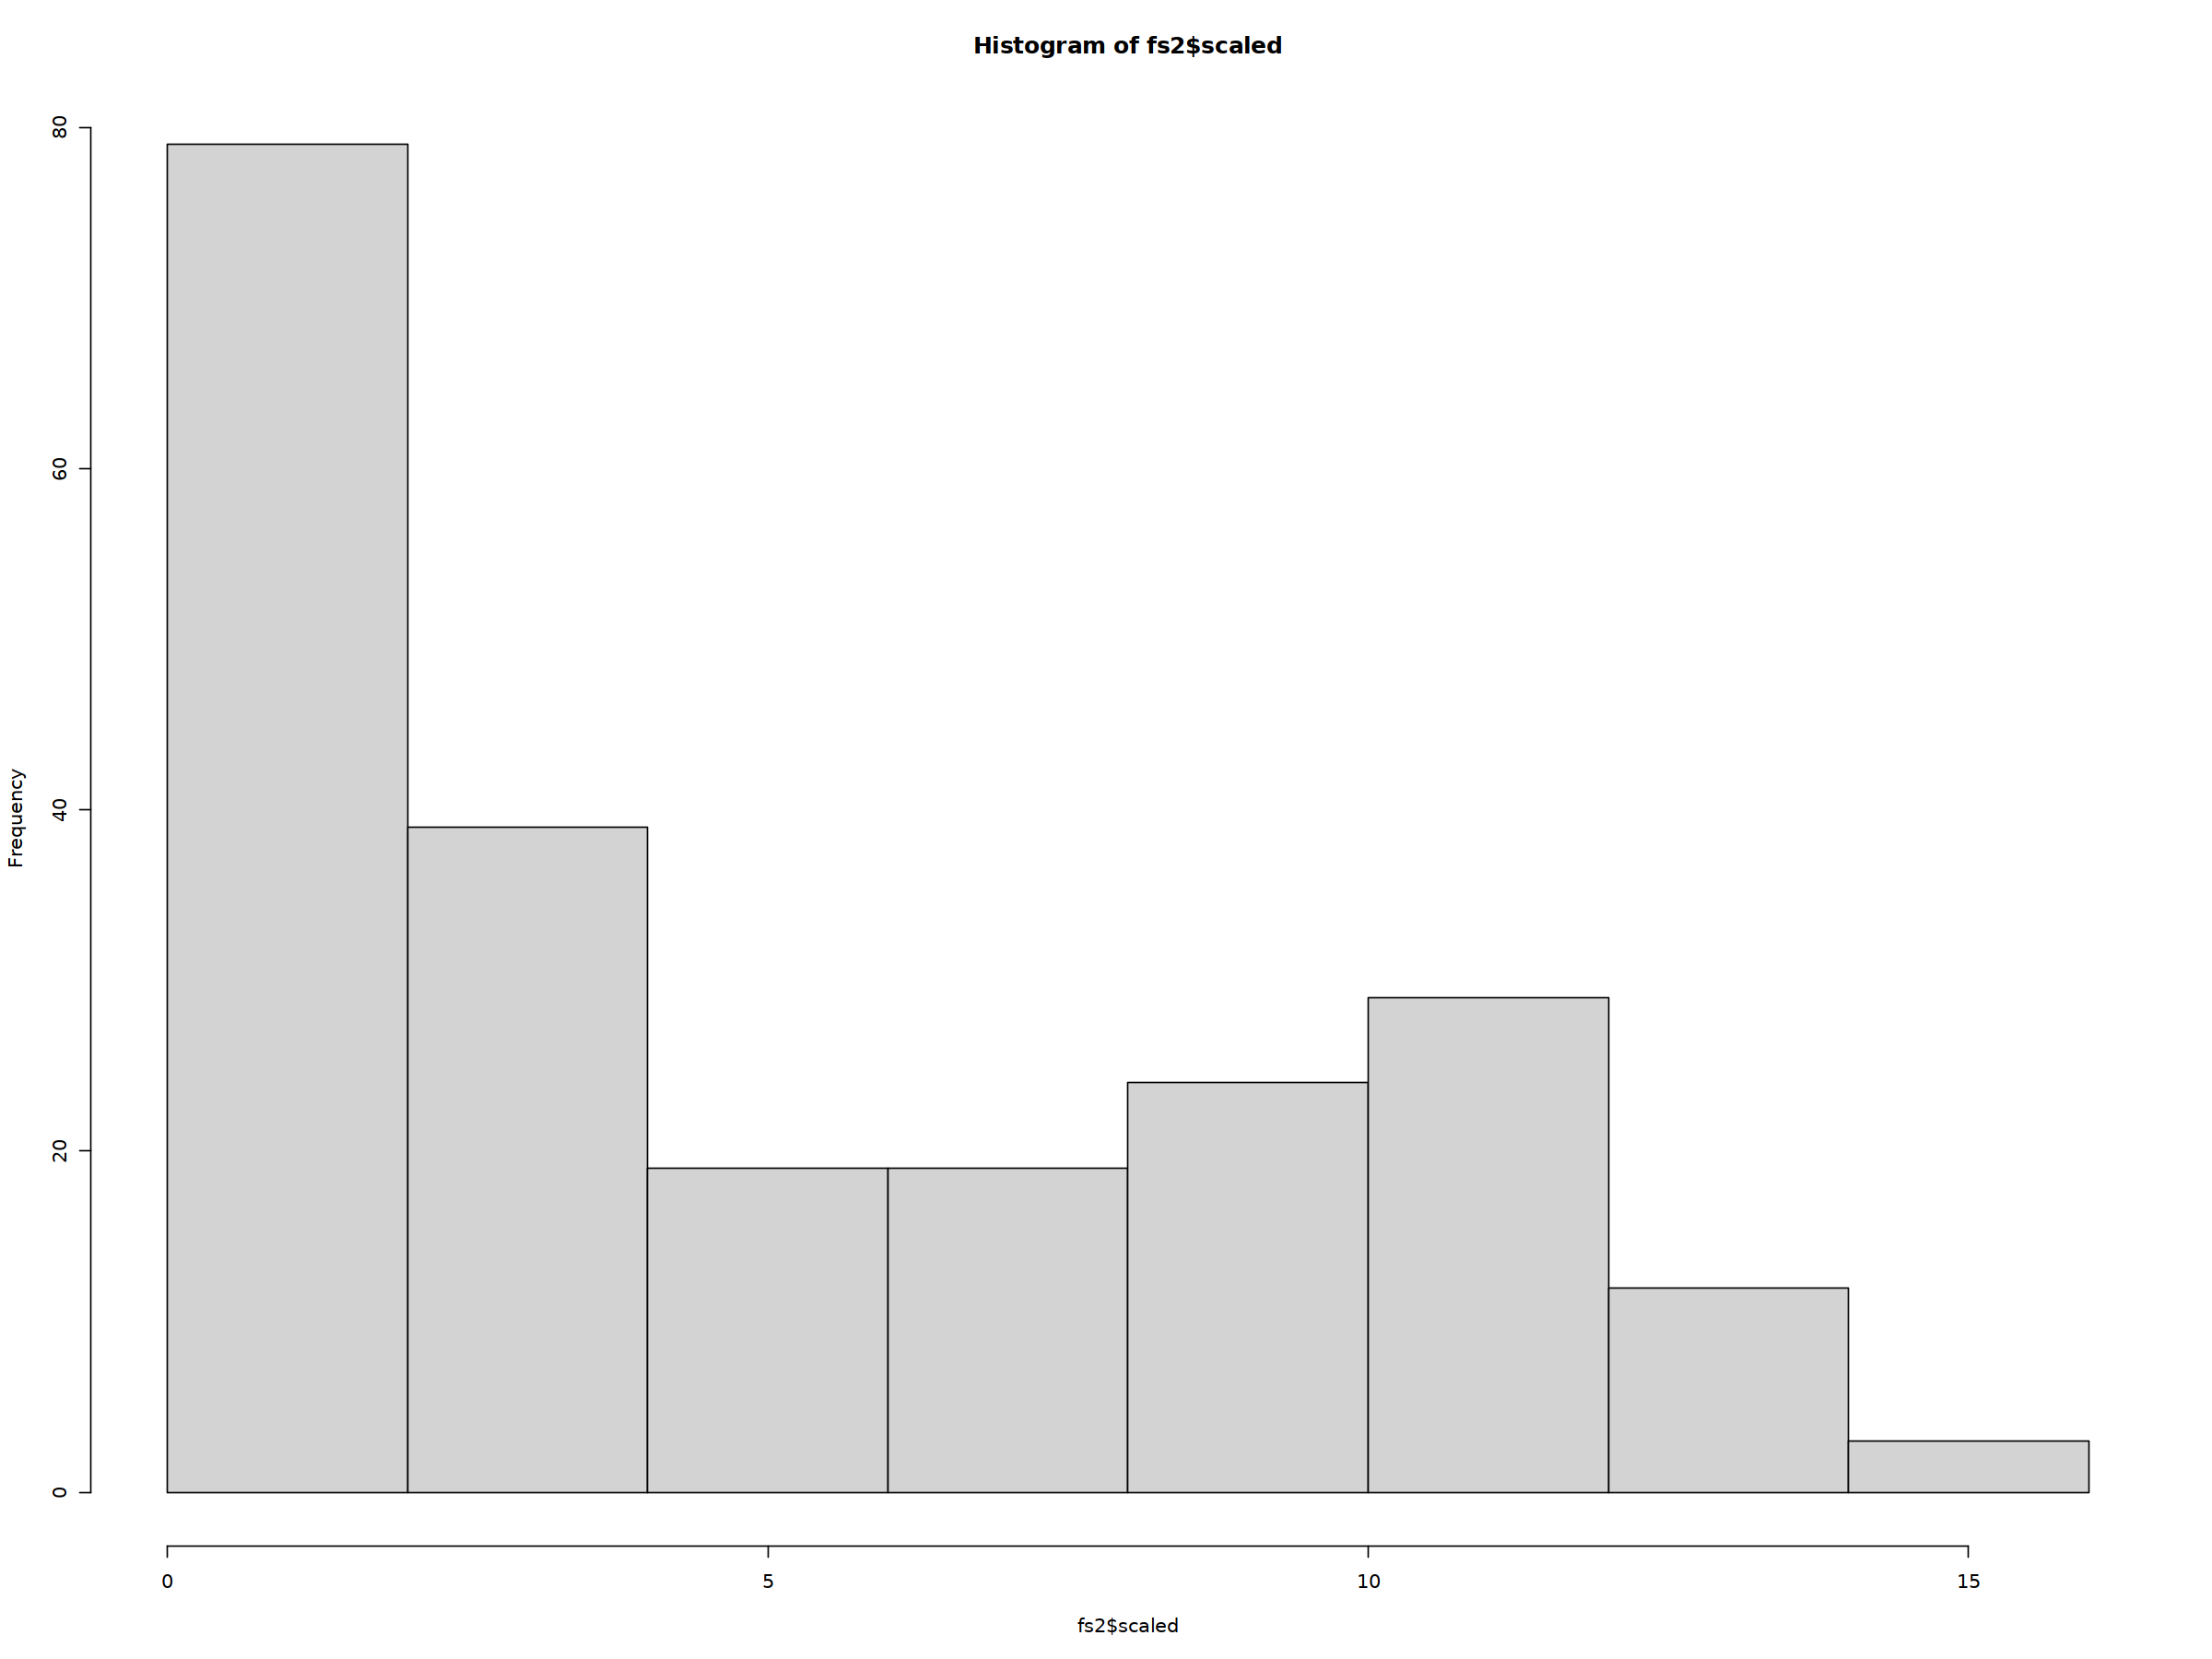

In [397]:
hist(fs2$scaled)

In [398]:
matrix_data <- fs2%>%
  pivot_wider(names_from = cell_type, values_from =scaled)


In [399]:
matrix_data%>%head(2)
matrix_data%>%dim()
matrix_data

pathway                                            c_dc2    cd8_naive
1 REACTOME_TRANSLATION                               14.87515 14.61642 
2 REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES 13.13426 11.81186 
  cd16_mono nk       cd4_tem  gd_t     treg_memory p_dc     b_memory  cd4_naive
1 14.535970 13.79123 13.72846 13.45578 12.67883    12.05029 11.385421 11.176720
2  9.059086 11.83622 11.31315 12.51823 10.81830    11.07065  9.292469  6.404776
  cd8_tem   treg_naive b_naive   mait      b_intermediate cd14_mono cd4_tcm 
1 10.930284 10.92594   10.746553 10.513151 9.689212       7.460877  3.993223
2  9.736827 10.14451    9.812182  8.504172 6.529755       7.665853  3.583392

[1] 31 18

pathway                                                              
1  REACTOME_TRANSLATION                                                 
2  REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                   
3  REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY           
4  REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                 
5  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE 
6  REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT
7  KEGG_OXIDATIVE_PHOSPHORYLATION                                       
8  REACTOME_ANTIMICROBIAL_PEPTIDES                                      
9  REACTOME_NEUTROPHIL_DEGRANULATION                                    
10 WP_EGFEGFR_SIGNALING_PATHWAY                                         
11 REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT                                
12 NABA_MATRISOME_ASSOCIATED                                            
13 NABA_MATRISOME                                                       
14 WP_PREIMPLANTATION_EMBRYO                                            
15 WP_MALE_INFERTILITY                                                  
16 REACTOME_METALLOTHIONEINS_BIND_METALS                                
17 REACTOME_RESPONSE_TO_METAL_IONS                                      
18 REACTOME_CHROMATIN_MODIFYING_ENZYMES                                 
19 WP_PHOTODYNAMIC_THERAPYINDUCED_UNFOLDED_PROTEIN_RESPONSE             
20 KEGG_WNT_SIGNALING_PATHWAY                                           
21 WP_CIRCADIAN_RHYTHM_GENES                                            
22 BIOCARTA_HIVNEF_PATHWAY                                              
23 WP_INSULIN_SIGNALING                                                 
24 REACTOME_REGULATION_OF_PTEN_GENE_TRANSCRIPTION                       
25 REACTOME_INTERFERON_GAMMA_SIGNALING                                  
26 PID_REG_GR_PATHWAY                                                   
27 WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY                 
28 WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY                            
29 PID_AR_TF_PATHWAY                                                    
30 WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING                     
31 WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION                            
   c_dc2     cd8_naive cd16_mono nk        cd4_tem   gd_t      treg_memory
1  14.875148 14.616424 14.535970 13.791228 13.728456 13.455780 12.678825  
2  13.134257 11.811858  9.059086 11.836221 11.313147 12.518231 10.818298  
3  13.134257 10.917229 10.228096 11.347002  9.966450 12.541781  9.834074  
4  12.689051 11.777654 10.898910 11.778967 11.313147 12.518231 10.359237  
5  12.689051 11.478745 11.290149 10.833080 11.092572 11.811189 10.438958  
6   6.405644  6.927645  3.681408  6.761350  6.243843  5.875668  5.807481  
7   5.422811  6.178205  3.164906  5.197646  5.829783  5.477002  5.305688  
8         NA        NA        NA        NA        NA        NA  1.339895  
9         NA        NA        NA        NA        NA        NA        NA  
10  2.210853  2.027468  2.589571  2.255300  2.700869  2.109602  1.876948  
11  1.873056  1.958739  2.611510  2.208865  1.758962  2.009633  1.698784  
12        NA        NA        NA        NA        NA        NA        NA  
13        NA        NA        NA        NA        NA        NA        NA  
14  1.604226  1.437978  1.758606  1.379811  1.353690  1.649322  1.552837  
15  1.939963  1.709889  1.507190  1.928555  1.621151  1.436680  1.690051  
16  1.844350  1.414699  1.642317  1.571061  1.779998  1.426607  1.457198  
17        NA        NA        NA        NA        NA        NA        NA  
18  1.354013        NA        NA  1.430874  1.317448  1.367695  1.698784  
19        NA        NA        NA        NA        NA        NA        NA  
20        NA        NA        NA        NA        NA        NA        NA  
21        NA        NA        NA        NA        NA        NA        NA  
22        NA     

In [402]:
matrix_data[is.na(matrix_data)] =-1

In [403]:
md2 =as.matrix(matrix_data)
rownames(md2)
colnames(md2)


NULL

[1] "pathway"        "c_dc2"          "cd8_naive"      "cd16_mono"     
 [5] "nk"             "cd4_tem"        "gd_t"           "treg_memory"   
 [9] "p_dc"           "b_memory"       "cd4_naive"      "cd8_tem"       
[13] "treg_naive"     "b_naive"        "mait"           "b_intermediate"
[17] "cd14_mono"      "cd4_tcm"

In [404]:
pathway_names <- md2[, 1]
rownames(md2) <- pathway_names
md2 <- md2[, -1]


In [405]:
md2%>%head()
md2%>%class()
md2%>%tail()

c_dc2    
REACTOME_TRANSLATION                                                  14.875148
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                    13.134257
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY            13.134257
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  12.689051
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  12.689051
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  6.405644
                                                                      cd8_naive
REACTOME_TRANSLATION                                                  14.616424
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                    11.811858
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY            10.917229
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  11.777654
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  11.478745
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  6.927645
                                                                      cd16_mono
REACTOME_TRANSLATION                                                  14.535970
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                     9.059086
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY            10.228096
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  10.898910
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  11.290149
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  3.681408
                                                                      nk       
REACTOME_TRANSLATION                                                  13.791228
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                    11.836221
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY            11.347002
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  11.778967
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  10.833080
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  6.761350
                                                                      cd4_tem  
REACTOME_TRANSLATION                                                  13.728456
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                    11.313147
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY             9.966450
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  11.313147
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  11.092572
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  6.243843
                                                                      gd_t     
REACTOME_TRANSLATION                                                  13.455780
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                    12.518231
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY            12.541781
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  12.518231
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  11.811189
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  5.875668
                                                                      treg_memory
REACTOME_TRANSLATION                                                  12.678825  
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                    10.818298  
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY             9.834074  
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  10.359237  
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  10.438958  
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  5.807481  
                                                                      p_dc     
REACTOME_TRANSLATION                                    

[1] "matrix" "array"

c_dc2     cd8_naive
PID_REG_GR_PATHWAY                                   -1.000000 -1.000000
WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY -1.000000 -1.000000
WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY            -1.000000  1.348886
PID_AR_TF_PATHWAY                                    -1.000000 -1.000000
WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING     -1.000000 -1.000000
WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION            -1.000000 -1.000000
                                                     cd16_mono nk       
PID_REG_GR_PATHWAY                                   -1.000000 -1.000000
WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY  1.349321 -1.000000
WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY            -1.000000 -1.000000
PID_AR_TF_PATHWAY                                    -1.000000 -1.000000
WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING     -1.000000 -1.000000
WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION            -1.000000 -1.000000
                                                     cd4_tem   gd_t     
PID_REG_GR_PATHWAY                                   -1.000000 -1.000000
WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY -1.000000 -1.000000
WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY            -1.000000 -1.000000
PID_AR_TF_PATHWAY                                    -1.000000 -1.000000
WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING     -1.000000 -1.000000
WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION            -1.000000 -1.000000
                                                     treg_memory p_dc     
PID_REG_GR_PATHWAY                                   -1.000000   -1.000000
WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY -1.000000   -1.000000
WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY            -1.000000   -1.000000
PID_AR_TF_PATHWAY                                    -1.000000   -1.000000
WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING      1.320400   -1.000000
WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION             1.320400   -1.000000
                                                     b_memory  cd4_naive
PID_REG_GR_PATHWAY                                   -1.000000  1.363925
WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY -1.000000 -1.000000
WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY            -1.000000 -1.000000
PID_AR_TF_PATHWAY                                    -1.000000 -1.000000
WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING     -1.000000 -1.000000
WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION            -1.000000 -1.000000
                                                     cd8_tem   treg_naive
PID_REG_GR_PATHWAY                                   -1.000000 -1.000000 
WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY -1.000000 -1.000000 
WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY            -1.000000 -1.000000 
PID_AR_TF_PATHWAY                                    -1.000000 -1.000000 
WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING     -1.000000 -1.000000 
WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION            -1.000000 -1.000000 
                                                     b_naive   mait     
PID_REG_GR_PATHWAY                                   -1.000000 -1.000000
WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY -1.000000 -1.000000
WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY            -1.000000 -1.000000
PID_AR_TF_PATHWAY                                    -1.000000 -1.000000
WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING     -1.000000 -1.000000
WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION            -1.000000 -1.000000
                                                     b_intermediate cd14_mono
PID_REG_GR_PATHWAY                                   -1.000000      -1.000000
WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY  1.332166      -1.000000
WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY            -1.000000      -1.000000
PID_AR_TF_PATHWAY                                     1.332166      -1.000000
WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING     -1.000000   

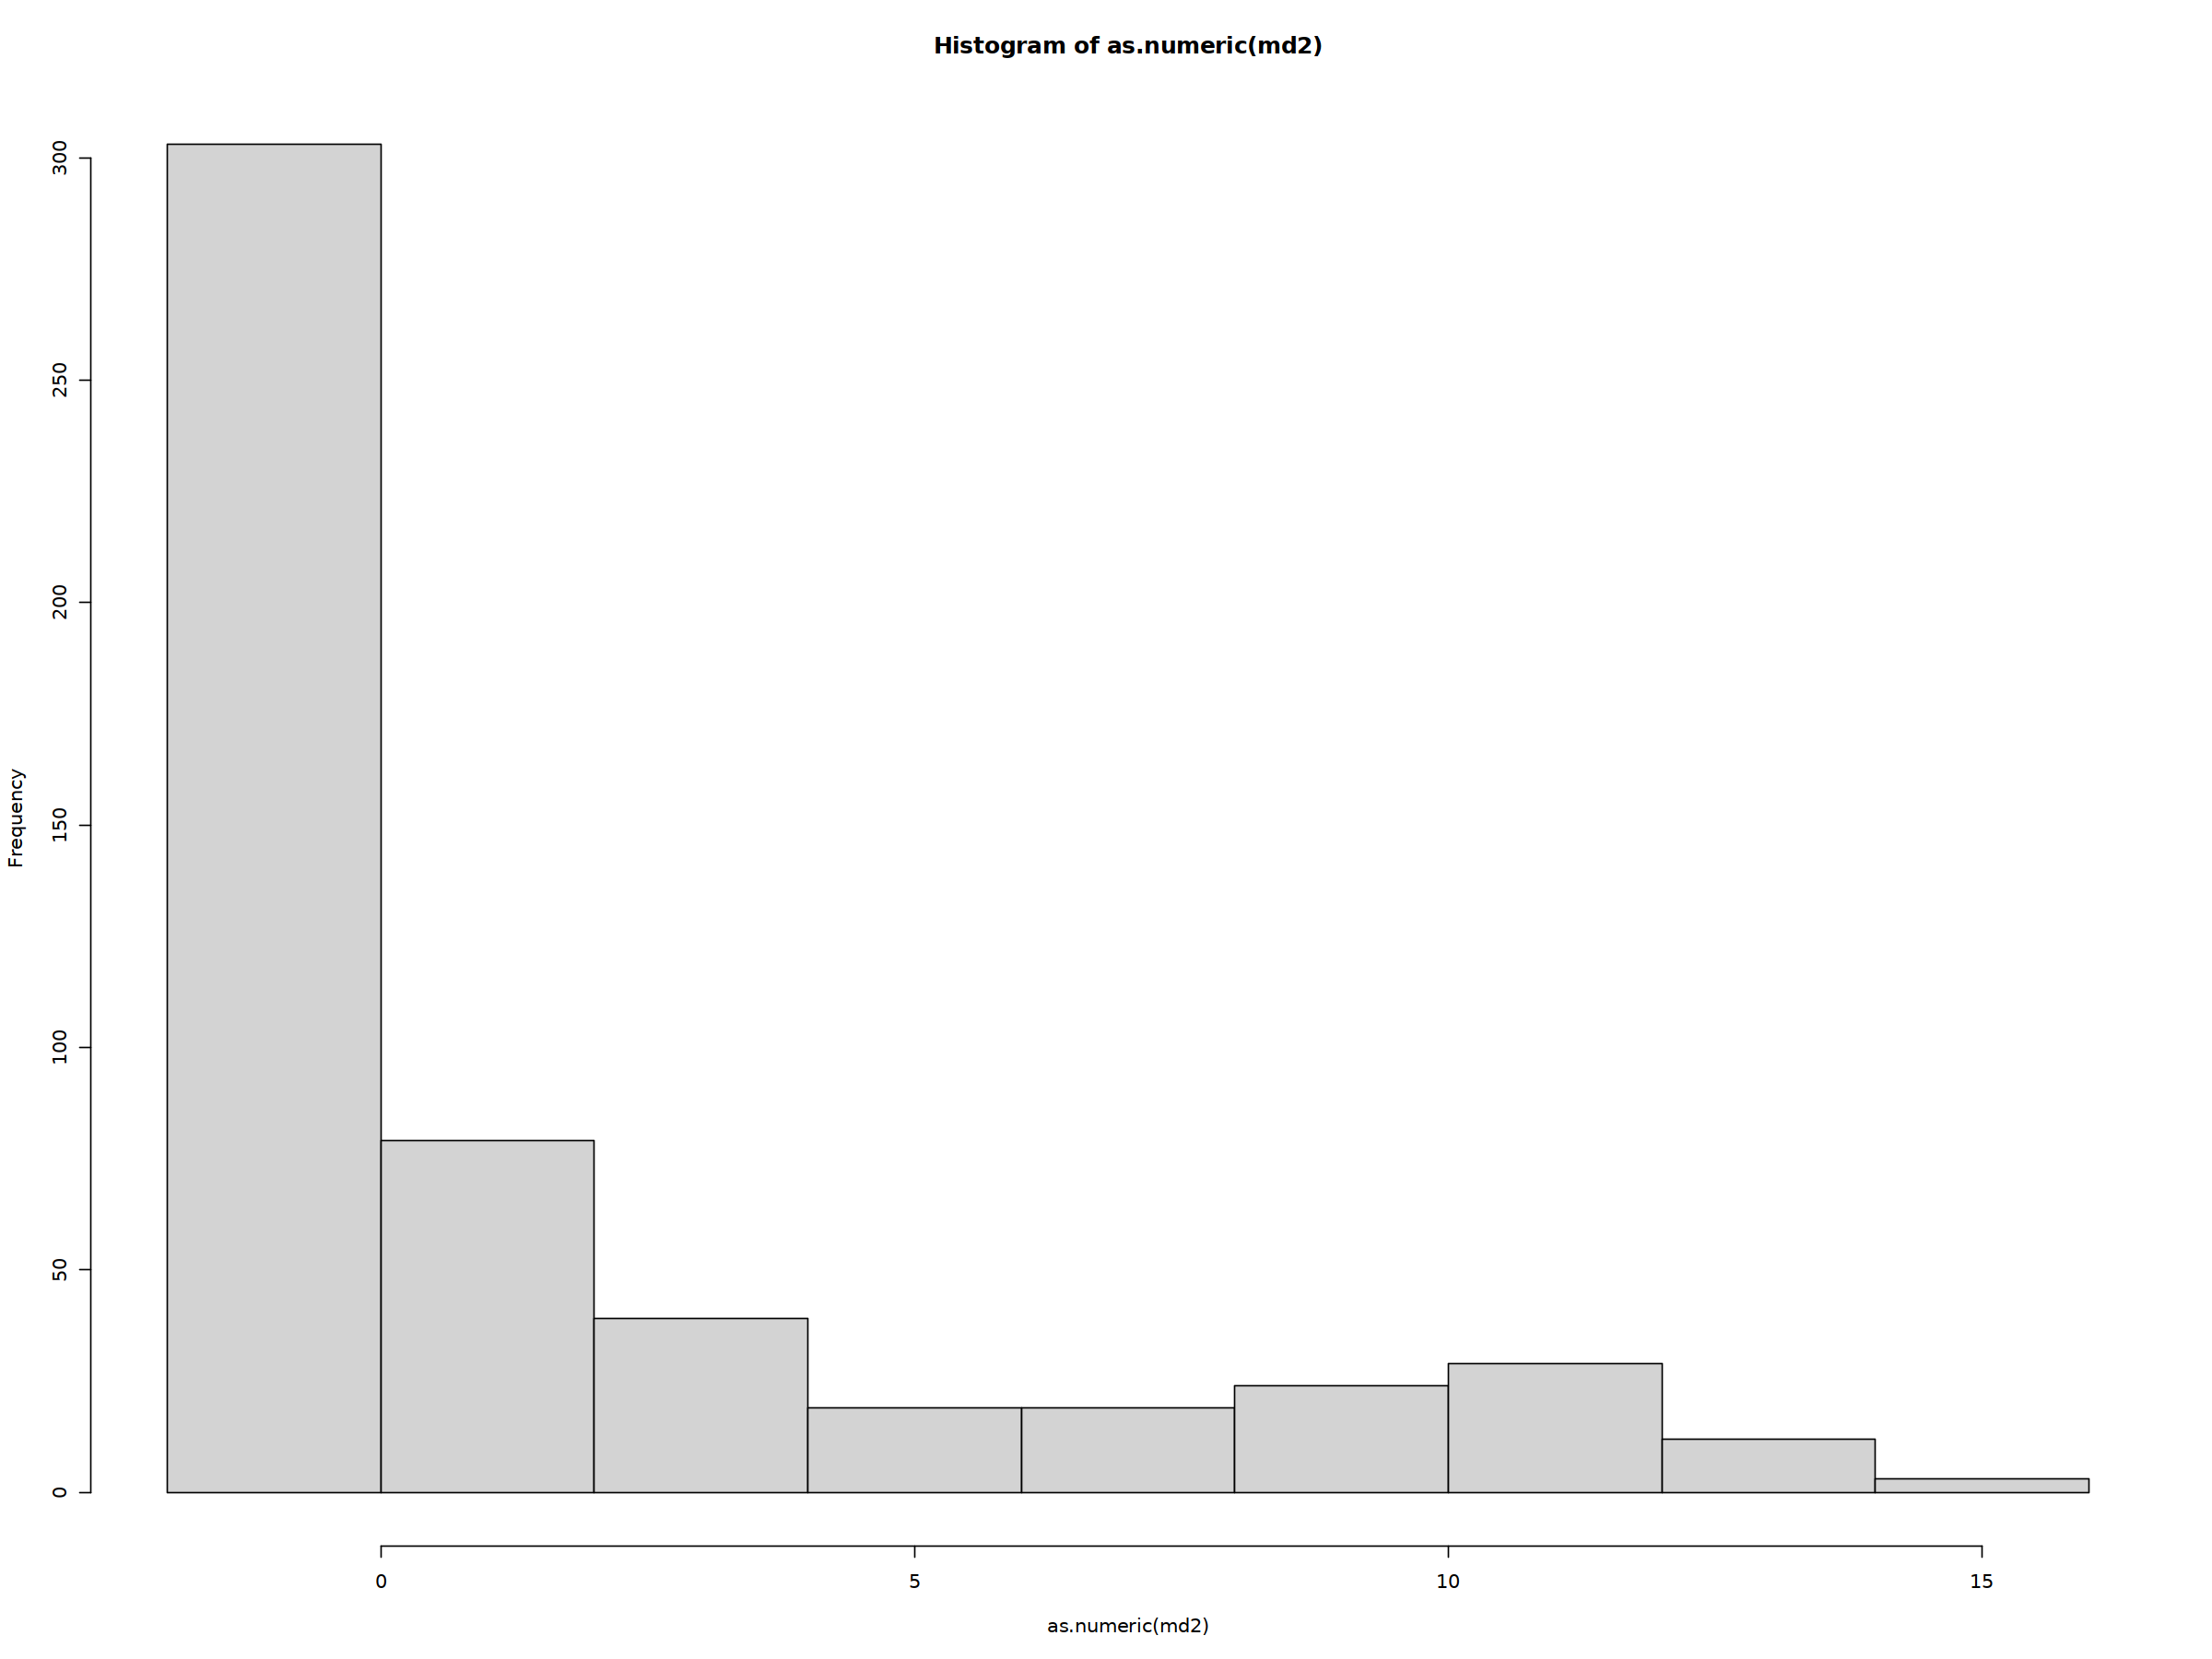

In [406]:
hist(as.numeric(md2))

In [407]:
md21 <- as.data.frame(md2)
i <- c(1:17)
i

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

In [408]:
md22 <- apply(md21[ , i], 2,            # Specify own function within apply
                    function(x) as.numeric(as.character(x)))

In [409]:
head(md22)

c_dc2     cd8_naive cd16_mono nk       cd4_tem   gd_t      treg_memory
[1,] 14.875148 14.616424 14.535970 13.79123 13.728456 13.455780 12.678825  
[2,] 13.134257 11.811858  9.059086 11.83622 11.313147 12.518231 10.818298  
[3,] 13.134257 10.917229 10.228096 11.34700  9.966450 12.541781  9.834074  
[4,] 12.689051 11.777654 10.898910 11.77897 11.313147 12.518231 10.359237  
[5,] 12.689051 11.478745 11.290149 10.83308 11.092572 11.811189 10.438958  
[6,]  6.405644  6.927645  3.681408  6.76135  6.243843  5.875668  5.807481  
     p_dc      b_memory  cd4_naive cd8_tem   treg_naive b_naive   mait     
[1,] 12.050291 11.385421 11.176720 10.930284 10.925940  10.746553 10.513151
[2,] 11.070648  9.292469  6.404776  9.736827 10.144507   9.812182  8.504172
[3,]  9.915276  9.360298  7.490752  8.361550  8.173106   8.147435  8.362059
[4,] 10.752020 10.108200  7.913758  9.736827  9.953730   9.812182  9.348211
[5,] 10.370200  9.602369  8.814277  9.265346  8.798444   9.155100  8.851502
[6,]  6.160970  5.958077  2.237217  5.811129  6.335990   5.666245  4.889863
     b_intermediate cd14_mono cd4_tcm 
[1,] 9.689212       7.460877  3.993223
[2,] 6.529755       7.665853  3.583392
[3,] 6.452997       7.805449  2.670877
[4,] 7.524920       7.805449  3.583392
[5,] 7.524920       7.599420  2.792353
[6,] 4.666942       3.050873  3.583392

In [410]:
rownames(md2)
rownames(md22) <- rownames(md2)
head(md22)

[1] "REACTOME_TRANSLATION"                                                 
 [2] "REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES"                   
 [3] "REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY"           
 [4] "REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS"                 
 [5] "REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE" 
 [6] "REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT"
 [7] "KEGG_OXIDATIVE_PHOSPHORYLATION"                                       
 [8] "REACTOME_ANTIMICROBIAL_PEPTIDES"                                      
 [9] "REACTOME_NEUTROPHIL_DEGRANULATION"                                    
[10] "WP_EGFEGFR_SIGNALING_PATHWAY"                                         
[11] "REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT"                                
[12] "NABA_MATRISOME_ASSOCIATED"                                            
[13] "NABA_MATRISOME"                                                       
[14] "WP_PREIMPLANTATION_EMBRYO"                                            
[15] "WP_MALE_INFERTILITY"                                                  
[16] "REACTOME_METALLOTHIONEINS_BIND_METALS"                                
[17] "REACTOME_RESPONSE_TO_METAL_IONS"                                      
[18] "REACTOME_CHROMATIN_MODIFYING_ENZYMES"                                 
[19] "WP_PHOTODYNAMIC_THERAPYINDUCED_UNFOLDED_PROTEIN_RESPONSE"             
[20] "KEGG_WNT_SIGNALING_PATHWAY"                                           
[21] "WP_CIRCADIAN_RHYTHM_GENES"                                            
[22] "BIOCARTA_HIVNEF_PATHWAY"                                              
[23] "WP_INSULIN_SIGNALING"                                                 
[24] "REACTOME_REGULATION_OF_PTEN_GENE_TRANSCRIPTION"                       
[25] "REACTOME_INTERFERON_GAMMA_SIGNALING"                                  
[26] "PID_REG_GR_PATHWAY"                                                   
[27] "WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY"                 
[28] "WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY"                            
[29] "PID_AR_TF_PATHWAY"                                                    
[30] "WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING"                     
[31] "WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION"

c_dc2    
REACTOME_TRANSLATION                                                  14.875148
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                    13.134257
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY            13.134257
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  12.689051
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  12.689051
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  6.405644
                                                                      cd8_naive
REACTOME_TRANSLATION                                                  14.616424
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                    11.811858
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY            10.917229
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  11.777654
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  11.478745
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  6.927645
                                                                      cd16_mono
REACTOME_TRANSLATION                                                  14.535970
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                     9.059086
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY            10.228096
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  10.898910
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  11.290149
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  3.681408
                                                                      nk      
REACTOME_TRANSLATION                                                  13.79123
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                    11.83622
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY            11.34700
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  11.77897
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  10.83308
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  6.76135
                                                                      cd4_tem  
REACTOME_TRANSLATION                                                  13.728456
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                    11.313147
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY             9.966450
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  11.313147
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  11.092572
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  6.243843
                                                                      gd_t     
REACTOME_TRANSLATION                                                  13.455780
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                    12.518231
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY            12.541781
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  12.518231
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  11.811189
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  5.875668
                                                                      treg_memory
REACTOME_TRANSLATION                                                  12.678825  
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                    10.818298  
REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY             9.834074  
REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                  10.359237  
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE  10.438958  
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT  5.807481  
                                                                      p_dc     
REACTOME_TRANSLATION                                           

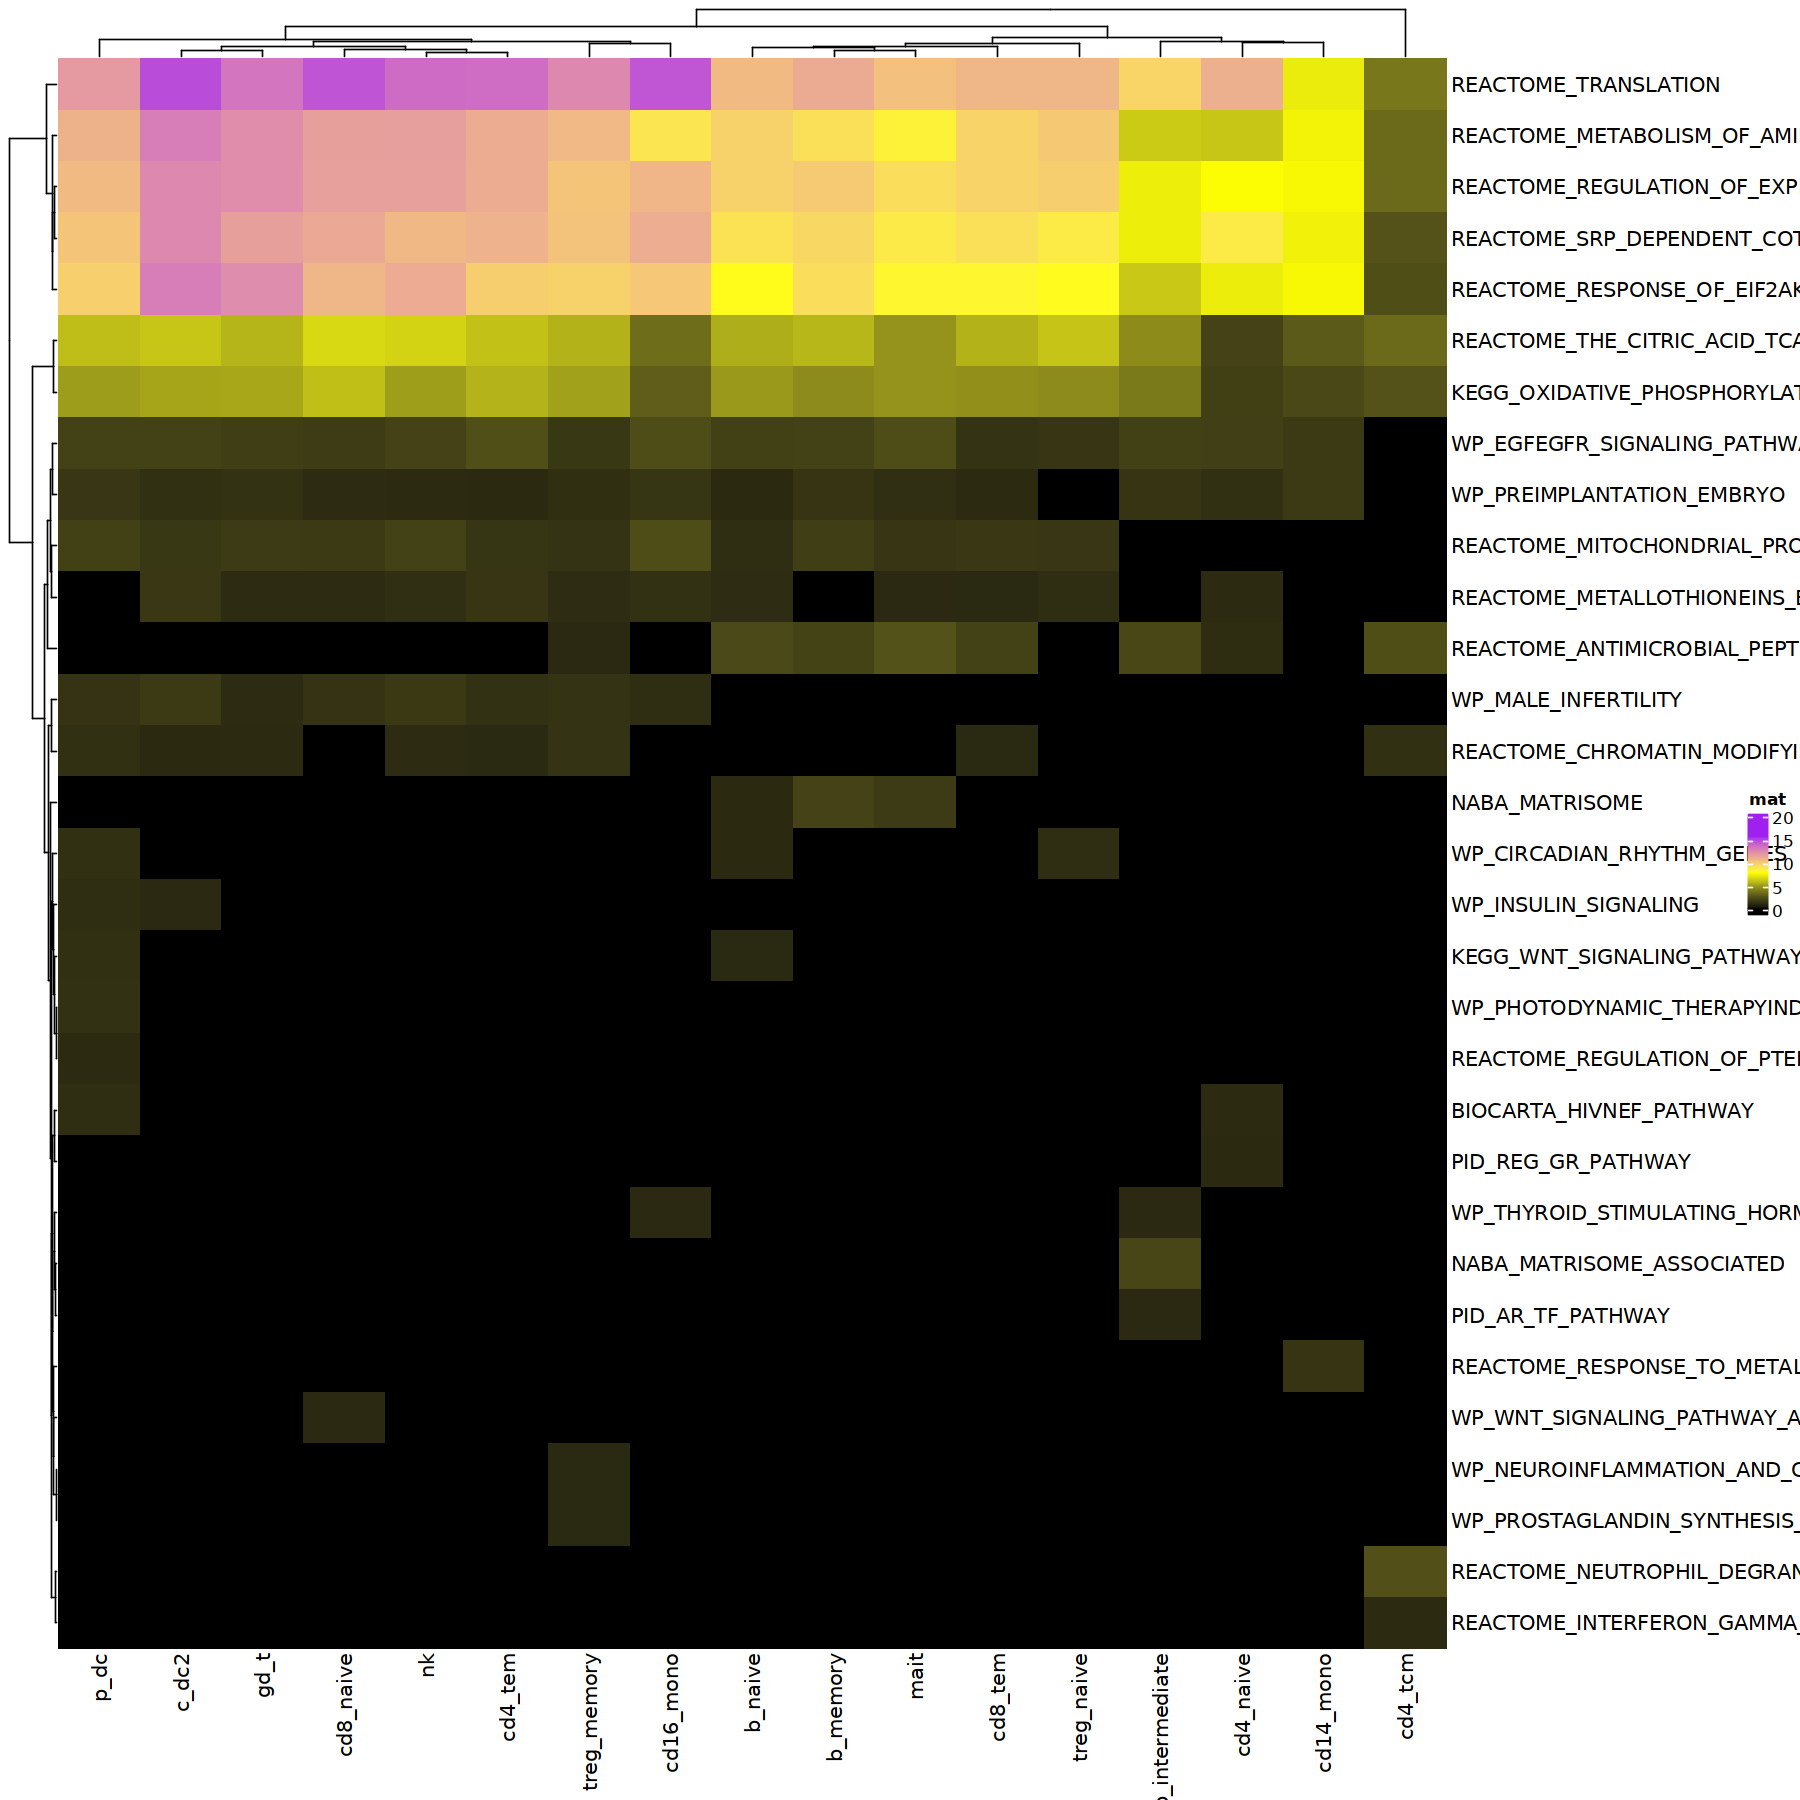

In [413]:
options(repr.plot.width = 15, repr.plot.height = 15)

Heatmap(md22,name = "mat",col = circlize::colorRamp2(c(0,8,16),
                                  c("black",
                                    "yellow","purple"
                                    )))

In [ ]:
###NES score

pathway              NES       cell_type
1 REACTOME_TRANSLATION -2.983504 c_dc2    
2 REACTOME_TRANSLATION -2.909549 cd8_naive
3 REACTOME_TRANSLATION -2.923388 cd16_mono
4 REACTOME_TRANSLATION -2.864029 nk       
5 REACTOME_TRANSLATION -2.819968 cd4_tem  
6 REACTOME_TRANSLATION -2.861932 gd_t

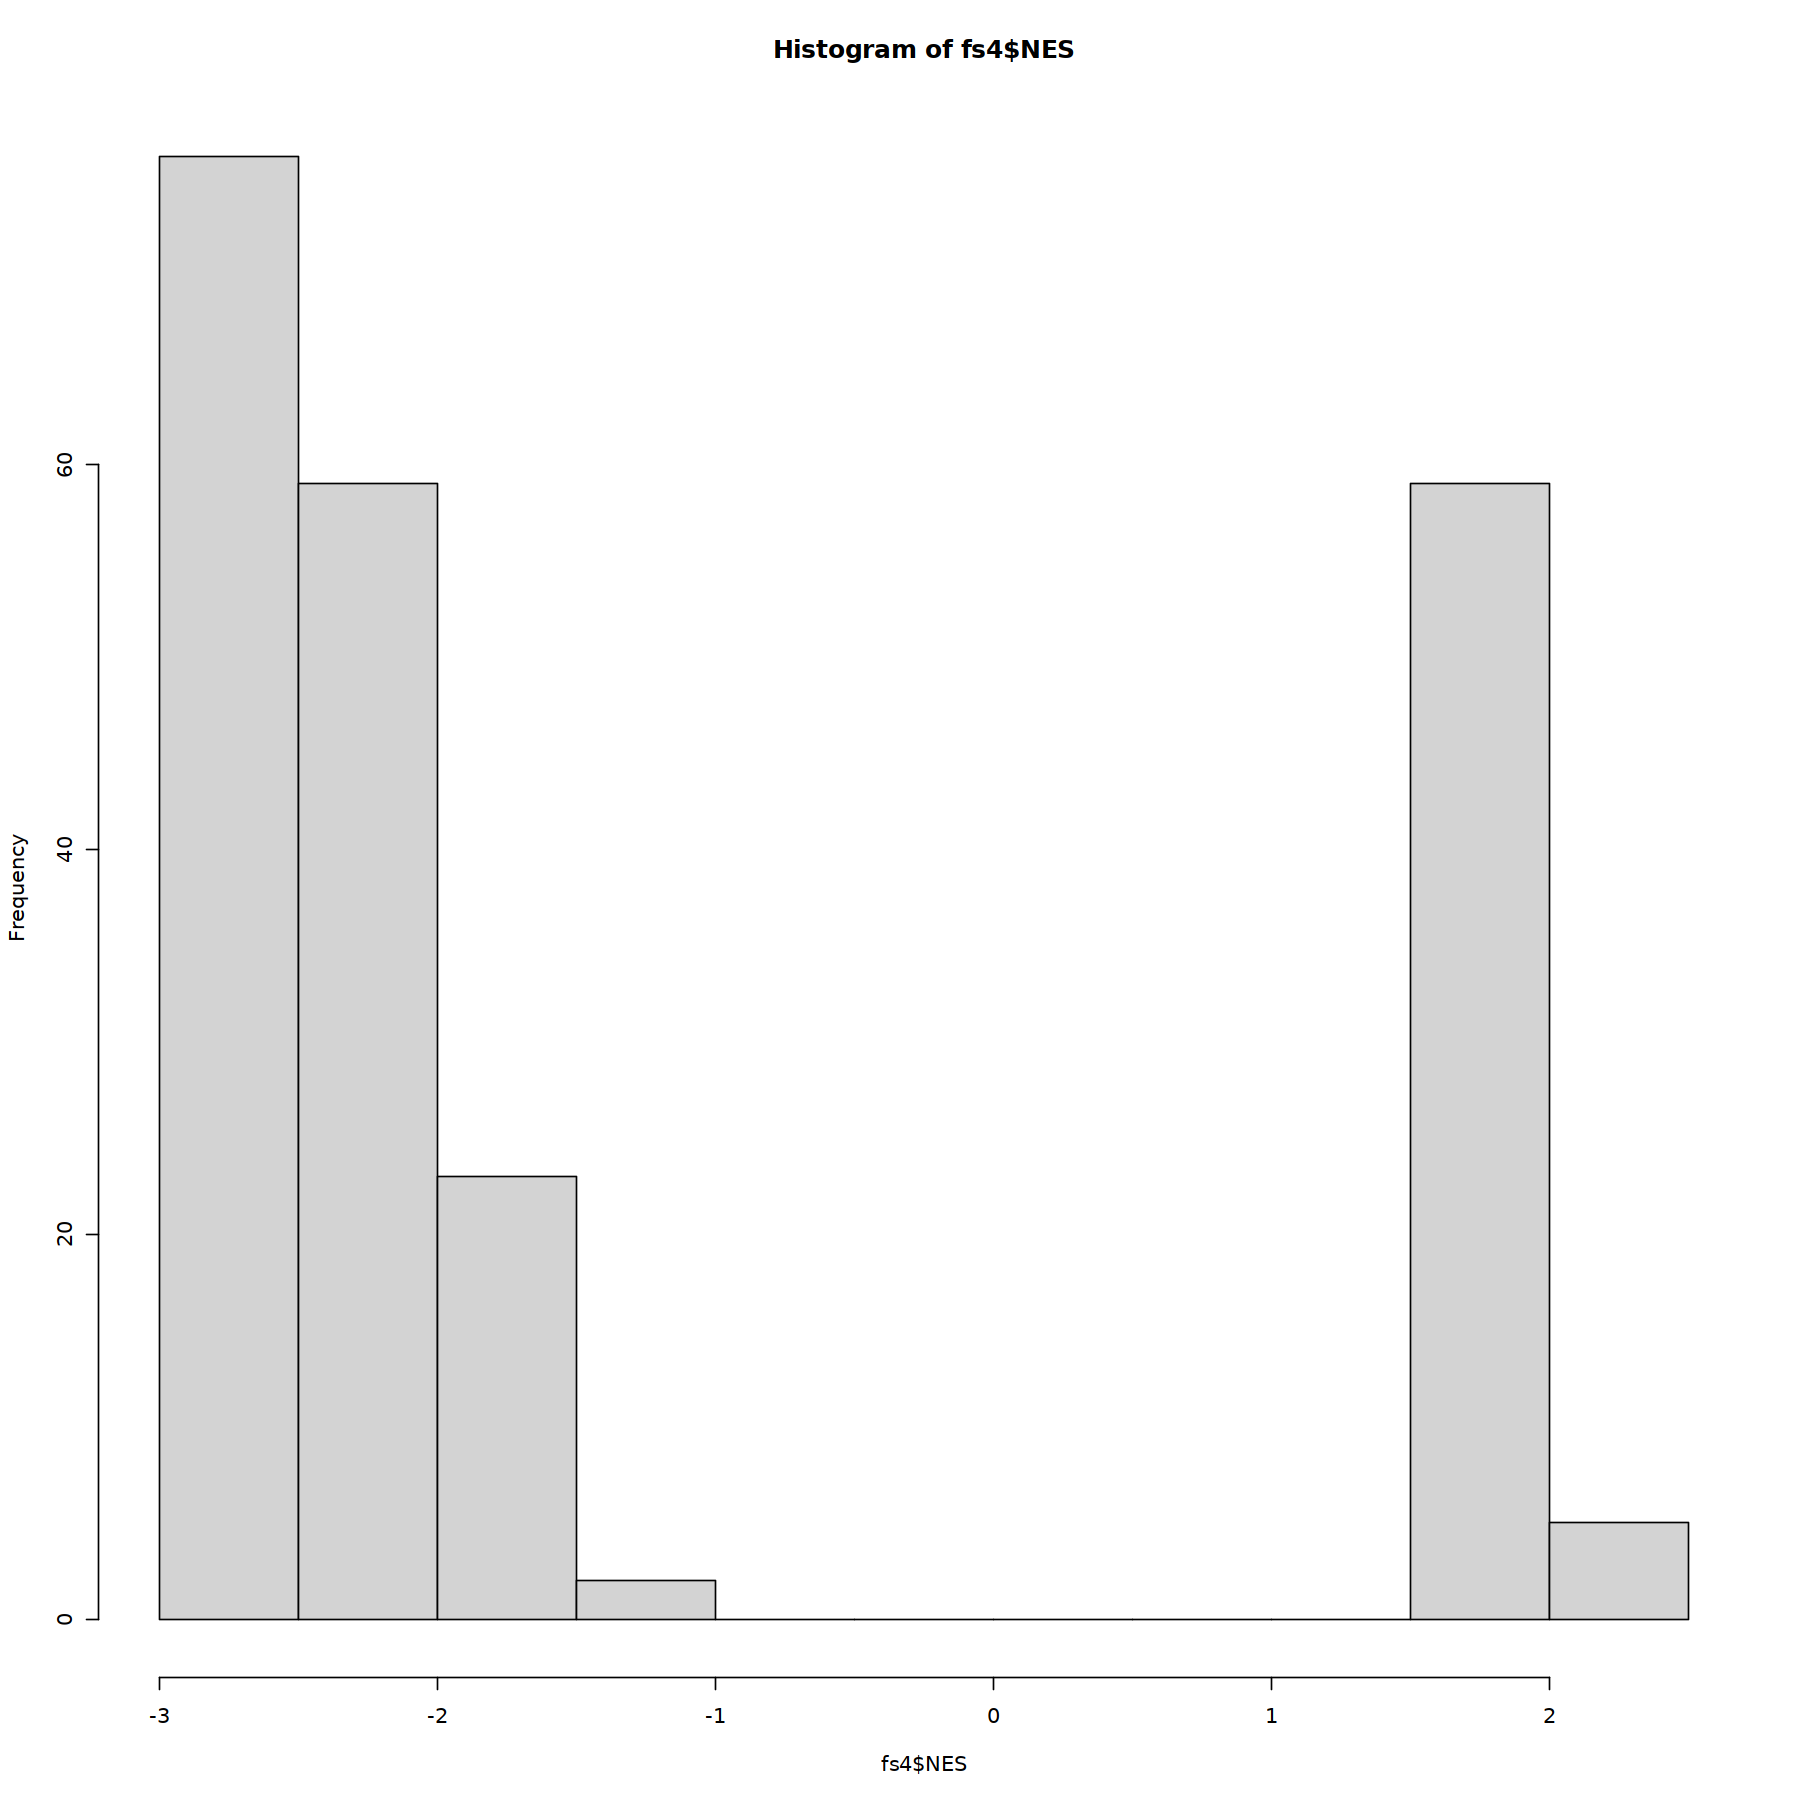

In [414]:
fs4=plotDF[,c("pathway","NES","cell_type")]
fs4%>%head()
hist(fs4$NES)

In [415]:
matrix_data4 <- fs4%>%
  pivot_wider(names_from = cell_type, values_from =NES)

In [416]:
matrix_data4%>%head()
matrix_data4%>%dim()
matrix_data4

pathway                                                              
1 REACTOME_TRANSLATION                                                 
2 REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                   
3 REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY           
4 REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                 
5 REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE 
6 REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT
  c_dc2     cd8_naive cd16_mono nk        cd4_tem   gd_t      treg_memory
1 -2.983504 -2.909549 -2.923388 -2.864029 -2.819968 -2.861932 -2.824515  
2 -2.963575 -2.824268 -2.615114 -2.789284 -2.749136 -2.803800 -2.806622  
3 -2.983263 -2.824008 -2.858182 -2.818411 -2.767615 -2.908731 -2.817418  
4 -2.917010 -2.833943 -2.842088 -2.821859 -2.771485 -2.842360 -2.817993  
5 -2.946655 -2.857407 -2.939366 -2.797361 -2.778846 -2.823091 -2.805280  
6 -2.474637 -2.464348 -2.134271 -2.398479 -2.402163 -2.389857 -2.450179  
  p_dc      b_memory  cd4_naive cd8_tem   treg_naive b_naive   mait     
1 -2.842896 -2.799234 -2.698314 -2.708697 -2.689893  -2.701875 -2.681684
2 -2.779492 -2.636961 -2.437682 -2.679429 -2.728657  -2.663143 -2.640477
3 -2.834835 -2.760767 -2.647438 -2.672163 -2.650889  -2.705154 -2.674484
4 -2.828971 -2.759836 -2.608864 -2.712634 -2.734218  -2.705438 -2.705751
5 -2.831045 -2.756630 -2.715552 -2.708971 -2.688030  -2.758812 -2.695205
6 -2.465951 -2.351077 -2.003134 -2.400122 -2.399995  -2.397307 -2.319728
  b_intermediate cd14_mono cd4_tcm  
1 -2.649946      -2.456423 -2.166842
2 -2.482184      -2.498261 -2.114998
3 -2.600012      -2.590742 -2.133900
4 -2.569130      -2.598934 -2.168997
5 -2.660110      -2.533800 -2.178625
6 -2.281043      -2.123431 -2.188710

[1] 31 18

pathway                                                              
1  REACTOME_TRANSLATION                                                 
2  REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES                   
3  REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY           
4  REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS                 
5  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE 
6  REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT
7  KEGG_OXIDATIVE_PHOSPHORYLATION                                       
8  REACTOME_ANTIMICROBIAL_PEPTIDES                                      
9  REACTOME_NEUTROPHIL_DEGRANULATION                                    
10 WP_EGFEGFR_SIGNALING_PATHWAY                                         
11 REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT                                
12 NABA_MATRISOME_ASSOCIATED                                            
13 NABA_MATRISOME                                                       
14 WP_PREIMPLANTATION_EMBRYO                                            
15 WP_MALE_INFERTILITY                                                  
16 REACTOME_METALLOTHIONEINS_BIND_METALS                                
17 REACTOME_RESPONSE_TO_METAL_IONS                                      
18 REACTOME_CHROMATIN_MODIFYING_ENZYMES                                 
19 WP_PHOTODYNAMIC_THERAPYINDUCED_UNFOLDED_PROTEIN_RESPONSE             
20 KEGG_WNT_SIGNALING_PATHWAY                                           
21 WP_CIRCADIAN_RHYTHM_GENES                                            
22 BIOCARTA_HIVNEF_PATHWAY                                              
23 WP_INSULIN_SIGNALING                                                 
24 REACTOME_REGULATION_OF_PTEN_GENE_TRANSCRIPTION                       
25 REACTOME_INTERFERON_GAMMA_SIGNALING                                  
26 PID_REG_GR_PATHWAY                                                   
27 WP_THYROID_STIMULATING_HORMONE_TSH_SIGNALING_PATHWAY                 
28 WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY                            
29 PID_AR_TF_PATHWAY                                                    
30 WP_NEUROINFLAMMATION_AND_GLUTAMATERGIC_SIGNALING                     
31 WP_PROSTAGLANDIN_SYNTHESIS_AND_REGULATION                            
   c_dc2     cd8_naive cd16_mono nk        cd4_tem   gd_t      treg_memory
1  -2.983504 -2.909549 -2.923388 -2.864029 -2.819968 -2.861932 -2.824515  
2  -2.963575 -2.824268 -2.615114 -2.789284 -2.749136 -2.803800 -2.806622  
3  -2.983263 -2.824008 -2.858182 -2.818411 -2.767615 -2.908731 -2.817418  
4  -2.917010 -2.833943 -2.842088 -2.821859 -2.771485 -2.842360 -2.817993  
5  -2.946655 -2.857407 -2.939366 -2.797361 -2.778846 -2.823091 -2.805280  
6  -2.474637 -2.464348 -2.134271 -2.398479 -2.402163 -2.389857 -2.450179  
7  -2.466456 -2.443246 -2.141200 -2.365974 -2.396952 -2.360954 -2.391747  
8         NA        NA        NA        NA        NA        NA -1.754027  
9         NA        NA        NA        NA        NA        NA        NA  
10  1.986854  1.969084  2.023617  1.997178  2.043911  1.979859  1.940635  
11 -2.160044 -2.078661 -2.238903 -2.138893 -2.121504 -2.114808 -2.052018  
12        NA        NA        NA        NA        NA        NA        NA  
13        NA        NA        NA        NA        NA        NA        NA  
14  1.809996  1.808361  1.842413  1.832914  1.834586  1.857234  1.817549  
15  1.899071  1.921717  1.851543  1.947759  1.921263  1.907628  1.931735  
16 -1.515600 -1.508976 -1.508522 -1.512047 -1.505166 -1.522216 -1.488262  
17        NA        NA        NA        NA        NA        NA        NA  
18  1.791157        NA        NA  1.814857  1.821282  1.790485  1.825160  
19        NA        NA        NA        NA        NA        NA        NA  
20        NA        NA        NA        NA        NA        NA        NA  
21        NA        NA        NA        NA        NA        NA        NA  
22        NA     

In [417]:
matrix_data4[is.na(matrix_data4)] <- 0

In [418]:
md4 =as.matrix(matrix_data4)
rownames(md4)
colnames(md4)


NULL

[1] "pathway"        "c_dc2"          "cd8_naive"      "cd16_mono"     
 [5] "nk"             "cd4_tem"        "gd_t"           "treg_memory"   
 [9] "p_dc"           "b_memory"       "cd4_naive"      "cd8_tem"       
[13] "treg_naive"     "b_naive"        "mait"           "b_intermediate"
[17] "cd14_mono"      "cd4_tcm"

In [419]:
pathway_names <- md4[, 1]
rownames(md4) <- pathway_names
md4 <- md4[, -1]
#md4[is.na(md4)] <- 0

In [420]:
md4%>%head(2)

c_dc2     cd8_naive
REACTOME_TRANSLATION                               -2.983504 -2.909549
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES -2.963575 -2.824268
                                                   cd16_mono nk       
REACTOME_TRANSLATION                               -2.923388 -2.864029
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES -2.615114 -2.789284
                                                   cd4_tem   gd_t     
REACTOME_TRANSLATION                               -2.819968 -2.861932
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES -2.749136 -2.803800
                                                   treg_memory p_dc     
REACTOME_TRANSLATION                               -2.824515   -2.842896
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES -2.806622   -2.779492
                                                   b_memory  cd4_naive
REACTOME_TRANSLATION                               -2.799234 -2.698314
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES -2.636961 -2.437682
                                                   cd8_tem   treg_naive
REACTOME_TRANSLATION                               -2.708697 -2.689893 
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES -2.679429 -2.728657 
                                                   b_naive   mait     
REACTOME_TRANSLATION                               -2.701875 -2.681684
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES -2.663143 -2.640477
                                                   b_intermediate cd14_mono
REACTOME_TRANSLATION                               -2.649946      -2.456423
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES -2.482184      -2.498261
                                                   cd4_tcm  
REACTOME_TRANSLATION                               -2.166842
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES -2.114998

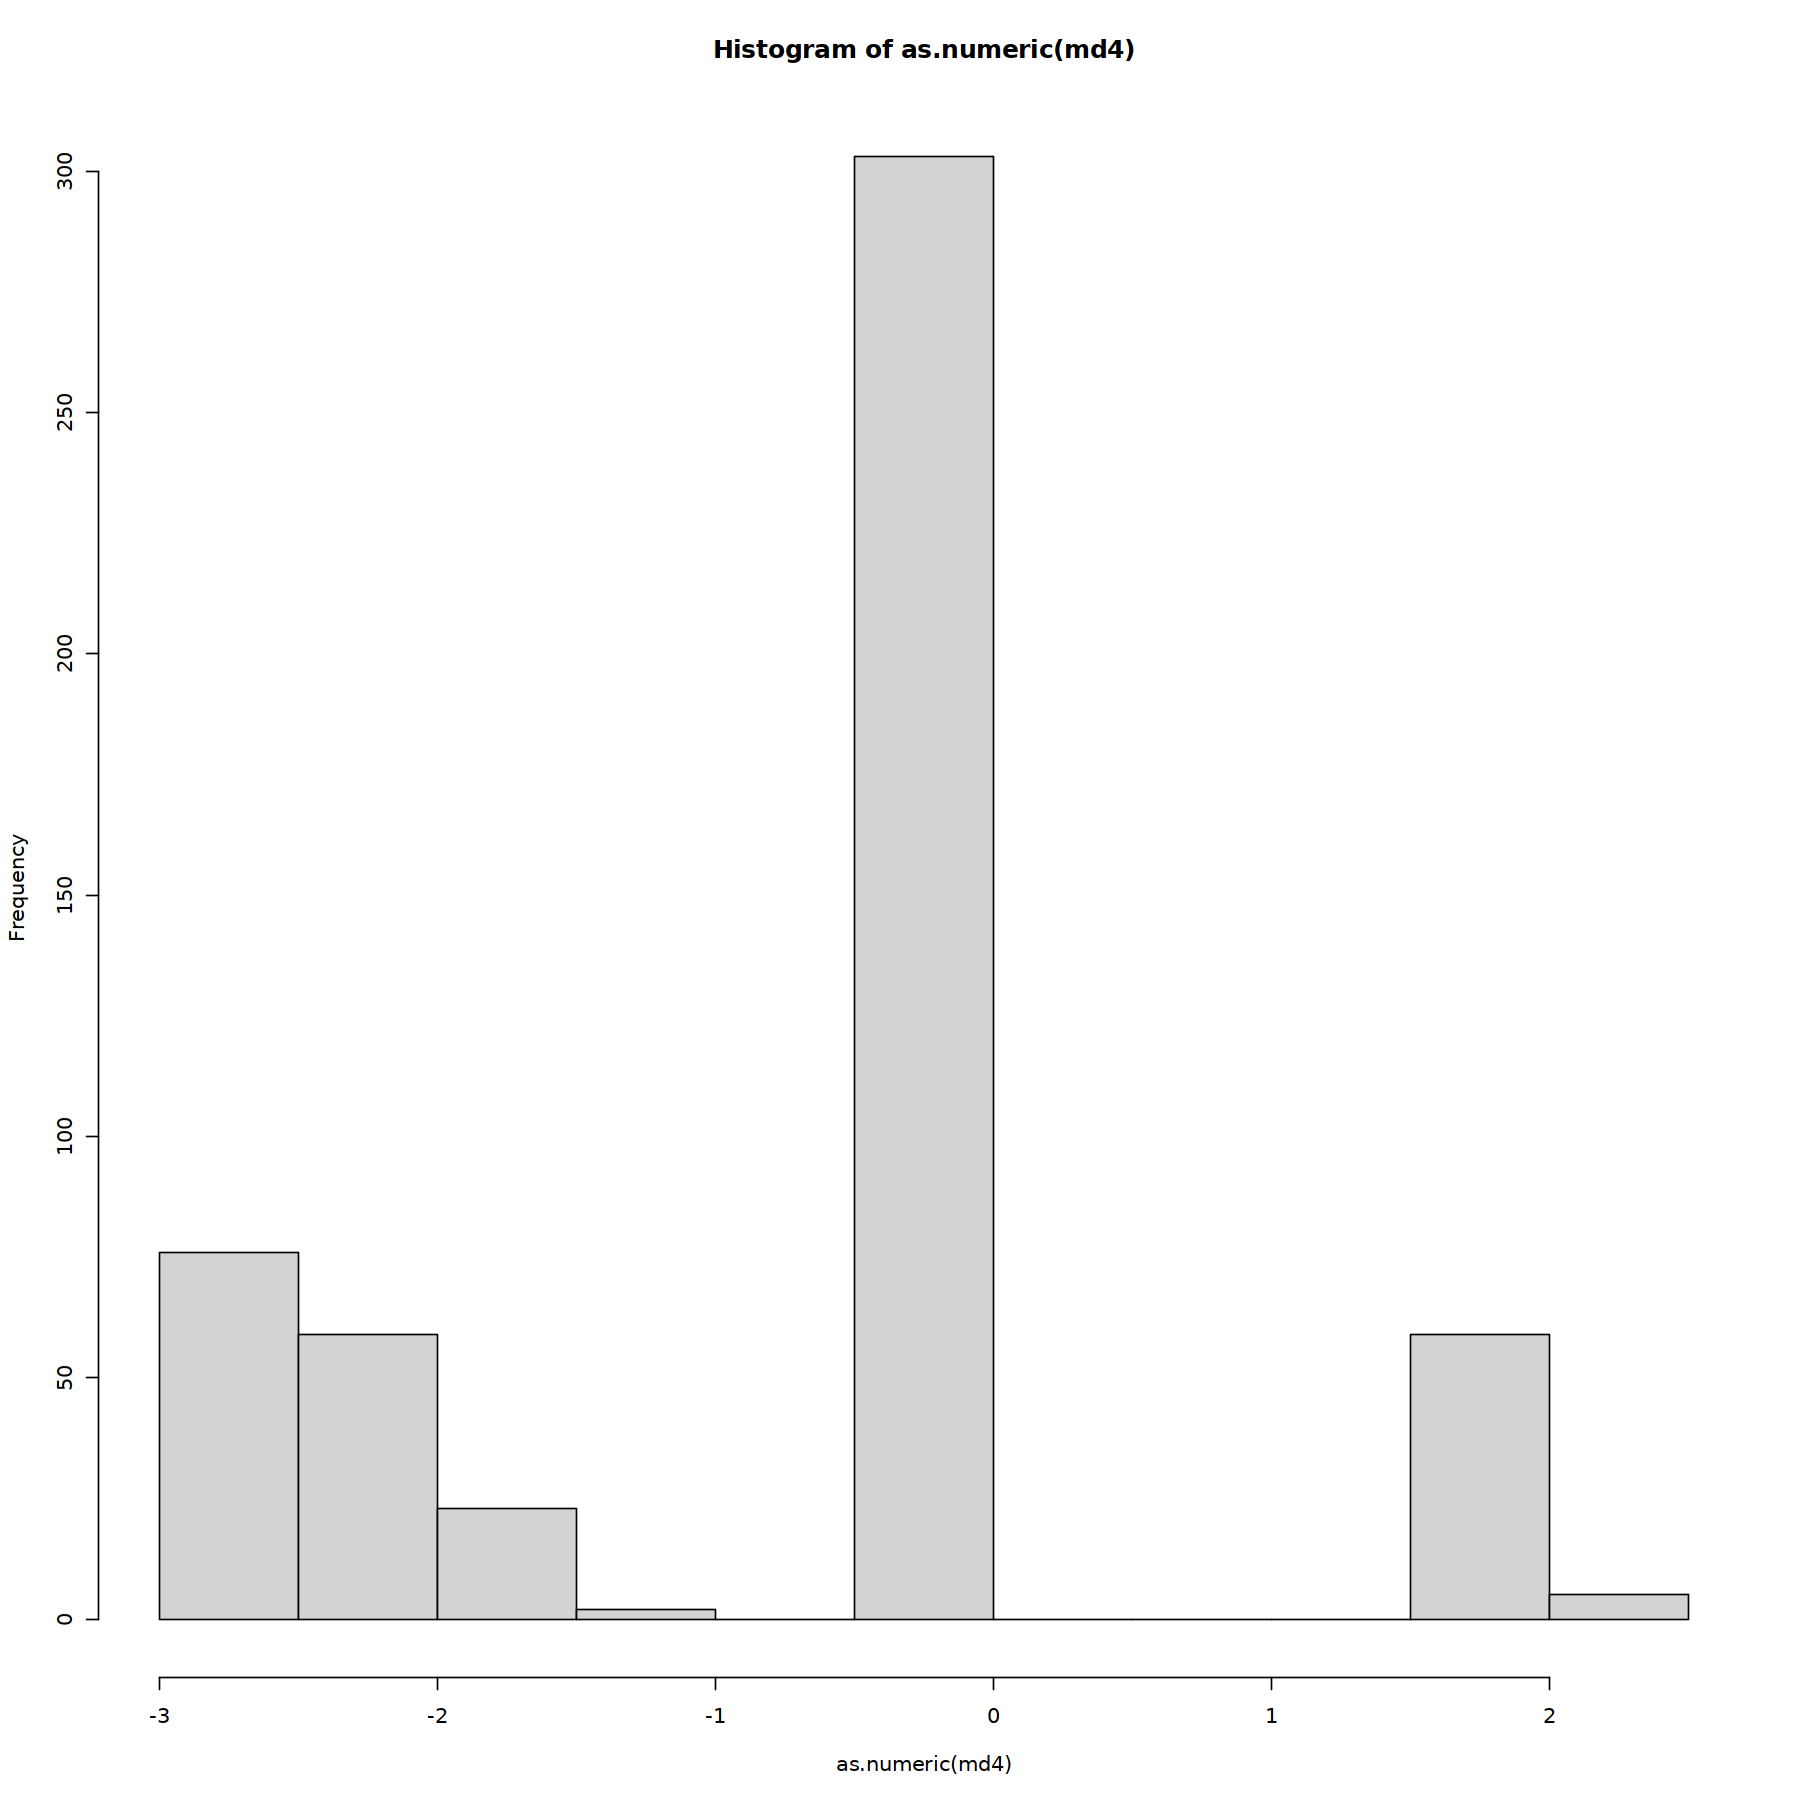

In [421]:
hist(as.numeric(md4))

In [422]:
md5 <- as.data.frame(md4)

In [423]:
i <- c(1:17)
i

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

In [424]:
md6 <- apply(md5[ , i], 2,            # Specify own function within apply
                    function(x) as.numeric(as.character(x)))

In [425]:
rownames(md6) <- rownames(md5)

In [426]:
md7 <- md6
md7[is.na(md7)] <- 0

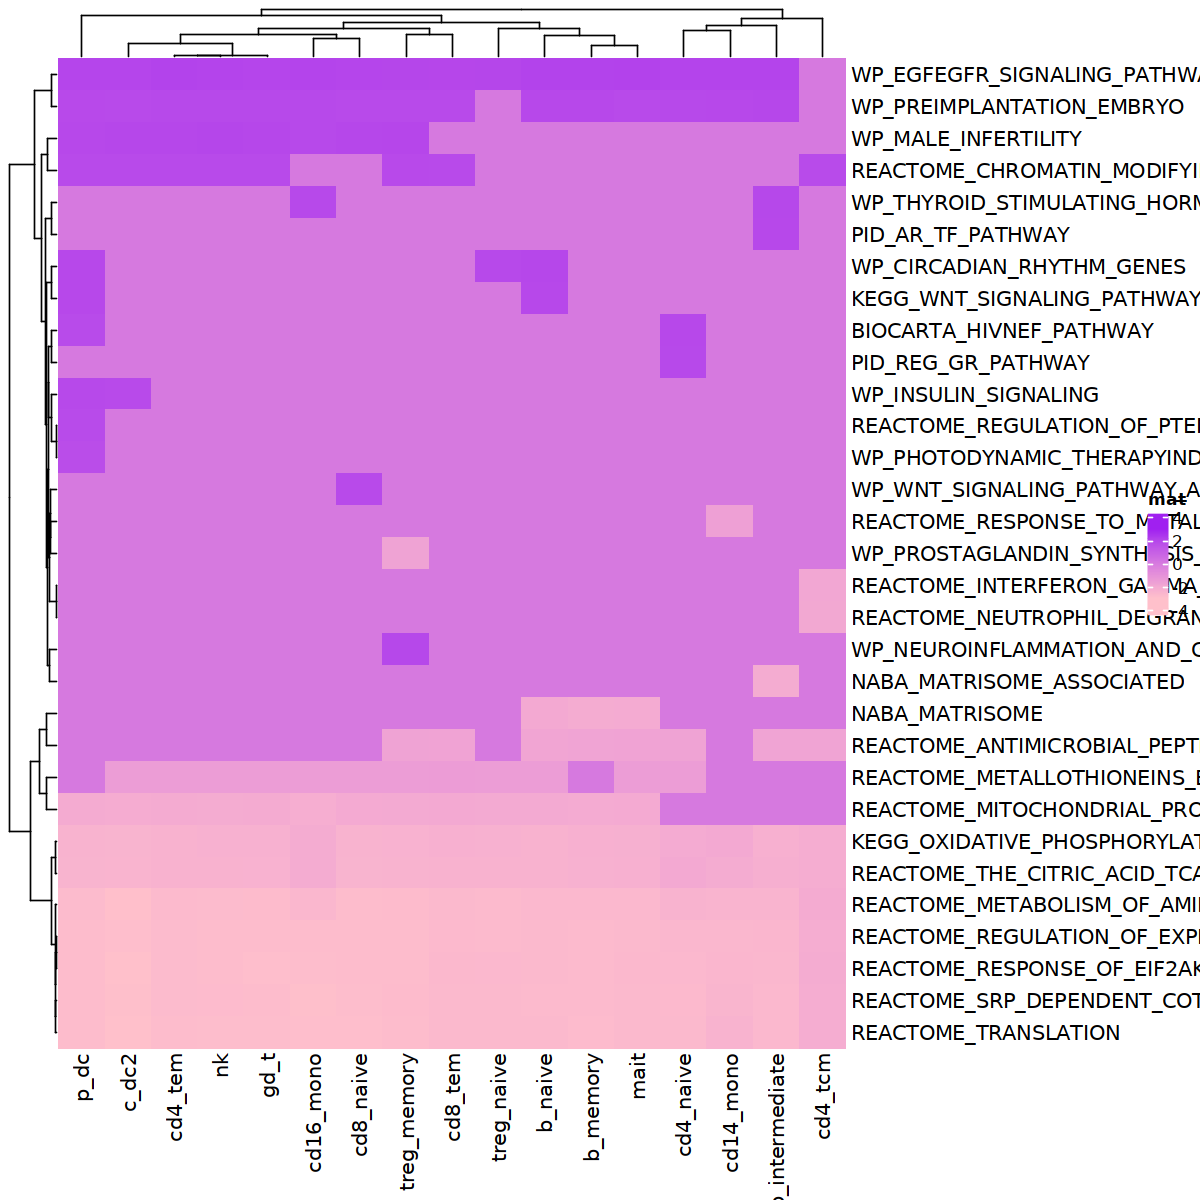

In [427]:
options(repr.plot.width = 10, repr.plot.height = 10)
Heatmap(md7,name = "mat",col = circlize::colorRamp2(c(-3,3),
                                  c( "pink","purple"
                                    )))

In [241]:
###############################
###############################
################################

In [202]:
so_l2_pseudo=readRDS("/home/jupyter/ra_B140_B098_check/psedo_9_sam.rds")

In [203]:
so_l2_pseudo

class: SingleCellExperiment 
dim: 8395 302 
metadata(0):
assays(1): counts
rownames(8395): NOC2L ISG15 ... AC008555.5 LINC00402
rowData names(0):
colnames: NULL
colData names(54): orig.ident nCount_RNA ... predicted.celltype.l2.5
  ncells
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [204]:
B_int = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='B intermediate')
B_mem= subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='B memory')
B_naive= subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='B naive')
cDC2_cel = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='cDC2')
CD14_Mono = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='CD14 Mono')
CD16_Mono = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='CD16 Mono')
CD4_Naive = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='CD4 Naive')
CD4_tcm = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='CD4 TCM')
CD4_tem= subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='CD4 TEM')
CD8_Naive = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='CD8 Naive')
CD8_tem = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='CD8 TEM')
#dnT_cels = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='dnT')
gdT_cels = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='gdT')
MAIT_cels = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='MAIT')
NK_cels = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='NK')
pDC_cels = subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='pDC')
Treg_Memory= subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='Treg Memory')
Treg_Naive= subset(so_l2_pseudo, ,colData(so_l2_pseudo)$predicted.celltype.l2.5=='Treg Naive')

In [205]:
psb9=list(B_int,B_mem,B_naive,cDC2_cel,CD14_Mono,CD16_Mono ,CD4_Naive,CD4_tcm,CD4_tem,
         CD8_Naive,CD8_tem,gdT_cels,MAIT_cels,NK_cels,pDC_cels,Treg_Memory,Treg_Naive)

In [208]:
names(psb9)=names(alldata_new)
psb9[[17]]

class: SingleCellExperiment 
dim: 8395 9 
metadata(0):
assays(1): counts
rownames(8395): NOC2L ISG15 ... AC008555.5 LINC00402
rowData names(0):
colnames: NULL
colData names(54): orig.ident nCount_RNA ... predicted.celltype.l2.5
  ncells
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [198]:
# Step 1: Extract the Geneset column from the cm_genes data frame
geneset <- cm_genes$Geneset

# Step 2 and Step 3: Create a function to identify missing genes for a given SingleCellExperiment object
find_missing_genes <- function(sce_object, geneset) {
  # Get the rownames from the counts assay of the SingleCellExperiment object
  rownames_alldata <- rownames(assay(sce_object, "counts"))
  
  # Identify the missing genes that are present in Geneset but not in the rownames of alldata
  missing_genes <- setdiff(geneset, rownames_alldata)
  
  return(missing_genes)
}

# Apply the find_missing_genes function to all the sce objects in alldata1
missing_genes_list <- lapply(psb9, find_missing_genes, geneset)

In [278]:
# Extract the "counts" assay from each SCE object and bind them together
all_counts <- lapply(psb9, function(sce) assay(sce, "counts"))
combined_matrix_9 <- do.call(cbind, all_counts)


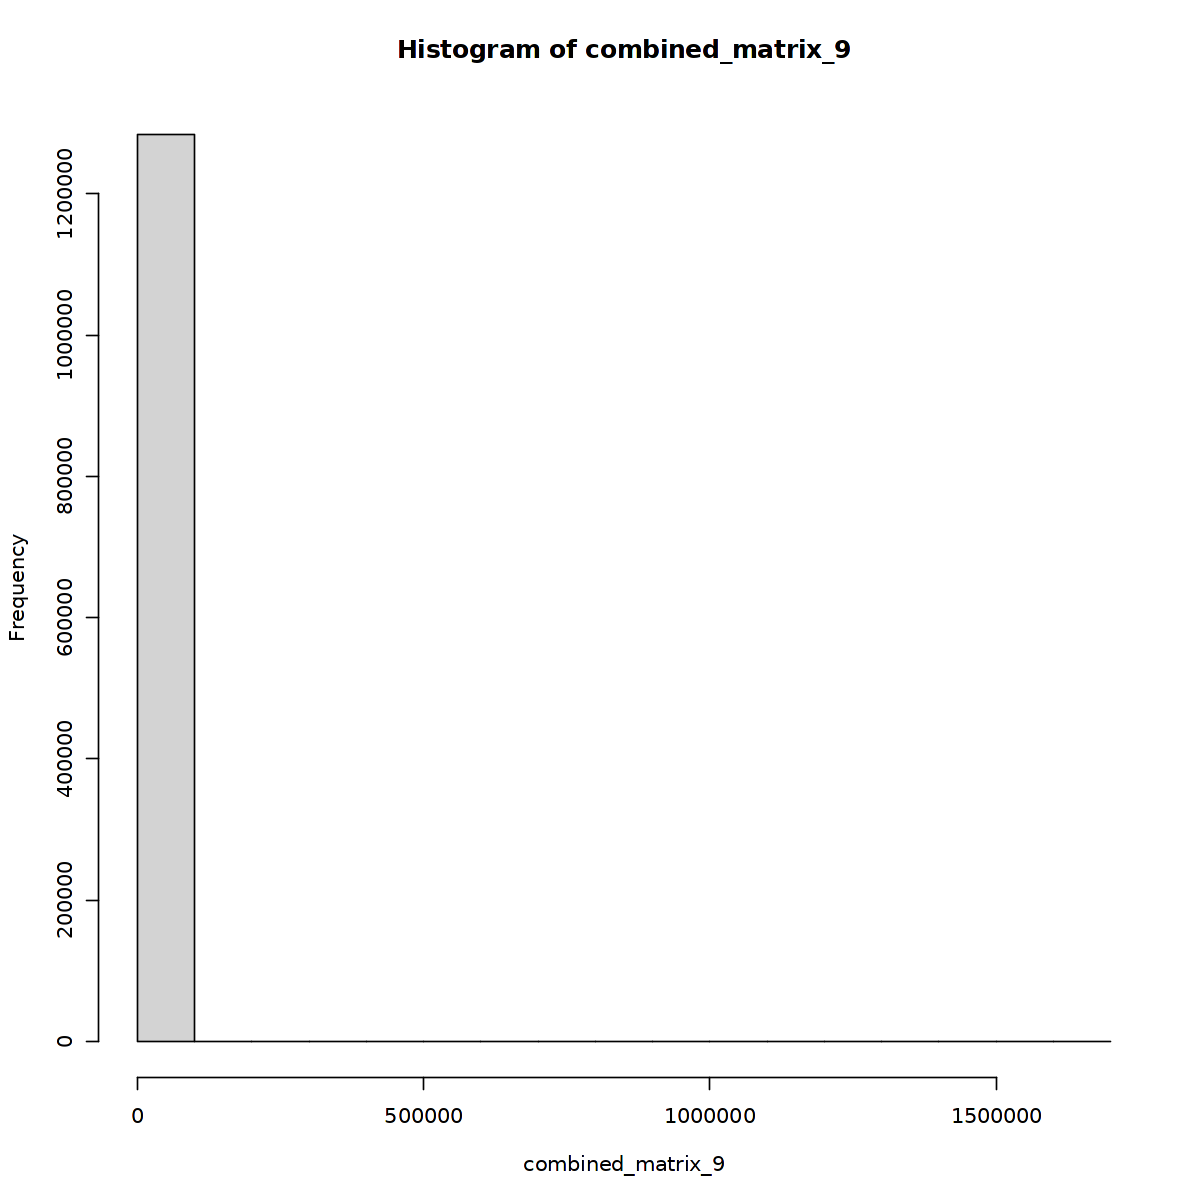

In [279]:
hist(combined_matrix_9)

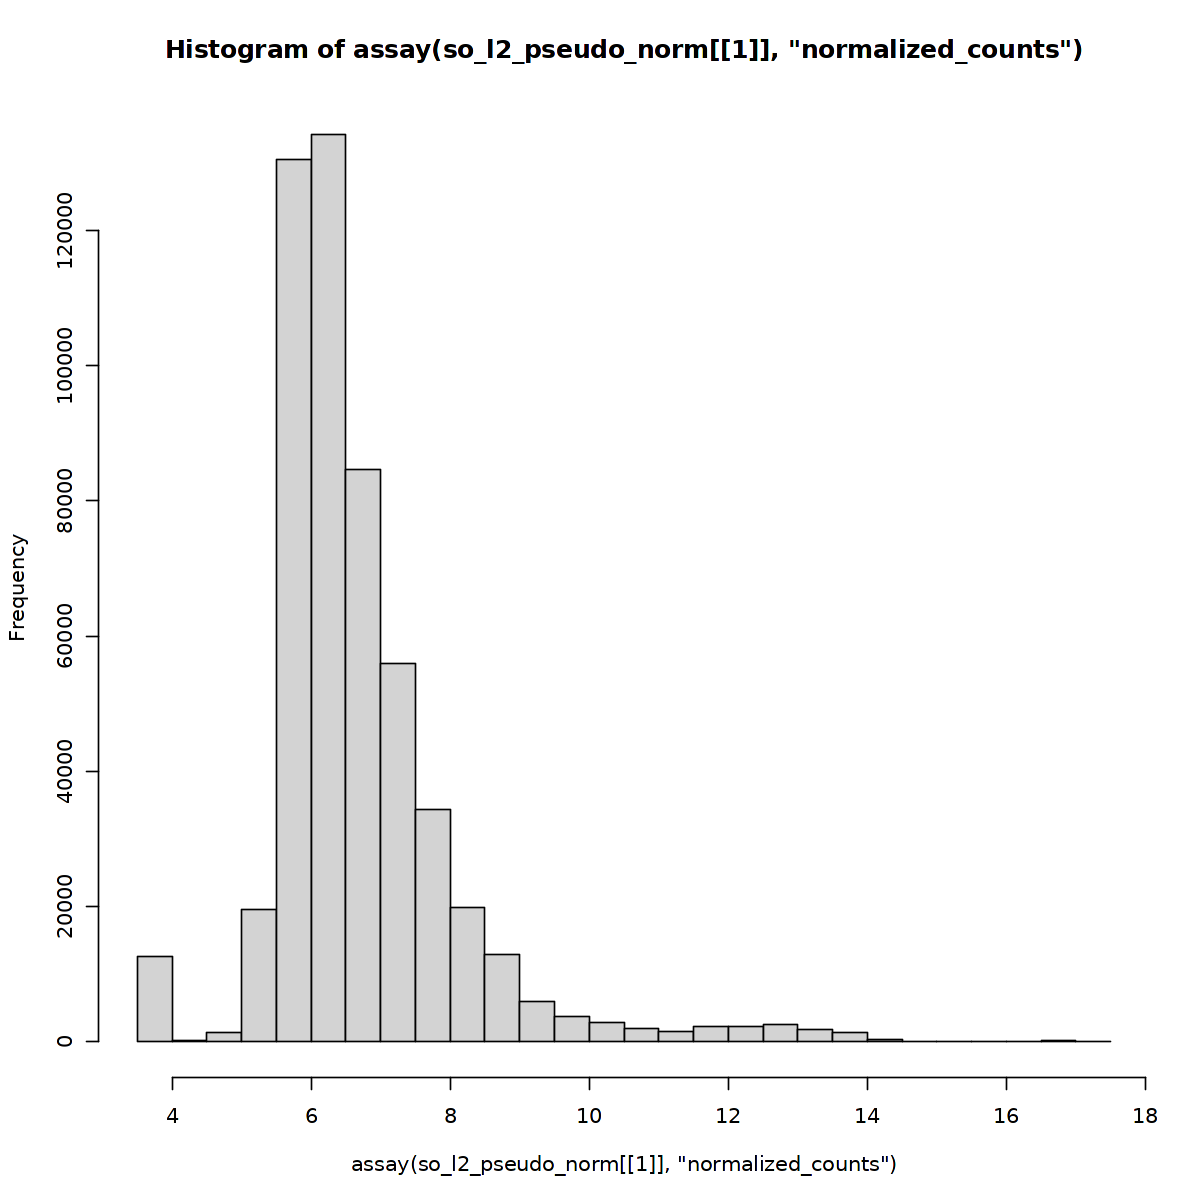

In [293]:
hist(assay(so_l2_pseudo_norm[[1]],'normalized_counts'))

In [288]:
hist(assay(alldata[[1]],'normalized_counts'))

ERROR: Error in assay(alldata[[1]], "normalized_counts"): 'assay(<SingleCellExperiment>, i="character", ...)' invalid subscript 'i'
'normalized_counts' not in names(assays(<SingleCellExperiment>))


In [201]:
##just checking the count of genes missing across cell types
#missing_genes_list[[1]]
missing_genes_list[[1]]%>%length()

#missing_genes_list[[2]]
missing_genes_list[[2]]%>%length()

#missing_genes_list[[3]]
missing_genes_list[[3]]%>%length()

#missing_genes_list[[4]]
missing_genes_list[[4]]%>%length()

#missing_genes_list[[5]]
missing_genes_list[[5]]%>%length()

#missing_genes_list[[6]]
missing_genes_list[[6]]%>%length()

#missing_genes_list[[7]]
missing_genes_list[[7]]%>%length()

#missing_genes_list[[8]]
missing_genes_list[[8]]%>%length()

#missing_genes_list[[9]]
missing_genes_list[[9]]%>%length()

#missing_genes_list[[10]]
missing_genes_list[[10]]%>%length()

#missing_genes_list[[11]]
#missing_genes_list[[11]]%>%length()

#missing_genes_list[[12]]
missing_genes_list[[12]]%>%length()

#missing_genes_list[[13]]
missing_genes_list[[13]]%>%length()

#missing_genes_list[[14]]
missing_genes_list[[14]]%>%length()

#missing_genes_list[[15]]
missing_genes_list[[15]]%>%length()

#missing_genes_list[[16]]
missing_genes_list[[16]]%>%length()

#missing_genes_list[[17]]
missing_genes_list[[17]]%>%length()


[1] 2

[1] 2

[1] 2

[1] 2

[1] 2

[1] 2

[1] 2

[1] 2

[1] 2

[1] 2

[1] 2

[1] 2

[1] 2

[1] 2

[1] 2

[1] 2

In [244]:
#################lets take x4 for Factor 1 and check of genes for b int ####

In [264]:
x4%>%head(3)

Fc_val        sample.sampleKitGuid sex    age cohort  disease_catergory
KT00001 -0.0005943256 KT00001              Female 32  healthy healthy          
KT00006  0.0014678661 KT00006              Female 27  healthy healthy          
KT00012  0.0069446171 KT00012              Female 34  healthy healthy          
        file.batchID Factor 
KT00001 B001         Factor1
KT00006 B002         Factor1
KT00012 B002         Factor1

In [265]:
x4_1=x4[(1:1701),]
x4_1%>%dim()

[1] 1701    8

In [266]:
at3

ERROR: Error in eval(expr, envir, enclos): object 'at3' not found


In [89]:
######################################now we will rank the genes and get the common one #########################

In [90]:
at107=t(ldngs1)
head(at107)
dim(at107)

[,1]       [,2]        [,3]       [,4]      
b_intermediate:A1BG       -0.4672808 -1.05663231  0.1042558  2.3700423
b_intermediate:ABCF1      -2.1142995 -1.81879471 -0.2379174  4.7194841
b_intermediate:ABHD14A    -1.4205144  0.03813222  0.6214739 -0.5267447
b_intermediate:ABHD2      -1.0428336  0.00253700 -0.2377866  0.7944093
b_intermediate:ABTB1      -0.3171491  1.96813282  0.2607836 -1.3516161
b_intermediate:AC004687.1 18.0420205 -0.11040154  1.2658720 -3.8143776
                          [,5]       [,6]        [,7]        [,8]       
b_intermediate:A1BG       -7.0560462 -0.33340238  1.15470179 -1.36384940
b_intermediate:ABCF1      -2.2724953 -0.61610163 -0.02467761  0.06681107
b_intermediate:ABHD14A    -2.6660925 -0.31997923 -0.05593928  0.35857828
b_intermediate:ABHD2       1.6325143  0.29845351 -0.29889967  0.41213598
b_intermediate:ABTB1       0.2310741  0.07329956 -0.52904397  0.09972871
b_intermediate:AC004687.1  7.4983534  0.53520291  1.70590464 -0.17166592

[1] 28917     8

In [91]:
colnames(at107)=c("F1","F2","F3","F4","F5","F6","F7","F8")
at1_107 <- tibble::rownames_to_column(as.data.frame(at107), var = "CT")
at1_107%>%head()

CT                        F1         F2          F3         F4        
1 b_intermediate:A1BG       -0.4672808 -1.05663231  0.1042558  2.3700423
2 b_intermediate:ABCF1      -2.1142995 -1.81879471 -0.2379174  4.7194841
3 b_intermediate:ABHD14A    -1.4205144  0.03813222  0.6214739 -0.5267447
4 b_intermediate:ABHD2      -1.0428336  0.00253700 -0.2377866  0.7944093
5 b_intermediate:ABTB1      -0.3171491  1.96813282  0.2607836 -1.3516161
6 b_intermediate:AC004687.1 18.0420205 -0.11040154  1.2658720 -3.8143776
  F5         F6          F7          F8         
1 -7.0560462 -0.33340238  1.15470179 -1.36384940
2 -2.2724953 -0.61610163 -0.02467761  0.06681107
3 -2.6660925 -0.31997923 -0.05593928  0.35857828
4  1.6325143  0.29845351 -0.29889967  0.41213598
5  0.2310741  0.07329956 -0.52904397  0.09972871
6  7.4983534  0.53520291  1.70590464 -0.17166592

In [92]:
at2_107<- separate(at1_107, CT, into = c("CT1", "genes"), sep = "\\:")
at2_107%>%head()

CT1            genes      F1         F2          F3         F4        
1 b_intermediate A1BG       -0.4672808 -1.05663231  0.1042558  2.3700423
2 b_intermediate ABCF1      -2.1142995 -1.81879471 -0.2379174  4.7194841
3 b_intermediate ABHD14A    -1.4205144  0.03813222  0.6214739 -0.5267447
4 b_intermediate ABHD2      -1.0428336  0.00253700 -0.2377866  0.7944093
5 b_intermediate ABTB1      -0.3171491  1.96813282  0.2607836 -1.3516161
6 b_intermediate AC004687.1 18.0420205 -0.11040154  1.2658720 -3.8143776
  F5         F6          F7          F8         
1 -7.0560462 -0.33340238  1.15470179 -1.36384940
2 -2.2724953 -0.61610163 -0.02467761  0.06681107
3 -2.6660925 -0.31997923 -0.05593928  0.35857828
4  1.6325143  0.29845351 -0.29889967  0.41213598
5  0.2310741  0.07329956 -0.52904397  0.09972871
6  7.4983534  0.53520291  1.70590464 -0.17166592

In [93]:
new_df_107 <- at2_107[, c("CT1", "genes", "F5")]


In [94]:
df_list_107 <- split(new_df_107, new_df_107$CT1)

In [95]:
df_list_107

$b_intermediate
                CT1       genes            F5
1    b_intermediate        A1BG  -7.056046238
2    b_intermediate       ABCF1  -2.272495301
3    b_intermediate     ABHD14A  -2.666092527
4    b_intermediate       ABHD2   1.632514321
5    b_intermediate       ABTB1   0.231074065
6    b_intermediate  AC004687.1   7.498353400
7    b_intermediate  AC006369.1  -2.389013081
8    b_intermediate  AC007952.4  19.016287758
9    b_intermediate  AC010642.2  -1.329275671
10   b_intermediate  AC016831.7  11.438769733
11   b_intermediate  AC025164.1   0.907259297
12   b_intermediate  AC026979.2  -5.374650405
13   b_intermediate  AC114760.2   0.319412141
14   b_intermediate  AC243960.1   1.481356326
15   b_intermediate      ACADVL  -1.419645841
16   b_intermediate       ACAP1  -0.511046885
17   b_intermediate       ACIN1   5.224329297
18   b_intermediate        ACO2   0.126432401
19   b_intermediate        ACP1  -1.108027547
20   b_intermediate       ACSF3   0.670035812
21   b_intermediate       ACSL3   1.537118693
22   b_intermediate       ACTR2   1.094331759
23   b_intermediate       ACTR3  -0.122657613
24   b_intermediate       ACYP2  -5.033560841
25   b_intermediate        ADD1   3.956160991
26   b_intermediate        ADD3   2.259441821
27   b_intermediate        ADH5  -2.324049415
28   b_intermediate        ADI1  -1.031128375
29   b_intermediate         ADK   4.421621654
30   b_intermediate       ADPGK   3.892984492
31   b_intermediate      AFG3L2   0.929646264
32   b_intermediate       AFTPH   5.631625285
33   b_intermediate         AGL   2.723715942
34   b_intermediate        AGO2   3.535950272
35   b_intermediate        AGO3   4.916388639
36   b_intermediate      AHCYL1   1.131409606
37   b_intermediate        AIDA   2.633116389
38   b_intermediate       AIMP1  -1.526105304
39   b_intermediate     AKAP17A   4.001864359
40   b_intermediate        AKNA   3.466222605
41   b_intermediate      AKR1B1  -1.139493081
42   b_intermediate  AL133453.1  -5.034266323
43   b_intermediate  AL627171.1   1.819317412
44   b_intermediate     ALDH9A1  -0.751113853
45   b_intermediate       ALDOA   0.116792533
46   b_intermediate        ALG2  -0.031295855
47   b_intermediate        AMD1  -1.642451773
48   b_intermediate     ANAPC11  -1.300366654
49   b_intermediate     ANAPC13  -1.512317380
50   b_intermediate     ANAPC15  -1.652944747
51   b_intermediate     ANAPC16  -1.512002126
52   b_intermediate      ANAPC5   0.979340799
53   b_intermediate      ANKIB1   2.371902422
54   b_intermediate      ANKLE2   4.964681148
55   b_intermediate     ANKRD11   5.779674972
56   b_intermediate    ANKRD13D   2.282969220
57   b_intermediate     ANKRD36  14.033301992
58   b_intermediate    ANKRD36B   3.408265495
59   b_intermediate    ANKRD36C  14.850974894
60   b_intermediate     ANKRD44   9.023186912
61   b_intermediate     ANKRD49  -1.723189192
62   b_intermediate      ANKZF1   2.262405035
63   b_intermediate      ANP32E  -1.394365902
64   b_intermediate      ANTXR2   3.208454978
65   b_intermediate       ANXA5 -10.859260203
66   b_intermediate       ANXA6  -1.287631124
67   b_intermediate       AP1S2  -9.083346255
68   b_intermediate       AP2A2   0.161138944
69   b_intermediate       AP2B1  -6.426251097
70   b_intermediate       AP5M1   1.066975983
71   b_intermediate       APH1A  -1.031969423
72   b_intermediate        APIP  -1.848298061
73   b_intermediate         AQR   2.483073320
74   b_intermediate       ARAP2  10.146630446
75   b_intermediate     ARFGAP3  -0.432518285
76   b_intermediate      ARGLU1   4.012880556
77   b_intermediate    ARHGAP30   2.055294255
78   b_intermediate     ARHGAP4   1.204595403
79   b_intermediate     ARHGEF1   1.585919120
80   b_intermediate     ARHGEF2   1.492472235
81   b_intermediate      ARID1A   2.759956151
82   b_intermediate      ARID1B   4.933913124
83   b_intermediate       ARID2   3.297589063
84   b_intermediate      ARID3A   3.361471833
85   b_intermediate      ARID4A   1.989791810
86   b_intermediate       AR

In [96]:
# Function to rank genes within a DataFrame and extract top N
process_dataframe <- function(df) {
  df$ranked_fc <- rank(df$F5)
  df <- df %>% arrange(desc(ranked_fc))
  
  top_genes <- head(df$genes, 20)  # Extract top 20 genes
  return(list(data = df, top_genes = top_genes))
}
# Apply the function to each DataFrame in the list
#top_genes_list <- lapply(df_list, rank_and_extract)
top_genes_list_107 <- lapply(df_list_107, process_dataframe)

In [97]:
for (i in seq_along(top_genes_list_107 )) {
  top_genes_107S<- top_genes_list_107 [[i]]$top_genes
  #cat("Top 20 genes for object", i, ":", paste(top_genes, collapse = ", "), "\n")
}

In [100]:
top_genes_list_107S <- lapply( top_genes_list_107, function(obj) obj$top_genes)

In [101]:
top_genes_list_107S

$b_intermediate
 [1] "FOSB"       "EGR1"       "JUN"        "PPP1R15A"   "POLR2J3.1" 
 [6] "AC007952.4" "FTX"        "CCNL1"      "ANKRD36C"   "BTG2"      
[11] "ANKRD36"    "PARP14"     "STX7"       "ATP2B1-AS1" "OGA"       
[16] "CDK13"      "ITGA4"      "NKTR"       "DDX39B"     "NIN"       

$b_memory
 [1] "FOSB"       "EGR1"       "JUN"        "PPP1R15A"   "POLR2J3.1" 
 [6] "AC007952.4" "ANKRD36C"   "CCNL1"      "FTX"        "ANKRD36"   
[11] "ITGA4"      "PARP14"     "OGA"        "BTG2"       "CDK13"     
[16] "DDX39B"     "ARAP2"      "NKTR"       "NIN"        "ATP2B1-AS1"

$b_naive
 [1] "FOSB"       "EGR1"       "JUN"        "POLR2J3.1"  "PPP1R15A"  
 [6] "AC007952.4" "ANKRD36C"   "FTX"        "ANKRD36"    "CCNL1"     
[11] "ITGA4"      "OGA"        "DDX39B"     "PARP14"     "NKTR"      
[16] "CDK13"      "ARAP2"      "CDC14A"     "NIN"        "TTC14"     

$c_dc2
 [1] "FOSB"       "EGR1"       "PPP1R15A"   "POLR2J3.1"  "LYZ"       
 [6] "JUN"        "AC007952.4" "STX7"       "CCNL1"      "FTX"       
[11] "RAB11FIP1"  "ANKRD36C"   "CTSS"       "NIN"        "ZEB2"      
[16] "PARP14"     "ANKRD36"    "FKBP5"      "ATP2B1-AS1" "CEBPD"     

$cd14_mono
 [1] "FOSB"       "EGR1"       "JUN"        "PPP1R15A"   "POLR2J3.1" 
 [6] "PLCG2"      "AC007952.4" "ATP2B1-AS1" "CCNL1"      "ITGA4"     
[11] "PARP14"     "ANKRD36C"   "FTX"        "ANKRD36"    "BTG2"      
[16] "POU2F2"     "NIN"        "OGA"        "CTSS"       "ZEB2"      

$cd16_mono
 [1] "FOSB"       "EGR1"       "JUN"        "PPP1R15A"   "POLR2J3.1" 
 [6] "PLCG2"      "ATP2B1-AS1" "POU2F2"     "PARP14"     "ITGA4"     
[11] "CCNL1"      "ANKRD36C"   "BTG2"       "FTX"        "AC007952.4"
[16] "ANKRD36"    "NIN"        "OGA"        "ZEB2"       "NKTR"      

$cd4_naive
 [1] "FOSB"       "POLR2J3.1"  "JUN"        "EGR1"       "FTX"       
 [6] "ANKRD36C"   "AC007952.4" "PPP1R15A"   "ANKRD36"    "PIK3IP1"   
[11] "PDE3B"      "FKBP5"      "CDC14A"     "DDX39B"     "SYNE1"     
[16] "SLFN12L"    "NKTR"       "CCNL1"      "TTC14"      "OGA"       

$cd4_tcm
 [1] "FOSB"       "POLR2J3.1"  "EGR1"       "PPP1R15A"   "JUN"       
 [6] "FTX"        "ANKRD36C"   "ANKRD36"    "ITGA4"      "AC007952.4"
[11] "ARAP2"      "DDX39B"     "PARP14"     "NKTR"       "OGA"       
[16] "CCNL1"      "SYNE1"      "NIN"        "CDC14A"     "CDK13"     

$cd4_tem
 [1] "FOSB"       "EGR1"       "POLR2J3.1"  "JUN"        "PPP1R15A"  
 [6] "ANKRD36C"   "FTX"        "AC007952.4" "ANKRD36"    "SYNE1"     
[11] "ARAP2"      "ITGA4"      "CCNL1"      "DDX39B"     "OGA"       
[16] "NKTR"       "PARP14"     "SLFN12L"    "NIN"        "CDC14A"    

$cd8_naive
 [1] "FOSB"       "POLR2J3.1"  "EGR1"       "JUN"        "PPP1R15A"  
 [6] "FTX"        "ANKRD36C"   "AC007952.4" "ANKRD36"    "DDX39B"    
[11] "ITGA4"      "CCNL1"      "FKBP5"      "NKTR"       "OGA"       
[16] "CDC14A"     "TTC14"      "SYNE1"      "NIN"        "SLFN12L"   

$cd8_tem
 [1] "FOSB"      "POLR2J3.1" "EGR1"      "PPP1R15A"  "JUN"       "GNLY"     
 [7] "ARAP2"     "SYNE1"     "ANKRD36C"  "ITGA4"     "FTX"       "ANKRD36"  
[13] "PARP14"    "OGA"       "CCNL1"     "SLFN12L"   "UTRN"      "DDX39B"   
[19] "MYO1F"     "NIN"      

$gd_t
 [1] "FOSB"       "EGR1"       "POLR2J3.1"  "JUN"        "PPP1R15A"  
 [6] "ARAP2"      "ANKRD36C"   "SYNE1"      "GNLY"       "ANKRD36"   
[11] "ITGA4"      "FTX"        "PARP14"     "SLFN12L"    "CCNL1"     
[16] "OGA"        "UTRN"       "DDX39B"     "AC007952.4" "MYO1F"     

$mait
 [1] "FOSB"       "POLR2J3.1"  "EGR1"       "JUN"        "PPP1R15A"  
 [6] "FTX"        "ANKRD36C"   "AC007952.4" "ANKRD36"    "CCNL1"     
[11] "ITGA4"      "NKTR"       "DDX39B"     "OGA"        "PARP14"    
[16] "CDC14A"     "NIN"        "CDK13"      "TTC14"      "FKBP5"     

$nk
 [1] "FOSB"       "POLR2J3.1"  "EGR1"       "JUN"        "PPP1R15A"  
 [6] "ANKRD36C"   "FTX"        "SYNE1"      "ANKRD36"    "ARAP2"     
[11] "ITGA4"      "CCNL1"      "AC007952.4" "SLFN12L"    "OGA"       
[16] "DDX39B"     "NKTR"    

In [102]:
common_genes_107 <- Reduce(intersect, top_genes_list_107S)

In [103]:
common_genes_107

[1] "FOSB"      "EGR1"      "JUN"       "PPP1R15A"  "POLR2J3.1" "FTX"      
[7] "CCNL1"     "ANKRD36C"  "ANKRD36"

In [104]:
psb_107=readRDS("/home/jupyter/ra_B140_B098_check/normalized_pseudobulk_PV_new.rds")

In [105]:
psb_107[[2]]

class: SingleCellExperiment 
dim: 4643 107 
metadata(0):
assays(2): counts normalized_counts
rownames(4643): A1BG AAED1 ... ZSCAN16-AS1 ZSWIM7
rowData names(0):
colnames(107): KT00001 KT00006 ... KT03921 KT03928
colData names(77): orig.ident nCount_RNA ... sex age_bin
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [110]:
normalized_count_matrix_lists_107 <- list()

for (obj in psb_107) {
  normalized_count_matrix <- assay(obj, "normalized_counts") 
  normalized_count_matrix_lists_107 <- append(normalized_count_matrix_lists_107, list(normalized_count_matrix))
}

In [111]:
normalized_count_matrix_lists_107[[1]]%>%rownames()%>%head()

[1] "A1BG"     "AAED1"    "AAMP"     "AASDH"    "AASDHPPT" "AATF"

In [115]:
subset_count_matrices_107<- list()

# Loop through each SCE object and extract the subset count matrix
for (i in seq_along(normalized_count_matrix_lists_107)) {
  count_matrix <- normalized_count_matrix_lists_107[[i]]
  gene_list <- common_genes_107
  
  matching_rows <- rownames(count_matrix) %in% gene_list
  subset_count_matrix <- count_matrix[matching_rows, ]
  
  subset_count_matrices_107[[i]] <- subset_count_matrix
}

In [116]:
scaled_matrices_list_107 <- lapply(subset_count_matrices_107, function(subset_count_matrix) {
  t(scale(t(subset_count_matrix), scale = TRUE))
})

In [117]:
scaled_matrices_list_107

[[1]]
               KT00001     KT00006    KT00012     KT00015    KT00016
ANKRD36   -2.262227030 -0.07753954  0.9339426 -0.07394978 -0.1139719
ANKRD36C  -0.206143451 -0.68180030  0.5642184  0.07263557 -0.3613530
CCNL1     -1.033821463  0.39067793  0.5220373  0.75790734  1.6884282
EGR1      -0.263993320  0.07630288 -0.5544515  0.64067960  1.1636028
FOSB      -0.003156869  0.04709377 -0.1481860  0.68904341  1.2929756
FTX       -0.111496436 -0.13606700  0.2496883 -0.58563682 -0.9667470
JUN       -0.277598586  0.36918106  0.3143810  0.57678608  1.2674879
POLR2J3.1 -0.904335816 -1.06219355  0.5603519 -0.92168158 -0.5547818
PPP1R15A  -0.441482892  0.09578091  0.4186801  0.61539974  1.3691193
               KT00030    KT00039    KT00042    KT00046    KT00048    KT00050
ANKRD36    0.966846410  1.7788565 -0.5226080  0.6482363  0.7124620  0.0277380
ANKRD36C  -1.133462711 -0.2726137 -0.5827495 -0.5627029  1.3860586 -0.2137575
CCNL1     -0.473925321 -0.8292078 -0.1235832  0.4849485  0.0777970  0.6834377
EGR1       0.385579410 -0.3011203  0.6894279  0.5800752 -0.5474816  0.4704914
FOSB       0.595186270 -0.1921989  0.6685473  0.6547867 -0.6966944  0.4057002
FTX        0.379021971  0.3054316 -0.1051507  0.1686770  0.1406647  0.6049443
JUN       -0.003901944 -0.5446469  0.4169800  0.4837756 -0.4618483  0.4075891
POLR2J3.1  0.419263402  1.2595080 -0.2856018 -1.2969685  0.6724459  0.6020403
PPP1R15A   0.159260460 -0.1189788  0.1864963  0.3921208 -0.9835340  0.2146935
             KT00052    KT00056     KT00057    KT00058    KT00060    KT00063
ANKRD36   -0.6803757  0.3760198  0.26603393  0.1897452 -0.8839508 -0.4991689
ANKRD36C  -0.6217721  0.8254833  1.02075929 -0.7672983  0.8830800 -0.7412747
CCNL1     -0.8156272 -0.6817070  0.03265105 -0.8800377  0.4477284 -0.9781631
EGR1      -1.3206264 -0.3996702  0.32789948 -0.7214071 -0.1157284 -0.7341194
FOSB      -1.4772930 -0.8237256  0.77221905 -1.1635802  0.5761120 -1.6896157
FTX       -0.4065916 -0.5834739 -0.19266949  1.0343984 -0.7245340 -1.0982712
JUN       -1.5095551 -0.8651918  0.96947784 -1.4820127  0.7148361 -1.4954696
POLR2J3.1 -0.5178791 -0.8006818 -1.04478328  0.9350436 -0.1684835  0.4897894
PPP1R15A  -0.9178421 -0.6090375  0.14709043 -0.3035121  0.2570251 -0.9237495
             KT00064    KT00065    KT00067     KT00068    KT00069    KT00070
ANKRD36   -0.9058586 -1.0587472 -0.7801627  0.44075187 -1.2149055  1.0981038
ANKRD36C  -1.3486985 -0.8929296 -0.7562166 -0.31511952 -1.0457613 -0.8524246
CCNL1     -2.5857350 -2.0406420 -0.3586327 -0.36283283 -1.8239949 -0.1175572
EGR1      -1.9135384 -1.2830555 -0.5630795 -0.09638842 -0.9500351 -2.0513204
FOSB      -2.9195157 -1.7372165 -0.6861592  0.01588319 -1.5755339 -1.4393228
FTX        0.1910093  0.2979341  0.9127996  0.81312616 -0.1387719  1.0864020
JUN       -3.7933783 -2.2567995 -0.6352260 -0.29578671 -1.9624344 -1.4025633
POLR2J3.1 -0.2757653 -0.8727735  0.2996966  0.01359707 -0.5037594 -0.9650349
PPP1R15A  -2.7147894 -1.9673341 -0.2079733 -0.07221028 -2.0420221 -1.3370945
             KT00073     KT00074    KT00075    KT00076       KT00077
ANKRD36    0.3532777 -2.89222041 -0.1042875 -0.7858038 -0.0852333835
ANKRD36C   1.3418572  0.02402326 -0.7636289 -1.5034273 -0.2321313797
CCNL1     -0.2101133 -1.83997027 -0.2605824 -1.6018166 -0.0522800894
EGR1      -0.2265583 -0.66296420 -0.4544273 -0.1226757  0.6805402660
FOSB      -0.9276915 -0.34265954 -0.1899394  0.2106515  0.3153248294
FTX        1.6459870 -1.59695738 -0.1315828  0.2058609  0.8998304897
JUN       -0.2147771 -1.54790598 -0.1628031 -0.3041185 -0.4761355178
POLR2J3.1  1.3171371 -0.66386916 -0.5273182 -1.3673002 -0.0897405113
PPP1R15A  -0.2051702 -1.56395042  0.7483867 -1.1916841  0.0005150726
              KT00081     KT00084     KT00086     KT00087     KT00088
ANKRD36    0.05329173  1.51094792  0.22287897  1.45879937  0.01482516
ANKRD36C   0.38927655  0.41789403 -1.25451112 -0.07618689  1.53080417
CCNL1     -0.60460992  0.10518579 -0.79629544  0.12561233 -0.35390234
EGR1      -0.1

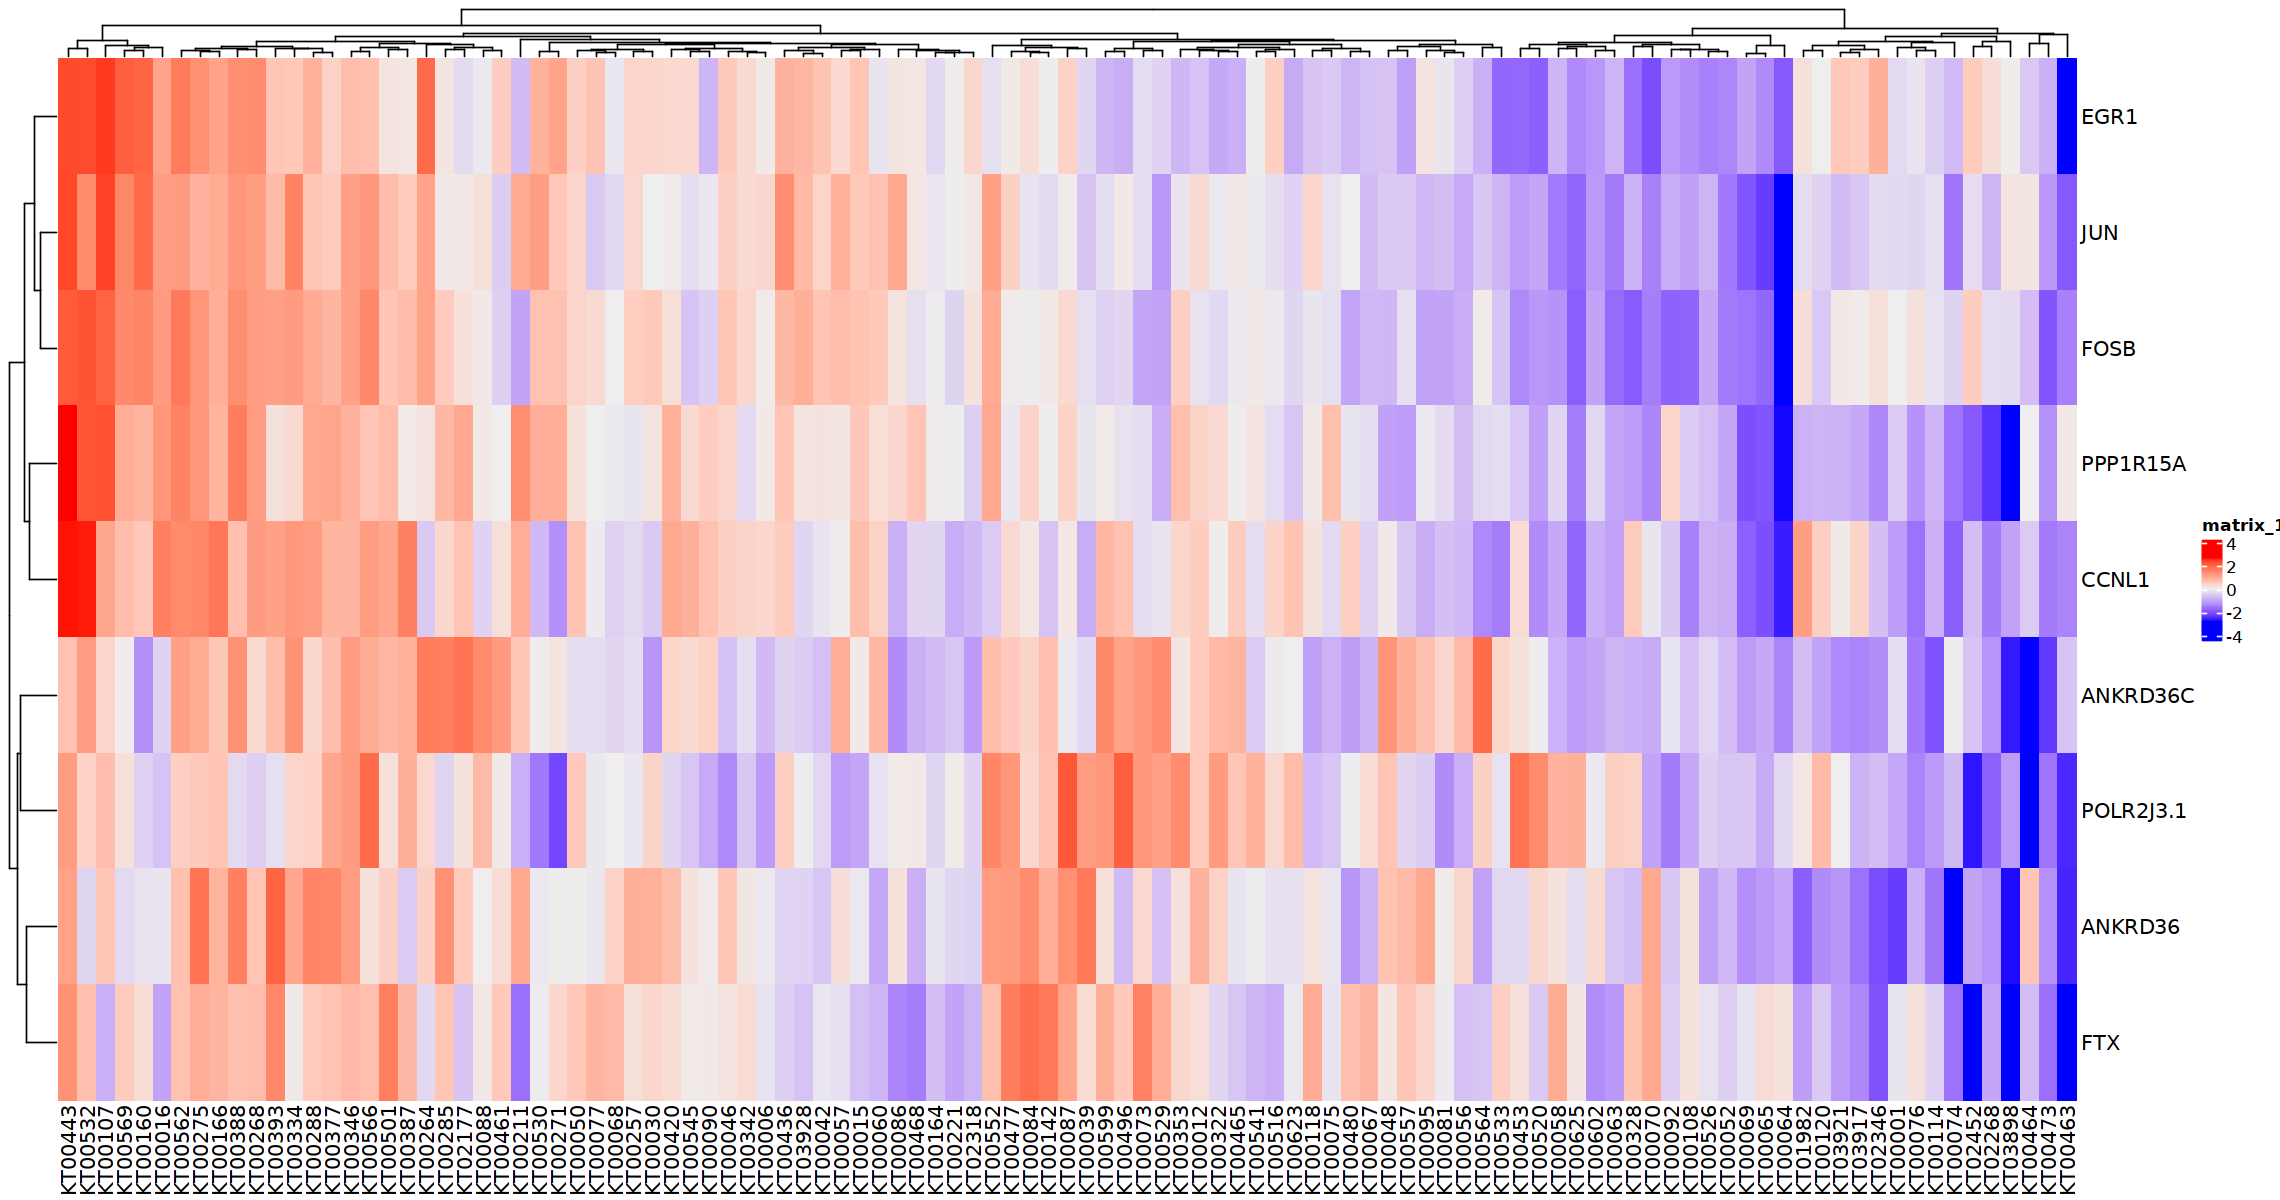

In [118]:
options(repr.plot.width = 19, repr.plot.height = 10)
Heatmap(scaled_matrices_list_107[[1]]) ##bintermediate

In [119]:
metadata_df%>%colnames()%>%sort()

[1] "age"                        "age_bin"                   
 [3] "BMI"                        "category"                  
 [5] "cell_counts"                "cell_ids"                  
 [7] "cell_type"                  "clusterID"                 
 [9] "cohort"                     "cohort.cohortGuid"         
[11] "disease_catergory"          "file.batchID"              
[13] "file.id"                    "file.name"                 
[15] "ident"                      "lastUpdated"               
[17] "ncells"                     "predicted.celltype.l2.5.1" 
[19] "rulein_cluster"             "sample.bridgingControl"    
[21] "sample.daysSinceFirstVisit" "sample.drawDate"           
[23] "sample.id"                  "sample.sampleKitGuid"      
[25] "sample.sampleKitGuid.1"     "sample.visitDetails"       
[27] "sample.visitName"           "Serum_CCP3Final"           
[29] "Serum_CCP3Outcome"          "Serum_RFIgAfinal"          
[31] "Serum_RFIgAOutcome"         "Serum_RFIgMfinal"          
[33] "Serum_RFIgMOutcome"         "sex"                       
[35] "sizeFactor"                 "Sp_CCPIgA_FinalLevel"      
[37] "SP_CCPIgG_FinalLevel"       "SP_RFIgA_FinalLevel"       
[39] "SP_RFIgM_FinalLevel"        "SputumCollected"           
[41] "subject.biologicalSex"      "subject.birthYear"         
[43] "subject.ethnicity"          "subject.id"                
[45] "subject.partnerCode"        "subject.race"              
[47] "subject.subjectGuid"        "X"

In [130]:
set.seed(1221)
col_anno2 <- HeatmapAnnotation(df = metadata_df[1:107,] %>% dplyr::select(c(disease_catergory,sex,file.batchID)),
                              #Factor_val = anno_barplot(heatmap_meta$F5),
    col = list(disease_catergory=c('healthy' = nejm_color[1], 'at_risk' =nejm_color[2],' Healthy_new'=nejm_color[3]),
                                            sex=c('Female' = jama_color[1], 'Male' = jama_color[2]),
                                                      gp = gpar(col = "black")))

In [132]:
col_anno3 <- HeatmapAnnotation(
  df = metadata_df[1:107,] %>% dplyr::select(c(disease_catergory, sex, file.batchID)),
  col = list(
    disease_catergory = c(
      'healthy' = nejm_color[1], 
      'at_risk' = nejm_color[2], 
      'Healthy_new' = ifelse('Healthy_new' %in% unique(metadata_df$disease_catergory), nejm_color[3], "gray")
    ),
    sex = c('Female' = jama_color[1], 'Male' = jama_color[2]),
    gp = gpar(col = "black")
  )
)

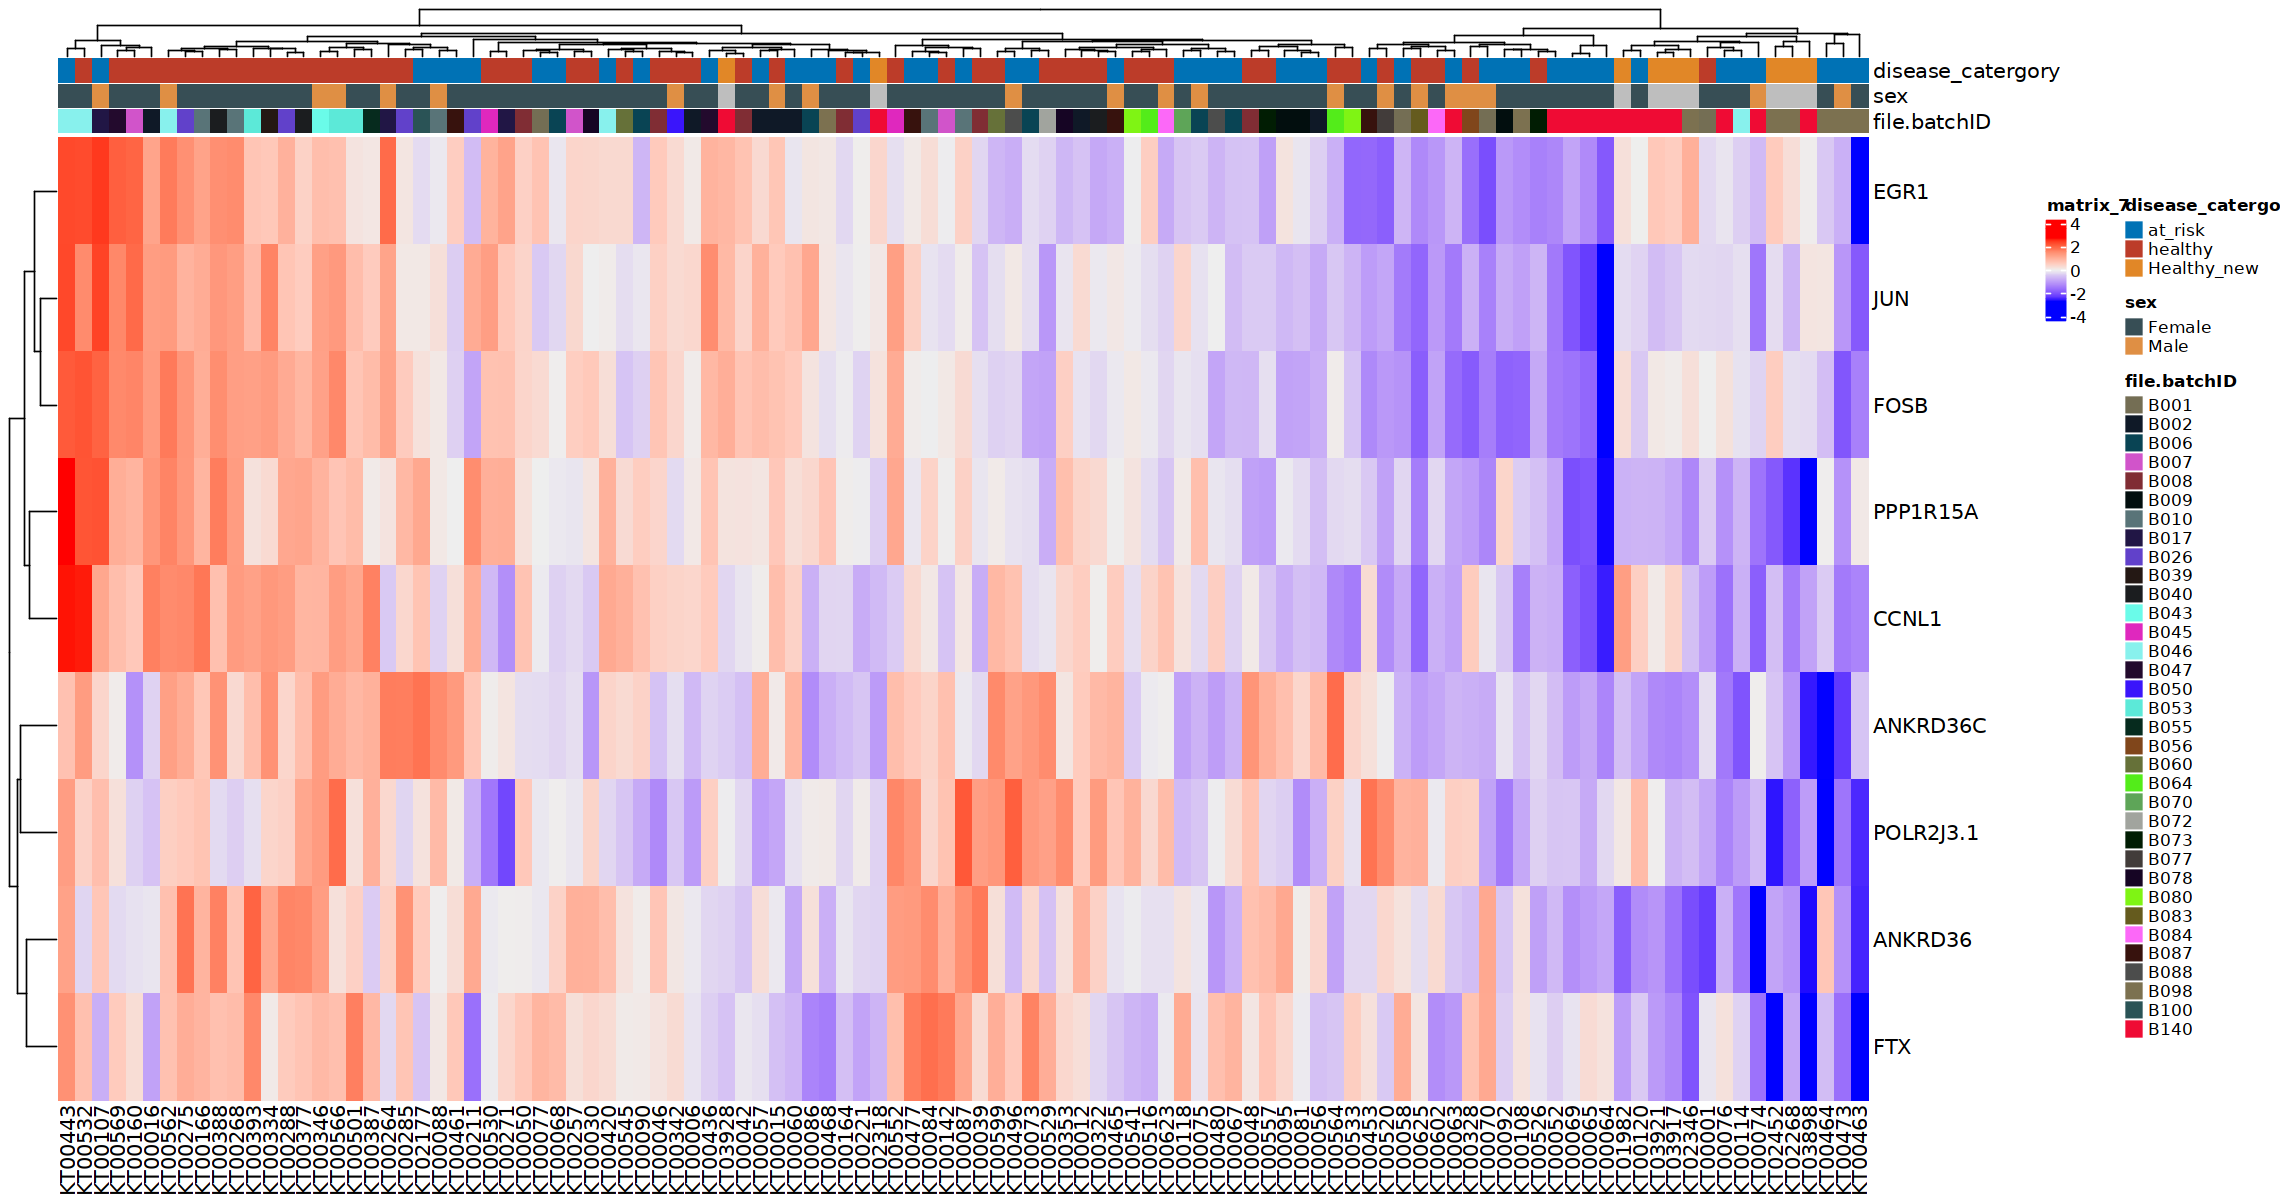

In [133]:
options(repr.plot.width = 19, repr.plot.height = 10)
Heatmap(scaled_matrices_list_107[[1]],top_annotation=col_anno3) ##bintermediate

In [434]:
#####checking for F5 98 S #############